# ANALISIS Y ESTUDIO DEL DATASET COVID 19

---


En el siguiente trabajo tengo como objetivo realizar un analisis del dataset para poner en practica los puntos aprendidos en "Data Science"

#ABSTRACT

La base de datos elegida contiene datos reales estadisticos de la poblacion que fue afectada por el virus covid 19 en la pandemia de 2020. Este suceso historico permitio contar con una gran cantidad de informacion que permite estudiar la existencia de tendencias o probabilidades de fallecimiento de personas por el virus segun sus atributos. Tambien de la probabilidad de muerte en el contexto del pais donde suceden los casos. Si fueran casos graves, tener disponibilidad de atencion de alta complejidad.
Una pregunta que nos podemos hacer es si "¿se puede predecir el numero de casos confirmado de COVID -19 en funcion de las variables que se analizaron en la base de datos?" Ingresando ubicacion, fecha, tasa de vacunacion, densidad de poblacion, ect.
Otra pregunta es si los factores de riesgo tienen insidencia en el aumento de muertes, otra pregunta podria ser si en todos los paises o regiones existentes en el dataset tiene el mismo patron de comportamiento de casos y de muertes o existen casos aislados con funcionamiento diferente. El propósito fundamental de este trabajo radica en su capacidad para ser aplicado en escenarios futuros análogos, con el potencial de preservar vidas y contribuir al bienestar de la humanidad en su conjunto. Considerando que su audiencia destinataria abarcará a toda la población humana.

# Objetivo
El objetivo del siguiente estudio es predecir la cantidad de infectados y la cantidad de muertes en funcion del contexto (aislamiento, vacunacion, inmunidad de rebaño, ect.). En primer lugar se realiza solo para Argentina y luego ampliar el estudio a mas paises.

# Contexto
La pandemia de COVID-19, también conocida como la enfermedad causada por el coronavirus SARS-CoV-2, ha sido uno de los acontecimientos más significativos y desafiantes del siglo XXI. Desde que fue detectado por primera vez en diciembre de 2019 en la ciudad de Wuhan, China, este nuevo coronavirus ha provocado una crisis de salud pública sin precedentes en la era moderna. En este informe, exploraremos los datos y analizaremos aspectos clave de esta pandemia que ha impactado a Argentina y a todas las naciones del mundo. En este momento historico la exploracion y analisis de los datos fue fundamental para tomar las desiciones mas acertadas.


# Problema Comercial
La pandemia de COVID-19 ha tenido un impacto devastador en la economía global. Las medidas de confinamiento y distanciamiento social implementadas para controlar la propagación del virus han llevado al cierre temporal de negocios y al colapso de sectores enteros, lo que ha generado pérdida de empleos y una recesión global. Además, el aislamiento social ha afectado la salud mental de muchas personas. ¿Que podemos aprender de todo lo sucedido? ¿es posible haber tomado mejores desiciones?. Para esto analizaremos de los datos que nos dejo la pandemia.

# Meta data


Informacion principal de nuestra base de datos. Que cantidad de paises tiene nuestro dataset, que cantidad de contagios y muertes tenemos y como se distribuyen.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

urlcovid = '/content/drive/MyDrive/Datasets - Data scientyst/owid-covid-data.csv'
urlextra = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-dataset/main/data/OxCGRT_compact_national_v1.csv'

covid = pd.read_csv(urlcovid,sep = ',')
extra = pd.read_csv(urlextra, sep = ',')


Vamos a traducir el nombre de las columnas de ambos dataset

In [ ]:
covid.columns
columnas_covid = ['Código ISO','Continente','ubicación','fecha','casos totales','casos nuevos','nuevos casos suavizados','muertes totales','nuevas muertes','nuevas muertes suavizadas','casos totales por millón','nuevos casos por millón','nuevos casos suavizados por millón','muertes totales por millón','nuevas muertes por millón','nuevas  muertes suavizadas por millón','tasa de reproducción','Pacientes en la UCI','Pacientes de UCI por millón','Pacientes de HOSP','Pacientes de HOSP por millón','Ingresos semanales en la  UCI','Ingresos semanales en la  UCI por millón','Admisiones semanales de HOSP','Admisiones semanales de HOSP por millón','Nuevas pruebas','Pruebas totales','Pruebas totales por mil','Nuevas pruebas por mil','Nuevas pruebas suavizadas','Nuevas pruebas suavizadas por mil','tasa positiva','pruebas por caso','unidades de pruebas','vacunas totales','personas vacunadas','personas completamente vacunadas','refuerzos  totales','nuevas  vacunas','nuevas vacunas suavizadas','vacunas totales por cien','personas vacunadas por cien','personas completamente vacunadas por cien','refuerzos totales por cien','nuevas  vacunas suavizadas por millón','Nuevas personas vacunadas suavizadas','Nuevas personas vacunadas suavizadas por cien','índice de rigurosidad','población','densidad de población','edad mediana','65 años más','70 años más','PIB per cápita','pobreza extrema','tasa de  mortalidad cardiovasca','prevalencia de diabetes','mujeres fumadoras','fumadores masculinos','instalaciones para  lavarse las manos','camas de hospital por mil','esperanza de vida','índice de desarrollo humano','exceso de mortalidad acumulada absoluta','exceso de mortalidad acumulativo','exceso de  mortalidad	','exceso de mortalidad acumulada por millón']
columnas_extra = ['NombrePaís', 'CódigoPaís', 'NombreRegión', 'CódigoRegión','Jurisdicción', 'Fecha', 'C1M_Cierre de la escuela', 'C1M_Flag','C2M_Cierre del lugar de trabajo', 'C2M_Flag', 'C3M_Cancelar eventos públicos','C3M_Flag', 'C4M_Restricciones en reuniones', 'C4M_Flag','C5M_Cerrar transporte público', 'C5M_Flag','C6M_Requisitos de quedarse en casa', 'C6M_Flag','C7M_Restricciones al movimiento interno', 'C7M_Flag','C8EV_Controles de viajes internacionales', 'E1_Apoyo a los ingresos', 'E1_Flag','E2_Alivio de deuda/contrato', 'E3_Medidas fiscales','E4_Apoyo internacional', 'H1_Campañas de información pública','H1_Flag', 'H2_Política de pruebas', 'H3_Seguimiento de contactos','H4_Inversión de emergencia en asistencia sanitaria', 'H5_Inversión en vacunas','H6M_Cubiertas faciales', 'H6M_Flag', 'H7_Política de vacunación', 'H7_Flag','H8M_Protección de personas mayores', 'H8M_Flag','V1_Priorización de vacunas (resumen)','V2A_Disponibilidad de vacunas (resumen)','V2B_Edad mínima de elegibilidad/disponibilidad de la vacuna (resumen de la población general)','V2C_Edad mínima de elegibilidad/disponibilidad para la vacuna (resumen de riesgo)','V2D_Médicamente/clínicamente vulnerable (no ancianos)', 'V2E_Education','V2F_Trabajadores de primera línea (no sanitarios)','V2G_Trabajadores de primera línea (atención sanitaria)','V3_Apoyo financiero para vacunas (resumen)','V4_Vacunación Obligatoria (resumen)', 'CasosConfirmados','Muertes confirmadas', 'Mayoridad vacunada', 'Población vacunada','Índice de rigor_Promedio', 'Índice de respuesta del gobierno_Promedio','Índice de salud de contención_promedio', 'Índice de soporte económico']

In [ ]:
covid.columns = columnas_covid
extra.columns = columnas_extra
covid.head()

Código ISO Continente    ubicación       fecha  casos totales  casos nuevos  \
0        AFG       Asia  Afghanistan  2020-02-24            5.0           5.0   
1        AFG       Asia  Afghanistan  2020-02-25            5.0           0.0   
2        AFG       Asia  Afghanistan  2020-02-26            5.0           0.0   
3        AFG       Asia  Afghanistan  2020-02-27            5.0           0.0   
4        AFG       Asia  Afghanistan  2020-02-28            5.0           0.0   

   nuevos casos suavizados  muertes totales  nuevas muertes  \
0                      NaN              NaN             NaN   
1                      NaN              NaN             NaN   
2                      NaN              NaN             NaN   
3                      NaN              NaN             NaN   
4                      NaN              NaN             NaN   

   nuevas muertes suavizadas  ...  mujeres fumadoras  fumadores masculinos  \
0                        NaN  ...                NaN                   NaN   
1                        NaN  ...                NaN                   NaN   
2                        NaN  ...                NaN                   NaN   
3                        NaN  ...                NaN                   NaN   
4                        NaN  ...                NaN                   NaN   

   instalaciones para  lavarse las manos  camas de hospital por mil  \
0                                 37.746                        0.5   
1                                 37.746                        0.5   
2                                 37.746                        0.5   
3                                 37.746                        0.5   
4                                 37.746                        0.5   

   esperanza de vida  índice de desarrollo humano  \
0              64.83                        0.511   
1              64.83                        0.511   
2              64.83                        0.511   
3              64.83                        0.511   
4              64.83                        0.511   

   exceso de mortalidad acumulada absoluta  exceso de mortalidad acumulativo  \
0                                      NaN                               NaN   
1                                      NaN                               NaN   
2                                      NaN                               NaN   
3                                      NaN                               NaN   
4                                      NaN                               NaN   

   exceso de  mortalidad\t  exceso de mortalidad acumulada por millón  
0                      NaN                                        NaN  
1                      NaN                                        NaN  
2                      NaN                                        NaN  
3                      NaN                                        NaN  
4                      NaN                                        NaN  

[5 rows x 67 columns]

Cuales son los paises que se encuentran en la columna "Ubicacion"

In [ ]:
covid['ubicación'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

Dejemos solo los paises, el resto lo descartamos por el momento

In [ ]:
paises=['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola','Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba','Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain','Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin','Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba','Bosnia and Herzegovina', 'Botswana', 'Brazil','British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso','Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde','Cayman Islands', 'Central African Republic', 'Chad', 'Chile','China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands','Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao','Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark','Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt','El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia','Eswatini', 'Ethiopia', 'Faeroe Islands', 'Falkland Islands', 'Fiji', 'Finland', 'France','French Polynesia', 'Gabon', 'Gambia', 'Georgia', 'Germany','Ghana', 'Gibraltar', 'Greece', 'Greenland', 'Grenada','Guatemala', 'Guernsey', 'Guinea', 'Guinea-Bissau', 'Guyana','Haiti', 'Honduras', 'Hong Kong', 'Hungary','Iceland', 'India', 'Indonesia', 'Iran', 'Iraq','Ireland', 'Isle of Man', 'Israel', 'Italy', 'Jamaica', 'Japan','Jersey', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kosovo','Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho','Liberia', 'Libya', 'Liechtenstein', 'Lithuania','Luxembourg', 'Macao', 'Madagascar','Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta','Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico','Micronesia (country)', 'Moldova', 'Monaco', 'Mongolia','Montenegro', 'Montserrat', 'Morocco', 'Mozambique', 'Myanmar','Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Caledonia','New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'Niue','North Macedonia', 'Northern Cyprus', 'Norway','Oceania', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama','Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Pitcairn','Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda','Saint Helena', 'Saint Kitts and Nevis', 'Saint Lucia','Saint Pierre and Miquelon', 'Saint Vincent and the Grenadines','Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia','Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore','Sint Maarten (Dutch part)', 'Slovakia', 'Slovenia','Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan','Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan','Tajikistan', 'Tanzania', 'Thailand', 'Timor', 'Togo', 'Tokelau','Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey','Turkmenistan', 'Turks and Caicos Islands', 'Tuvalu', 'Uganda','Ukraine', 'United Arab Emirates', 'United Kingdom','United States', 'Uruguay', 'Uzbekistan','Vanuatu', 'Vatican', 'Venezuela', 'Vietnam', 'Wallis and Futuna','Yemen', 'Zambia', 'Zimbabwe']

In [ ]:
cantidad_de_paises= len(paises)
print('el numero de paises en nuestro dataset es:',cantidad_de_paises)

el numero de paises en nuestro dataset es: 226


Sumemos muertes y casos

In [ ]:
filtro = covid['ubicación'].isin(paises)
datos_filtrados = covid[filtro]

total_contagios = datos_filtrados['casos nuevos'].sum()
total_muertos = datos_filtrados['nuevas muertes'].sum()

print('Cantidad de contagios en los países de interés:', total_contagios)
print('Cantidad de muertos en los países de interés:', total_muertos)

Cantidad de contagios en los países de interés: 447835490.0
Cantidad de muertos en los países de interés: 5977490.0


Filtremos los continentes y agrupemos la sumatoria de casos y muertes en cada uno

In [ ]:
Continentes =[ 'Africa','Asia','Europe','North America','Oceania','South America']
filtro2 = covid['ubicación'].isin(Continentes)
datosfiltrados2= covid[filtro2]

In [ ]:
resumen_casos_por_continente = datosfiltrados2.groupby('ubicación')['casos nuevos'].sum().reset_index().sort_values(by='casos nuevos', ascending=False)
resumen_muertes_por_continente = datosfiltrados2.groupby('ubicación')['nuevas muertes'].sum().reset_index().sort_values(by='nuevas muertes', ascending=False)
print(resumen_casos_por_continente)
print(resumen_muertes_por_continente)

       ubicación  casos nuevos
2         Europe   160935382.0
1           Asia   119995444.0
3  North America    93399049.0
5  South America    54528768.0
0         Africa    11254551.0
4        Oceania     3861148.0
       ubicación  nuevas muertes
2         Europe       1724659.0
3  North America       1380039.0
1           Asia       1357219.0
5  South America       1250520.0
0         Africa        248969.0
4        Oceania          8042.0


Text(0.5, 1.0, 'Casos totales por continente')

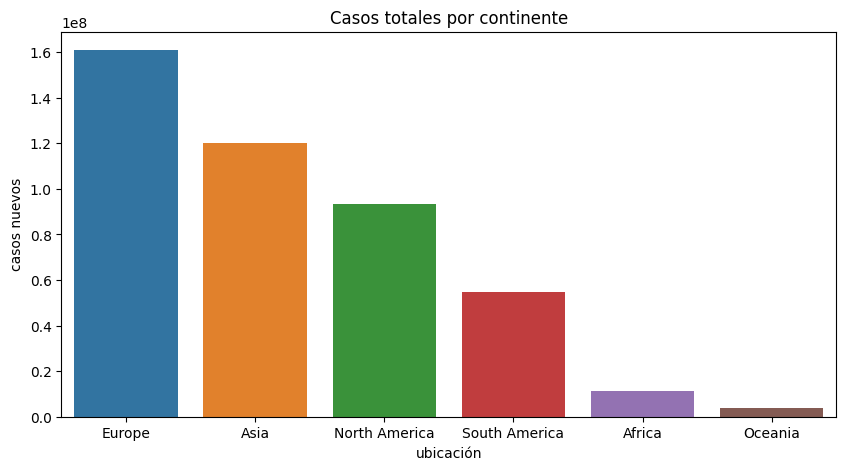

In [ ]:
plt.subplots(figsize=(10,5))
sns.barplot(data=resumen_casos_por_continente, x = 'ubicación', y = 'casos nuevos')
plt.title('Casos totales por continente')

Text(0.5, 1.0, 'Muertes totales por contintente')

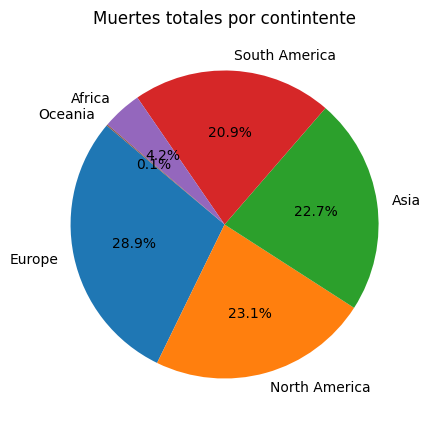

In [ ]:
plt.subplots(figsize=(10,5))
plt.pie(resumen_muertes_por_continente['nuevas muertes'],labels=resumen_muertes_por_continente['ubicación'],  autopct='%1.1f%%', startangle=140)
plt.title('Muertes totales por contintente')

# EDA
Exploratory Data Analyst

En un primer momento, tenemos 2 bases de datos con las cuales vamos a trabajar. la primera que vamos a llamar `"covid"` es la que contiene todos los datos de contagios, cantidad de vacunados, muertes, etc. durante la pandemia, la segunda base de datos la vamos a llamar `"extra"` y son todos los datos extra que encontramos de medidas tomadas con el objetivo de evitar la propagacion del virus y mitigar el impacto social y economico: cuarentena, economicas, gubernamentales que le aportarán valor al estudio que realizaremos. Partiendo de aqui surgen varias preguntas:



*   ¿Podremos crear un modelo que prediga contagios?
*   ¿Existen medidas eficaces para disminuir la velocidad de contagios?¿Cuales fueron?
*   ¿Mediante el analisis de datos, es posible encontrar cuales son las medidas mas efectivas para evitar muertes?
*   ¿Es posible utilizar la experiencia de paises que sufrieron inicialmente la enfermedad para predecir el comportamiento en Argentina?



Traduciremos el nombre de las columnas para que facilitar el trabajo.

Asigno tanto a covid como a extra los nombres de las columnas traducidas

In [ ]:
extra.head()

NombrePaís CódigoPaís  NombreRegión  CódigoRegión Jurisdicción     Fecha  \
0      Aruba        ABW           NaN           NaN    NAT_TOTAL  20200101   
1      Aruba        ABW           NaN           NaN    NAT_TOTAL  20200102   
2      Aruba        ABW           NaN           NaN    NAT_TOTAL  20200103   
3      Aruba        ABW           NaN           NaN    NAT_TOTAL  20200104   
4      Aruba        ABW           NaN           NaN    NAT_TOTAL  20200105   

   C1M_Cierre de la escuela  C1M_Flag  C2M_Cierre del lugar de trabajo  \
0                       0.0       NaN                              0.0   
1                       0.0       NaN                              0.0   
2                       0.0       NaN                              0.0   
3                       0.0       NaN                              0.0   
4                       0.0       NaN                              0.0   

   C2M_Flag  ...  V3_Apoyo financiero para vacunas (resumen)  \
0       NaN  ...                                           0   
1       NaN  ...                                           0   
2       NaN  ...                                           0   
3       NaN  ...                                           0   
4       NaN  ...                                           0   

   V4_Vacunación Obligatoria (resumen)  CasosConfirmados  Muertes confirmadas  \
0                                  NaN               0.0                  0.0   
1                                  NaN               0.0                  0.0   
2                                  NaN               0.0                  0.0   
3                                  NaN               0.0                  0.0   
4                                  NaN               0.0                  0.0   

   Mayoridad vacunada  Población vacunada  Índice de rigor_Promedio  \
0                  NV                 0.0                       0.0   
1                  NV                 0.0                       0.0   
2                  NV                 0.0                       0.0   
3                  NV                 0.0                       0.0   
4                  NV                 0.0                       0.0   

   Índice de respuesta del gobierno_Promedio  \
0                                        0.0   
1                                        0.0   
2                                        0.0   
3                                        0.0   
4                                        0.0   

   Índice de salud de contención_promedio  Índice de soporte económico  
0                                     0.0                          0.0  
1                                     0.0                          0.0  
2                                     0.0                          0.0  
3                                     0.0                          0.0  
4                                     0.0                          0.0  

[5 rows x 56 columns]

Vamos a reemplazar todos los datos Nan por el anterior para continuar la curva, luego cuando los valores anterires sean Nan, esos los vamos a reemplazar por 0

In [ ]:
covid['Pacientes en la UCI'].fillna(method='ffill', inplace = True)
extra.fillna(method='ffill', inplace = True)

In [ ]:
covid.fillna(0, inplace = True)
extra.fillna(0, inplace = True)

In [ ]:
covid.describe()

casos totales  casos nuevos  nuevos casos suavizados  muertes totales  \
count   1.663260e+05  1.663260e+05             1.663260e+05     1.663260e+05   
mean    2.489799e+06  1.134871e+04             1.120568e+04     5.042686e+04   
std     1.529680e+07  8.362675e+04             8.130804e+04     2.831655e+05   
min     0.000000e+00  0.000000e+00             0.000000e+00     0.000000e+00   
25%     1.590000e+03  0.000000e+00             4.857000e+00     2.200000e+01   
50%     2.365700e+04  7.100000e+01             9.150000e+01     3.690000e+02   
75%     2.844440e+05  1.013000e+03             1.056714e+03     5.269000e+03   
max     4.451295e+08  4.206334e+06             3.444237e+06     5.995245e+06   

       nuevas muertes  nuevas muertes suavizadas  casos totales por millón  \
count   166326.000000              166326.000000             166326.000000   
mean       149.695496                 148.861789              28776.566195   
std        780.429560                 760.934729              51446.106295   
min          0.000000                   0.000000                  0.000000   
25%          0.000000                   0.000000                502.532000   
50%          1.000000                   1.143000               4341.227500   
75%         14.000000                  14.571000              36006.992000   
max      18020.000000               14689.143000             706541.904000   

       nuevos casos por millón  nuevos casos suavizados por millón  \
count            166326.000000                       166326.000000   
mean                162.478031                          159.608296   
std                 675.336248                          523.504370   
min                   0.000000                            0.000000   
25%                   0.000000                            1.173000   
50%                  10.090500                           15.968000   
75%                  96.513500                          112.899000   
max               51427.491000                        16052.608000   

       muertes totales por millón  ...  mujeres fumadoras  \
count               166326.000000  ...      166326.000000   
mean                   443.172200  ...           6.775956   
std                    751.568505  ...           9.857717   
min                      0.000000  ...           0.000000   
25%                      6.030000  ...           0.000000   
50%                     70.584000  ...           1.700000   
75%                    576.470000  ...           9.700000   
max                   6322.263000  ...          44.000000   

       fumadores masculinos  instalaciones para  lavarse las manos  \
count         166326.000000                          166326.000000   
mean              20.612760                              20.937984   
std               19.125278                              32.283336   
min                0.000000                               0.000000   
25%                0.000000                               0.000000   
50%               20.400000                               0.000000   
75%               35.700000                              37.746000   
max               78.100000                             100.000000   

       camas de hospital por mil  esperanza de vida  \
count              166326.000000      166326.000000   
mean                    2.251192          68.684669   
std                     2.492310          19.707247   
min                     0.000000           0.000000   
25%                     0.000000          66.600000   
50%                     1.600000          74.470000   
75%                     3.320000          78.860000   
max                    13.800000          86.750000   

       índice de desarrollo humano  exceso de mortalidad acumulada absoluta  \
count                166326.000000                             1.663260e+05   
mean                      0.594395                             1.288095e+03   
std                       0.310489    

In [ ]:
extra.describe()

NombreRegión  CódigoRegión         Fecha  C1M_Cierre de la escuela  \
count      202760.0      202760.0  2.027600e+05             202760.000000   
mean            0.0           0.0  2.021066e+07                  1.193199   
std             0.0           0.0  8.174621e+03                  1.139102   
min             0.0           0.0  2.020010e+07                  0.000000   
25%             0.0           0.0  2.020098e+07                  0.000000   
50%             0.0           0.0  2.021070e+07                  1.000000   
75%             0.0           0.0  2.022040e+07                  2.000000   
max             0.0           0.0  2.022123e+07                  3.000000   

            C1M_Flag  C2M_Cierre del lugar de trabajo       C2M_Flag  \
count  202760.000000                    202760.000000  202760.000000   
mean        0.840792                         1.149645       0.835086   
std         0.365871                         0.988767       0.371104   
min         0.000000                         0.000000       0.000000   
25%         1.000000                         0.000000       1.000000   
50%         1.000000                         1.000000       1.000000   
75%         1.000000                         2.000000       1.000000   
max         1.000000                         3.000000       1.000000   

       C3M_Cancelar eventos públicos       C3M_Flag  \
count                  202760.000000  202760.000000   
mean                        1.103250       0.873575   
std                         0.851878       0.332329   
min                         0.000000       0.000000   
25%                         0.000000       1.000000   
50%                         1.000000       1.000000   
75%                         2.000000       1.000000   
max                         2.000000       1.000000   

       C4M_Restricciones en reuniones  ...  \
count                   202760.000000  ...   
mean                         2.010209  ...   
std                          1.710198  ...   
min                          0.000000  ...   
25%                          0.000000  ...   
50%                          3.000000  ...   
75%                          4.000000  ...   
max                          4.000000  ...   

       V2G_Trabajadores de primera línea (atención sanitaria)  \
count                                      202760.000000        
mean                                            1.839870        
std                                             0.452744        
min                                             0.000000        
25%                                             2.000000        
50%                                             2.000000        
75%                                             2.000000        
max                                             2.000000        

       V3_Apoyo financiero para vacunas (resumen)  \
count                               202760.000000   
mean                                     3.100533   
std                                      2.411897   
min                                      0.000000   
25%                                      0.000000   
50%                                      5.000000   
75%                                      5.000000   
max                                      5.000000   

       V4_Vacunación Obligatoria (resumen)  CasosConfirmados  \
count                        202760.000000      2.027600e+05   
mean                              0.242045      1.333734e+06   
std                               0.428322      5.569105e+06   
min                               0.000000      0.000000e+00   
25%                               0.000000      5.261000e+03   
50%                               0.000000      5.866500e+04   
75%                               0.000000      5.167738e+05   
max                               1.000000      1.007653e+08   

       Muertes confirmadas  Población vacunada  Índice de rigor_Promedio  \
count         2.027600e+05       202

# Descripcion de conjunto de datos extra
  El OxCGRT (database extra) reporta información disponible públicamente sobre 24 indicadores de políticas y un campo de notas diversas de la respuesta del gobierno organizado en cuatro grupos:

  C - políticas de contención y cierre

  E - políticas económicas

  H - políticas del sistema de salud

  V - políticas de vacunación

  Para ayudar a entender los datos, hemos producido cuatro índices que agregan los datos en un solo número. Para obtener más detalles sobre cómo se componen los índices, consulte la sección ' Cálculo de índices de políticas ' en nuestra documentación. Cada uno de estos índices reporta un número entre 0 y 100 que refleja el nivel de respuesta del gobierno en ciertas dimensiones:

    índice general de respuesta del gobierno (todos los indicadores)
    índice de contención y salud (todos los indicadores C y H)
    índice de rigor (todos los indicadores C, más el H1 que registra las campañas de información pública)
    índice de apoyo económico (todos los indicadores E)
  Estos índices son una medida de cuántos de los tipos de políticas relevantes ha actuado un gobierno y en qué medida. El índice no puede decir si la política de un gobierno se ha implementado efectivamente.

# Exploracion visual de datos

Crearemos dos nuevos dataframes a partir de los originales 'covid' y 'extra' que solo tengan valores para Argentina

In [ ]:
covid_arg = covid[covid['ubicación']=='Argentina']
extra_arg = extra[extra['NombrePaís']=='Argentina']

En el siguiente Grafico un comportamiento de la curva de pacientes internados en alta complegidad y una curva que indica la cantidad diaria de casos nuevos

In [ ]:
tiempo_analizado = len(covid_arg)
tiempo_analizado

795

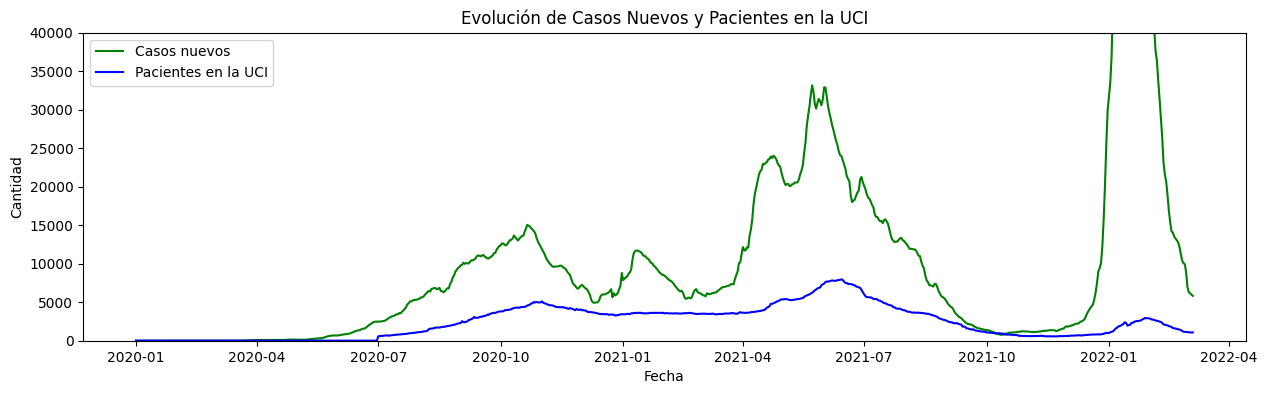

In [ ]:
x = pd.to_datetime(covid_arg['fecha'])
y = covid_arg['nuevos casos suavizados']
y2 = covid_arg['Pacientes en la UCI']
y3 = covid_arg['nuevas muertes']
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(x,y,c='g', label='Casos nuevos')
ax.plot(x,y2,c='b', label = 'Pacientes en la UCI')
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad')
ax.set_title('Evolución de Casos Nuevos y Pacientes en la UCI')
ax.set_ylim(0,40000)
ax.legend()

Sobre enero del año 2022 la curva de casos se eleva en forma muy alta (linea verde) pero el incremento de pacientes en terapias de alta complejidad (linea azul) no aumenta en la misma proporcion que se observa en junio del 2021. Graficando las muertes diaras en el mismo grafico y cambiando la escala para tener mejor visibilidad de valores

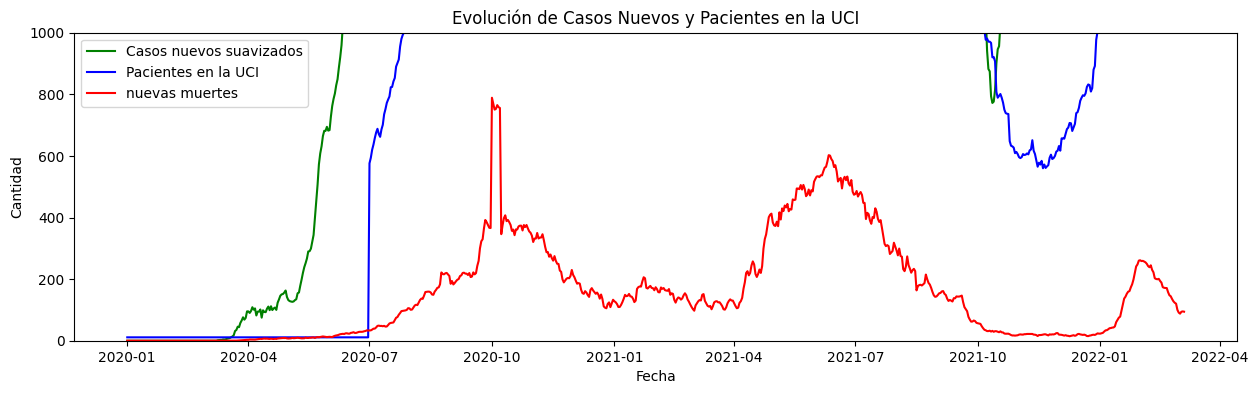

In [ ]:
x = pd.to_datetime(covid_arg['fecha'])
y = covid_arg['nuevos casos suavizados']
y2 = covid_arg['Pacientes en la UCI']
y3 = covid_arg['nuevas muertes suavizadas']
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(x,y,c='g', label='Casos nuevos suavizados')
ax.plot(x,y2,c='b', label = 'Pacientes en la UCI')
ax.plot(x,y3,c='r', label = 'nuevas muertes')
ax.set_xlabel('Fecha')
ax.set_ylabel('Cantidad')
ax.set_title('Evolución de Casos Nuevos y Pacientes en la UCI')
ax.set_ylim(0,1000)
ax.legend()

Graficando solo las muertes diarias suavizadas para evitar el outlier

(0.0, 3500.0)

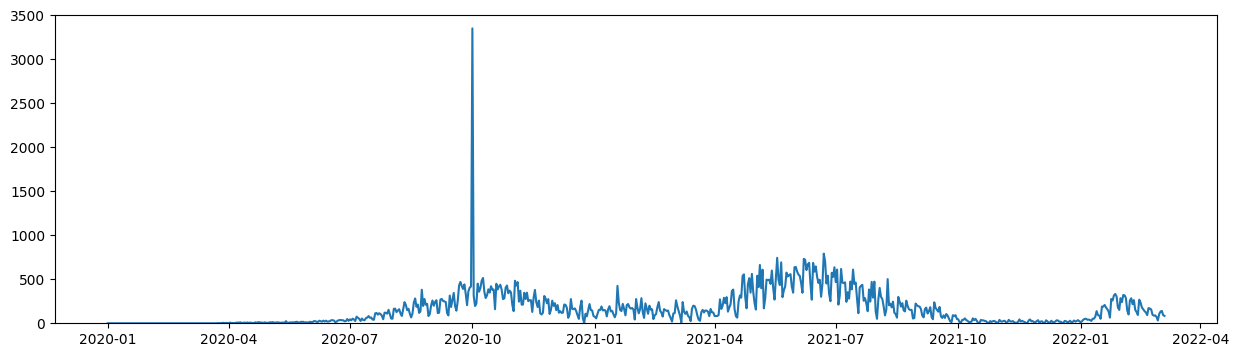

In [ ]:
x3=pd.to_datetime(covid_arg['fecha'])
y3=covid_arg['nuevas muertes']
fig3, ax3=plt.subplots(figsize=(15,4))
ax3.plot(x3,y3)
plt.ylim(0,3500)

Visualmente encontramos un outlier ubicado en octubre del 2020. Este outlier lo vamos a eliminar mas adelante y es **importante crear una nueva columna que indique la relacion entre las muertes diarias respecto a los pacientes de UCI** (unidades de controles intensivos)

Mientras tanto seguimos visualizando datos, por ejemplo vamos a realizar un histograma que indique la cantidad de dias que se repitieron la misma cantidad de muertes,

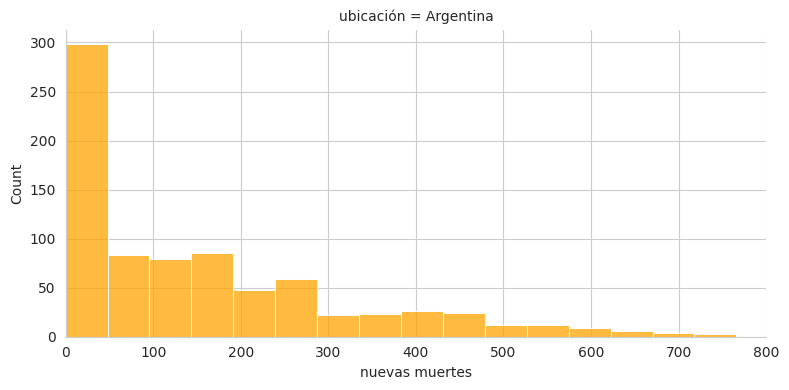

In [ ]:
sns.set_style("whitegrid")
grafico = sns.displot(data=covid_arg,x='nuevas muertes',col='ubicación', height = 4, aspect=2, color='orange')
grafico.set(xlim=(0,800))

En este caso ya hemos limitado el eje x del histograma para que no tenga en cuenta el outlier encontrado.

Si graficamos el total de casos (acumulado) y el total de muertes (acumulado) en funcion del tiempo
*  ¿el crecimiento es constante?
*  ¿existen mesetas?
*  ¿en que periodos de tiempos se dan estas mesetas?
*  ¿en el resto de los paises tambien suceden curvas similares?
*  ¿ambas curvas mantienen siempre la misma relacion?
*  ¿las medidas que se tomaron afectaron en forma significativa este crecimiento?

<Axes: xlabel='fecha', ylabel='casos totales'>

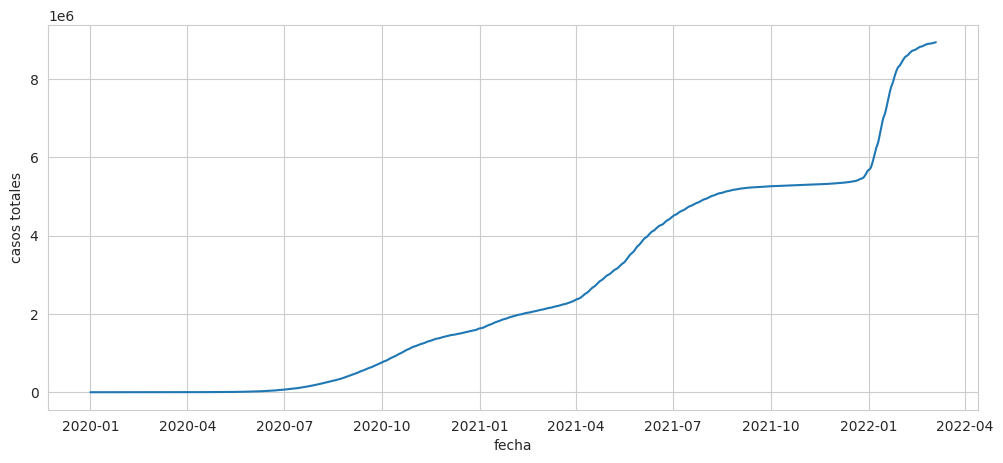

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x3, y='casos totales')

<Axes: xlabel='fecha', ylabel='muertes totales'>

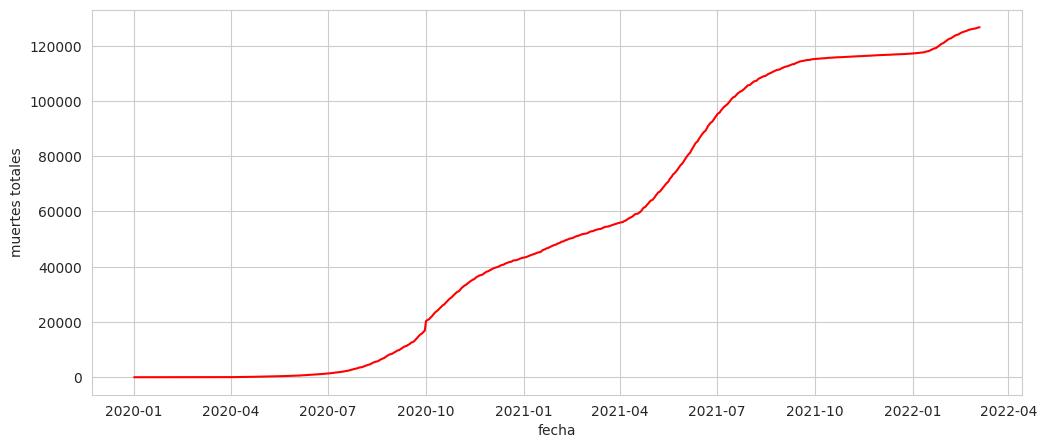

In [ ]:
plt.figure(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x3, y='muertes totales', color='red')

Centremonos inicialmente en la pregunta ¿ambas curvas mantienen siempre la misma relacion? y grafiquemos la relacion entre ambas

<Axes: xlabel='casos totales', ylabel='muertes totales'>

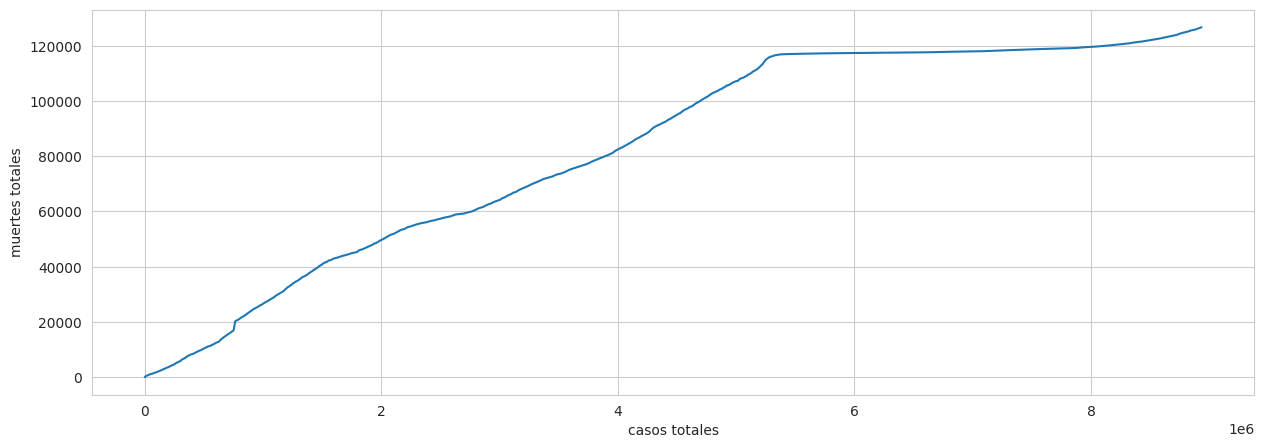

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=covid_arg, x='casos totales', y='muertes totales')

Aqui pareciera haber un cambio abrupto en la relacion entre cantidades pero es clave investigar si esta ruptura es causa de algun tipo de accion por parte del gobierno, por algun comportamiento normal del virus o de nuestro querido "Outlier", ya que este "Outlier" aumentó de forma abrupta la cantidad de muertos, cambiando claramente la relacion entre las cantidades. A pesar de que este grafico no incluye fecha, al ser valores acumulativos estan unidos a una linea temporal ya que ambas columnas no tienen valores negativos, solo crecen o se mantienen.

Text(0.5, 1.0, 'Muertes totales en funcion de los casos totales')

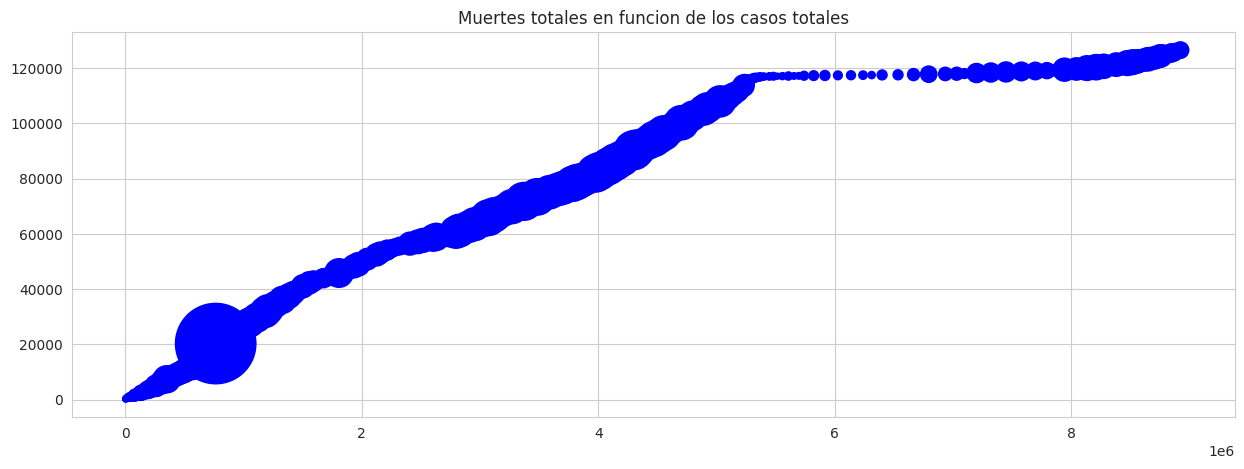

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(data=covid_arg, x='casos totales', y='muertes totales', s = 'nuevas muertes', c='blue' )
plt.title('Muertes totales en funcion de los casos totales')

Aqui tenemos que el outlier no es la causa sino que existe otra causa para el cambio abrupto de tendencia. Acerquemos mas el grafico para llegar al rango de fechas donde ocurre este evento. Tambien puede existir un blanqueo abrupto de casos totales, vamos a cambiar el valor "S" del grafico por "casos nuevos"

Text(0.5, 1.0, 'Muertes totales en funcion de los casos totales')

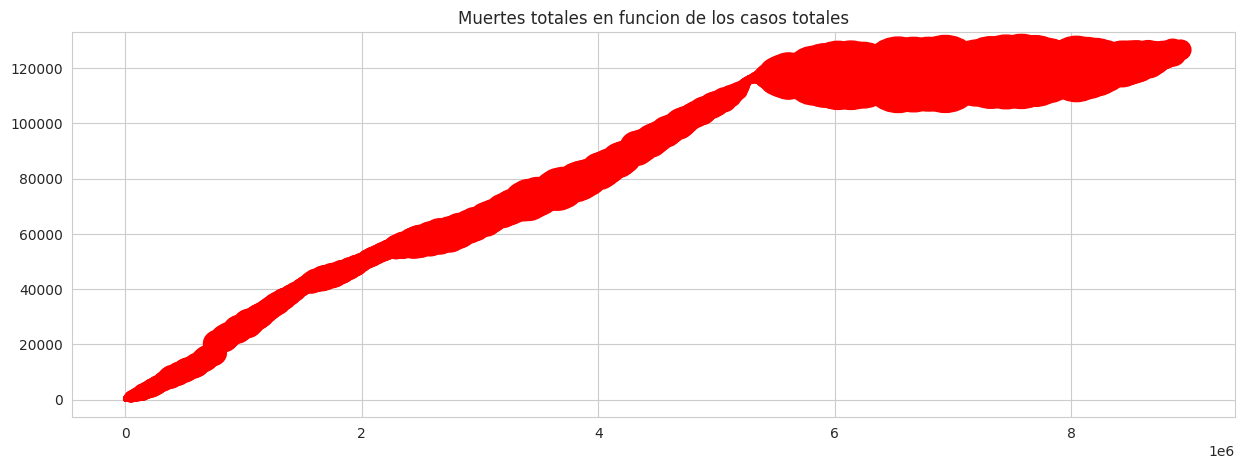

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(data=covid_arg, x='casos totales', y='muertes totales', s = 'nuevos casos por millón', c='red' )
plt.title('Muertes totales en funcion de los casos totales')

<Axes: xlabel='casos totales', ylabel='tasa positiva'>

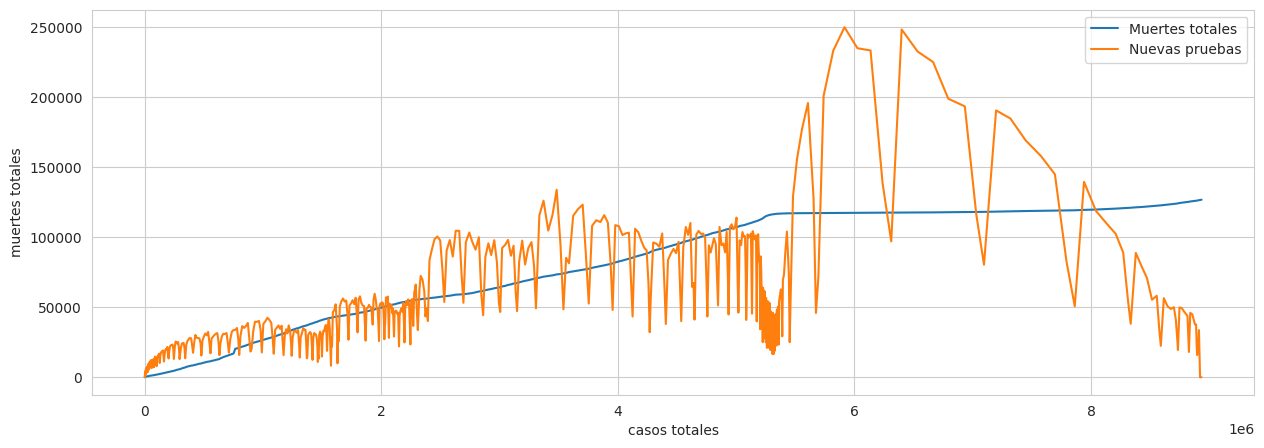

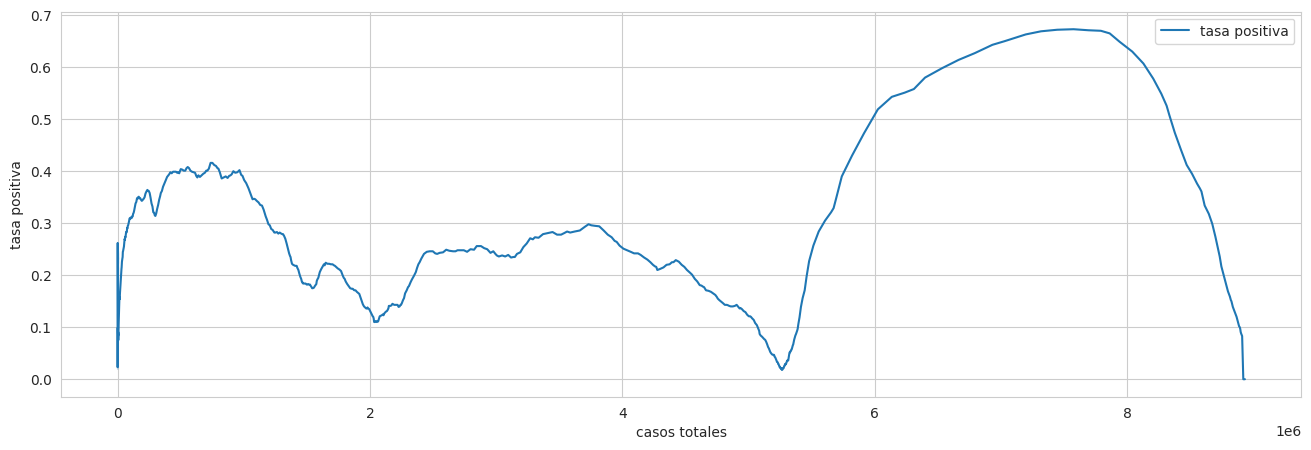

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(data=covid_arg, x='casos totales', y='muertes totales', label = 'Muertes totales')
sns.lineplot(data=covid_arg, x='casos totales', y='Nuevas pruebas', label = 'Nuevas pruebas')
plt.legend()
#plt.xlim(5000000,6000000)
#plt.ylim(40000,120000)
plt.figure(figsize=(16,5))
sns.lineplot(data=covid_arg, x='casos totales', y='tasa positiva', label = 'tasa positiva')

Si observamos un poco otros paises

In [ ]:
Francia_datos = covid[covid['ubicación']=='France']
Alemania_datos = covid[covid['ubicación']=='Germany']
Italia_datos = covid[covid['ubicación']=='Italy']
España_datos = covid[covid['ubicación']=='Spain']

xf=pd.to_datetime(Francia_datos['fecha'])
xa=pd.to_datetime(Alemania_datos['fecha'])
xi=pd.to_datetime(Italia_datos['fecha'])
xe=pd.to_datetime(España_datos['fecha'])

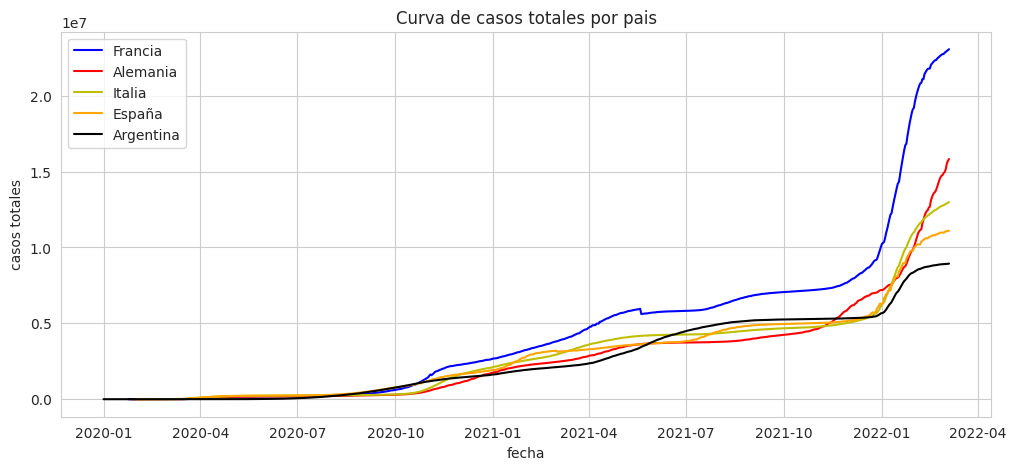

In [ ]:
plt.subplots(figsize = (12,5))
sns.lineplot(data=Francia_datos, x=xf, y='casos totales',  color='blue', label='Francia')
sns.lineplot(data=Alemania_datos, x=xa, y='casos totales',  color ='red', label= 'Alemania')
sns.lineplot(data=Italia_datos, x=xi, y='casos totales', color = 'y', label = 'Italia')
sns.lineplot(data=España_datos, x=xe, y='casos totales', color = 'orange', label = 'España')
sns.lineplot(data=covid_arg, x=x3, y='casos totales', color = 'black', label = 'Argentina')
plt.title('Curva de casos totales por pais')
plt.legend()


Se puede observar que el comportamiento de los 4 paises de europa es similar, a cantidad de casos y el crecimiento en funcion de la fecha es similar.
Realicemos un scatter entre los casos de covid y las muertes (valores acumulados). Otro punto que llama la atencion es que las curvas sigan en forma muy temporal cada crecimiento y estancamiento ya que argentina se encuentra en el polo sur, teniendo las estaciones separadas por 6 meses de europa, el eje X no deberia ser el mismo para cada uno de los paises

Text(0.5, 1.0, 'Muertes totales en funcion de los casos totales')

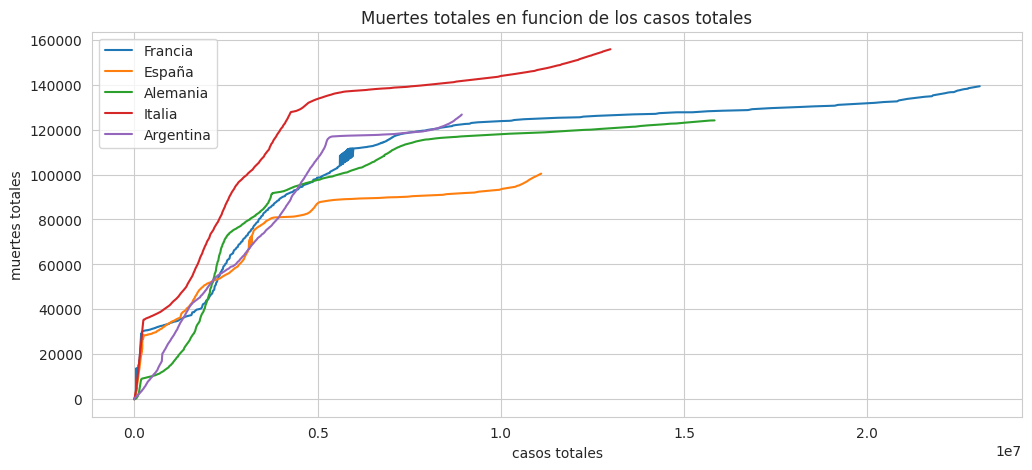

In [ ]:
plt.subplots(figsize = (12,5))
sns.lineplot (data=Francia_datos, x = 'casos totales', y = 'muertes totales',label='Francia')
sns.lineplot (data=España_datos, x = 'casos totales', y = 'muertes totales', label = 'España')
sns.lineplot (data=Alemania_datos, x = 'casos totales', y = 'muertes totales', label='Alemania')
sns.lineplot (data=Italia_datos, x = 'casos totales', y = 'muertes totales', label = 'Italia')
sns.lineplot (data=covid_arg, x = 'casos totales', y = 'muertes totales', label = 'Argentina')
plt.legend()
plt.title ('Muertes totales en funcion de los casos totales')

La cantidad de muertes totales en funcion de los casos totales tiene curvas similares en todos los paises y vemos que lo que llamo la atencion para argentina 3 grafico antes es mucho mas marcado en argentina misma que en el resto de los paises. Tambien vemos que las muertes comienzan a disminuir aunque los casos siguen aumentando. Tambien se observa un comportamiento extraño en la curva de francia entre los 500.000 casos totales y los 600.000, vamos a graficar unicamente la curva de francia para este intervalo

(100000.0, 120000.0)

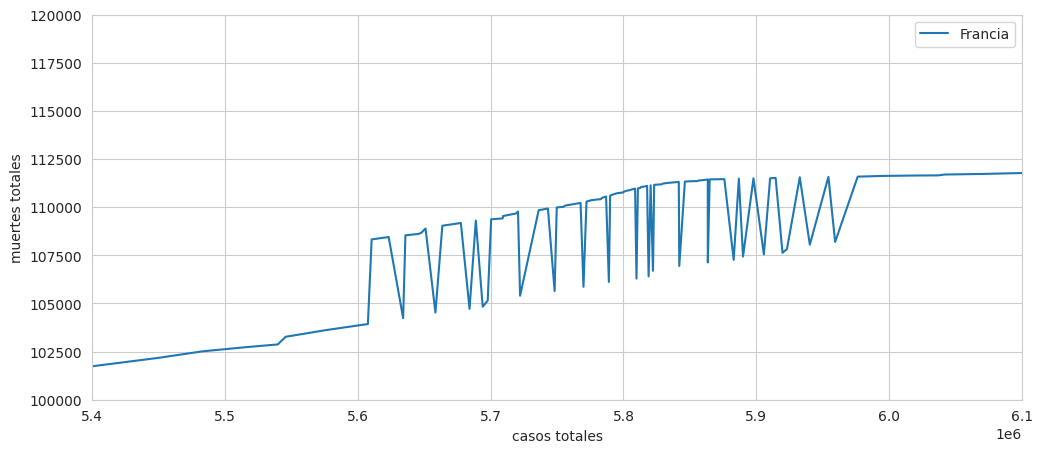

In [ ]:
plt.subplots(figsize = (12,5))
sns.lineplot (data=Francia_datos, x = 'casos totales', y = 'muertes totales',label='Francia')
plt.xlim(5400000,6100000)
plt.ylim(100000,120000)


Mas alla de la rareza de la curva de francia tenemos un puntapie para responder una de las preguntas que nos hicimos inicialmente, la cuarta pregunta de esta lista

*   ¿Podremos crear un modelo que prediga contagios?
*   ¿Existen medidas eficaces para disminuir la velocidad de contagios?¿Cuales fueron?
*   ¿Mediante el analisis de datos, es posible encontrar cuales son las medidas mas efectivas para evitar muertes?
*   `¿Es posible utilizar la experiencia de paises que sufrieron inicialmente la enfermedad para predecir el comportamiento en Argentina?`

En un primer momento parece posible, ya que viendo las tendencias de las curvas estas se comportan de manera similar, y justamente los paises a los que durante la pandemia les sucedian primero los eventos que luego pasarian en Argentina

Sigamos graficando: Scatter trivariable entre las muertes y la tasa de vacunacion por cada pais

Text(0.5, 1.0, 'Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19 - Pacientes de UCI x millon')

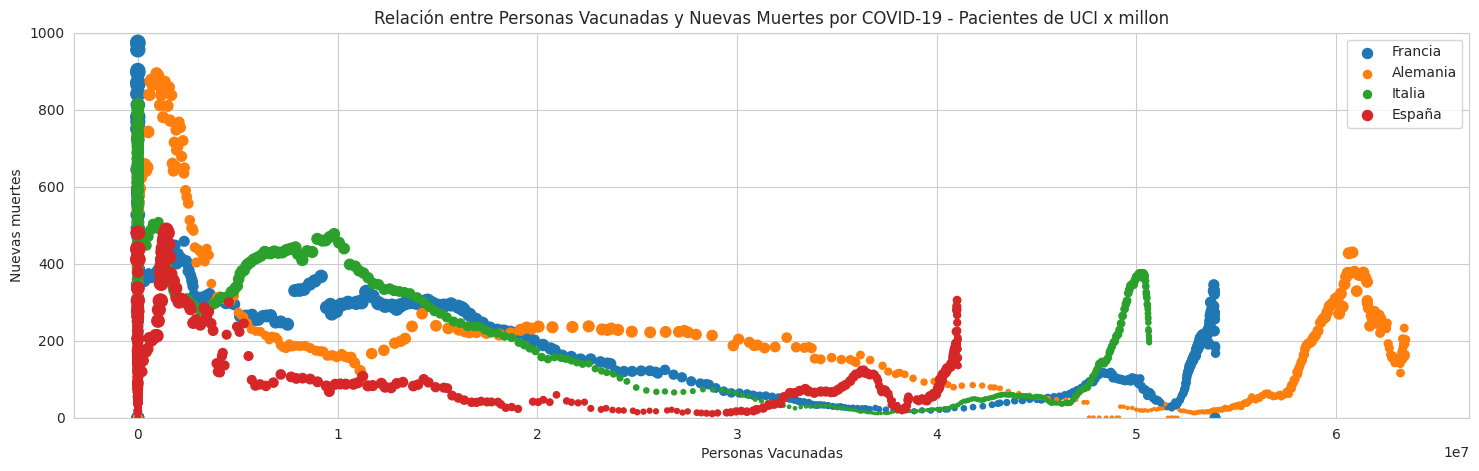

In [ ]:
plt.figure(figsize=(18, 5))
plt.scatter(data=Francia_datos, x= 'personas vacunadas', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
plt.scatter(data=Alemania_datos, x= 'personas vacunadas', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
plt.scatter(data=Italia_datos, x= 'personas vacunadas', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
plt.scatter(data=España_datos, x= 'personas vacunadas', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
tipo= covid['personas vacunadas'].dtype
tipo2=covid['nuevas muertes'].dtype
plt.legend(['Francia', 'Alemania', 'Italia', 'España'])
plt.xlabel('Personas Vacunadas')
plt.ylabel('Nuevas muertes')
plt.ylim(0,1000)
plt.title('Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19 - Pacientes de UCI x millon')

Es clave *normalizar la cantidad de personas vacunadas* para realizar una comparativa de comportamiento ya que en cada pais la cantidad de personas vacunadas es diferente pero el comportamiento de la cantidad de personas vacunadas vs nuevas muertes parece similar. Se vienen observando patrones de comportamiento entre paises y entre relaciones de variables

In [ ]:
# normalizacion de personas vacunadas
from sklearn.preprocessing import normalize
maxfrancia = max(Francia_datos['personas vacunadas'])
maxalemania = max(Alemania_datos['personas vacunadas'])
maxitalia = max(Italia_datos['personas vacunadas'])
maxespaña = max(España_datos['personas vacunadas'])

Francia_datos['personas vacunadas normalizada'] = Francia_datos['personas vacunadas']/maxfrancia
Alemania_datos['personas vacunadas normalizada'] = Alemania_datos['personas vacunadas']/maxalemania
Italia_datos['personas vacunadas normalizada'] = Italia_datos['personas vacunadas']/maxitalia
España_datos['personas vacunadas normalizada'] = España_datos['personas vacunadas']/maxespaña


<ipython-input-34-9ff5c203e1bc>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Francia_datos['personas vacunadas normalizada'] = Francia_datos['personas vacunadas']/maxfrancia
<ipython-input-34-9ff5c203e1bc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Alemania_datos['personas vacunadas normalizada'] = Alemania_datos['personas vacunadas']/maxalemania
<ipython-input-34-9ff5c203e1bc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

Text(0.5, 1.0, 'Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19 - Pacientes de UCI x millon')

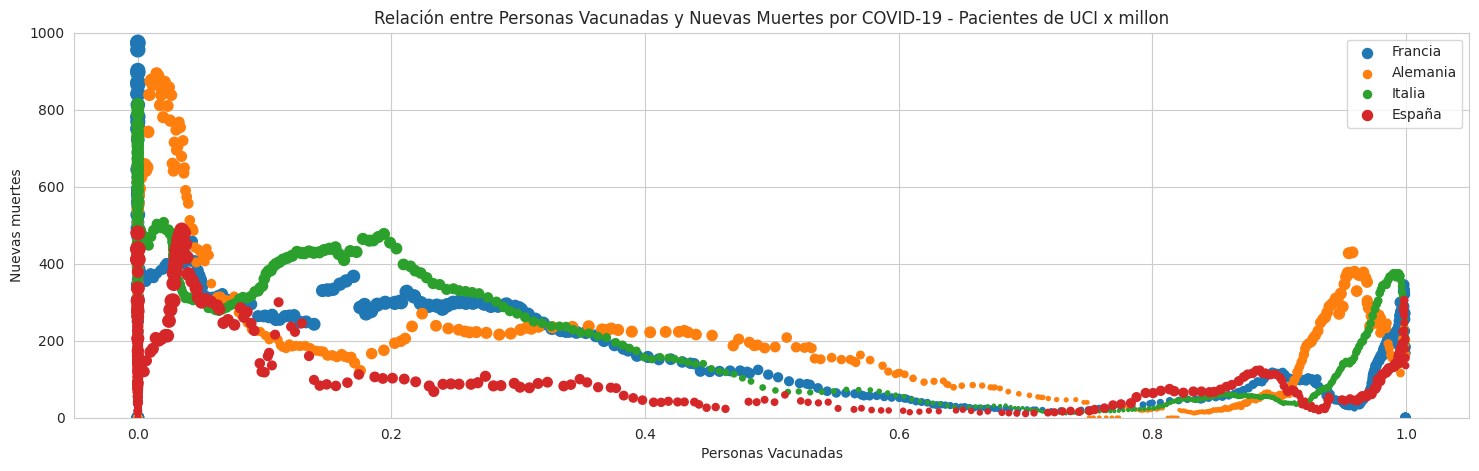

In [ ]:
plt.figure(figsize=(18, 5))
plt.scatter(data=Francia_datos, x= 'personas vacunadas normalizada', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
plt.scatter(data=Alemania_datos, x= 'personas vacunadas normalizada', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
plt.scatter(data=Italia_datos, x= 'personas vacunadas normalizada', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
plt.scatter(data=España_datos, x= 'personas vacunadas normalizada', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
tipo= covid['personas vacunadas'].dtype
tipo2=covid['nuevas muertes'].dtype
plt.legend(['Francia', 'Alemania', 'Italia', 'España'])
plt.xlabel('Personas Vacunadas')
plt.ylabel('Nuevas muertes')
plt.ylim(0,1000)
plt.title('Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19 - Pacientes de UCI x millon')

Vemos la similitud de las curvas al normalizar las personas vacunadas

Text(0.5, 1.0, 'Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19 - Pacientes de UCI x millon')

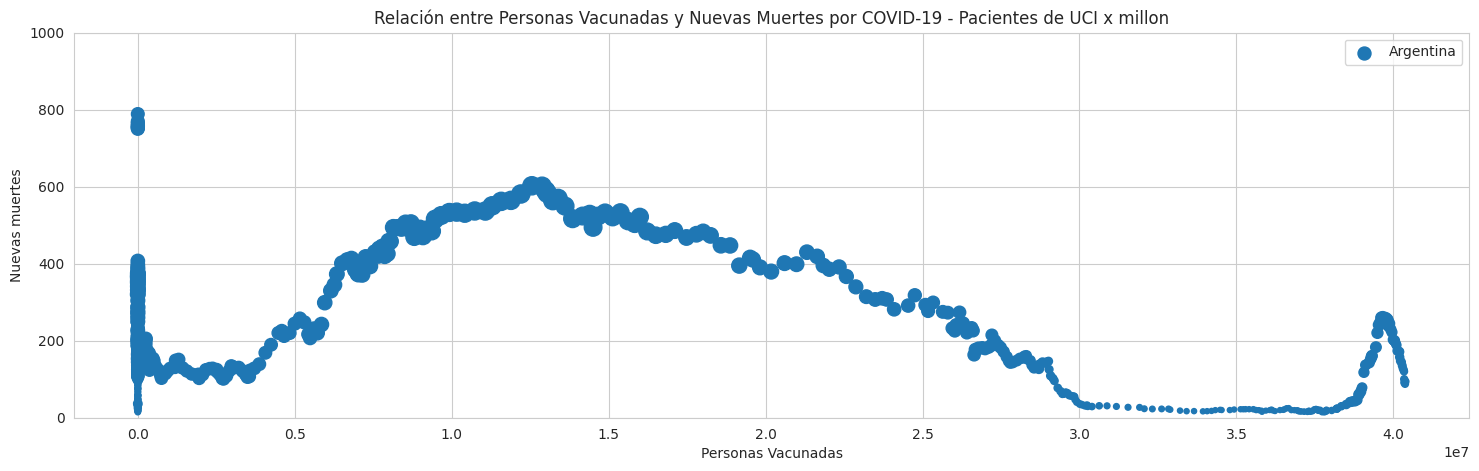

In [ ]:
plt.figure(figsize=(18, 5))
plt.scatter(data=covid_arg, x= 'personas vacunadas', y = 'nuevas muertes suavizadas', s= 'Pacientes de UCI por millón')
plt.legend(['Argentina'])
plt.xlabel('Personas Vacunadas')
plt.ylabel('Nuevas muertes')
plt.ylim(0,1000)
plt.title('Relación entre Personas Vacunadas y Nuevas Muertes por COVID-19 - Pacientes de UCI x millon')

Durante la epoca de vacunacion baja tenemos gran cantidad de personas en UCI independientemente de la cantidad de muertes, en cambio cuando la vacunacion supera 2.5 del eje X ya el tamaño de circulos disminuye notablemente

Text(0, 0.5, 'Pacientes en alta complegidad')

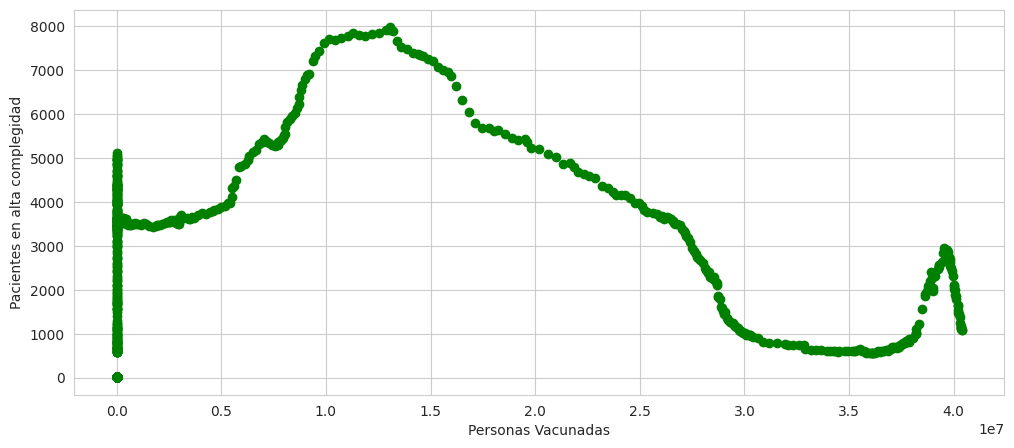

In [ ]:
plt.subplots(figsize=(12,5))
plt.scatter(data=covid_arg, x='personas vacunadas', y='Pacientes en la UCI', c='g')
plt.xlabel ('Personas Vacunadas')
plt.ylabel ('Pacientes en alta complegidad')

Vemos que ambas curvas anteriores tienen tendencias similares, vamos a crear un grafico entre los pacientes que estan en alta complegidad y las nuevas muertes

Text(0.5, 1.0, 'Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

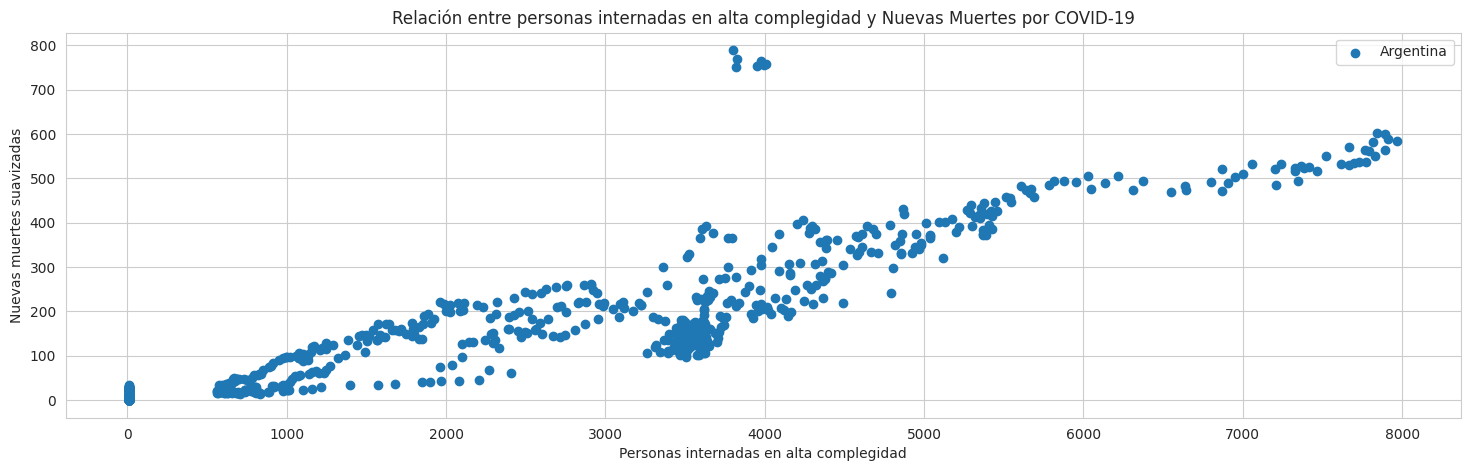

In [ ]:
plt.figure(figsize=(18, 5))
plt.scatter(data=covid_arg, x= 'Pacientes en la UCI', y = 'nuevas muertes suavizadas')
plt.legend(['Argentina'])
plt.xlabel('Personas internadas en alta complegidad')
plt.ylabel('Nuevas muertes suavizadas')

plt.title('Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

Eliminaremos del dataset original las lineas con outlier donde "Nuevas muertes suavizadas sean mayores a 700".

In [ ]:
covid_arg=covid_arg[covid_arg['nuevas muertes suavizadas']<=700]

Text(0.5, 1.0, 'Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

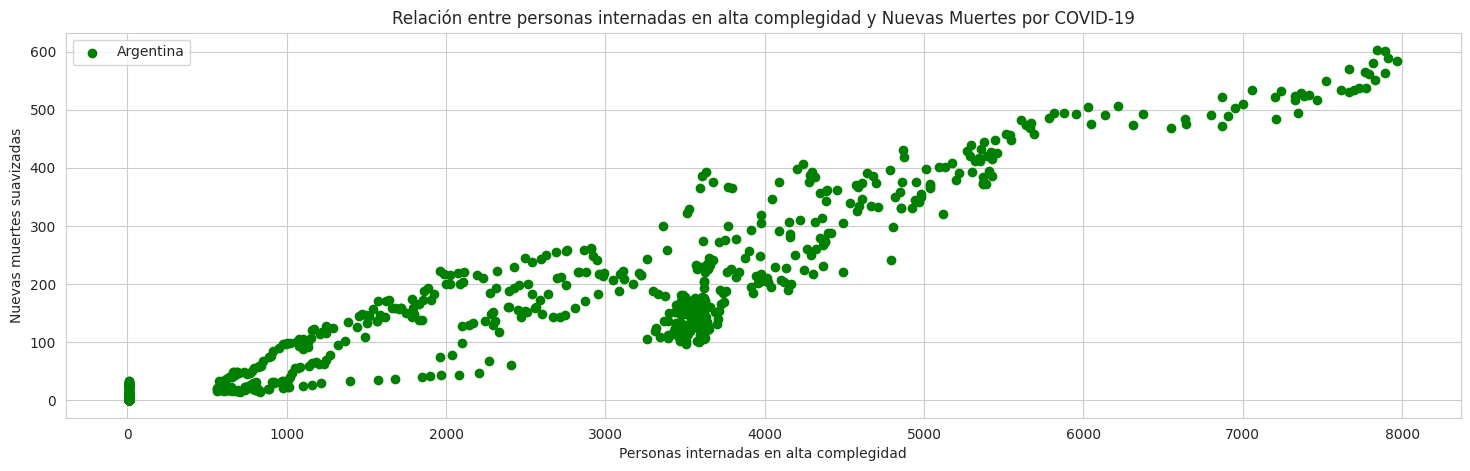

In [ ]:
plt.figure(figsize=(18, 5))
plt.scatter(data=covid_arg, x= 'Pacientes en la UCI', y = 'nuevas muertes suavizadas',c='g')
plt.legend(['Argentina'])
plt.xlabel('Personas internadas en alta complegidad')
plt.ylabel('Nuevas muertes suavizadas')

plt.title('Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

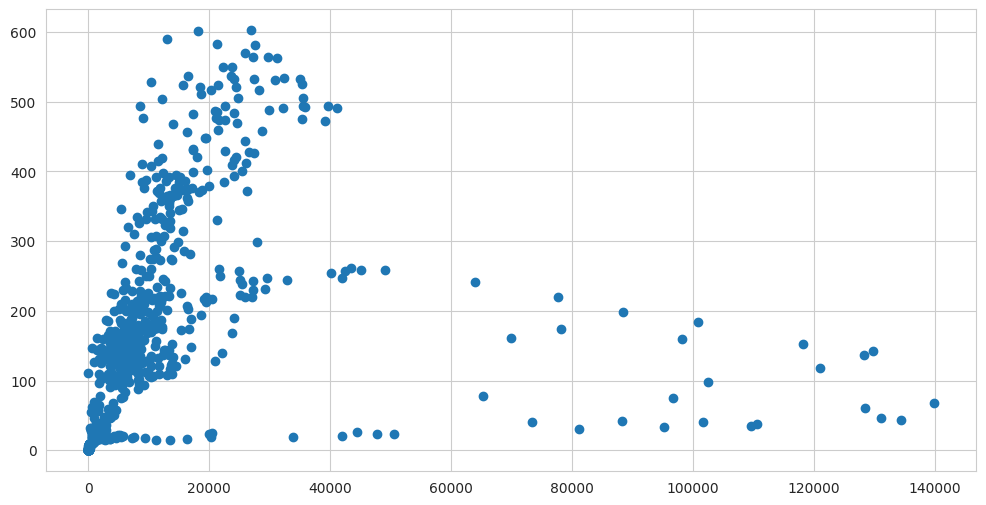

In [ ]:
plt.subplots(figsize =(12,6))
plt.scatter(data=covid_arg, x='casos nuevos', y='nuevas muertes suavizadas')

Tener o no vacunas?. Veamos el comportamiento de los graficos cuando dividimos el dataset en personas sin vacunar y vacunadas, en que % de poblacion vacunada comienza a cambiar la tendencia de crecimiento de muertes. Para ello tenemos que crear una columna que indique el % de personas vacunadas y luego un crecimiento de las muertes, pero de las muertes en funcion de personas contagiadas.

In [ ]:
covid_arg['% de vacunados']=covid_arg['vacunas totales']/covid_arg['población']
covid_arg['% muertes']=covid_arg['nuevas muertes suavizadas']/covid_arg['nuevos casos suavizados']


In [ ]:
porc_vacc=0
covid_arg_zero = covid_arg[covid_arg['% de vacunados']<=porc_vacc]
covid_arg_vacc = covid_arg[covid_arg['% de vacunados']>porc_vacc]

Text(0.5, 1.0, '% de muertes con personas sin vacunar')

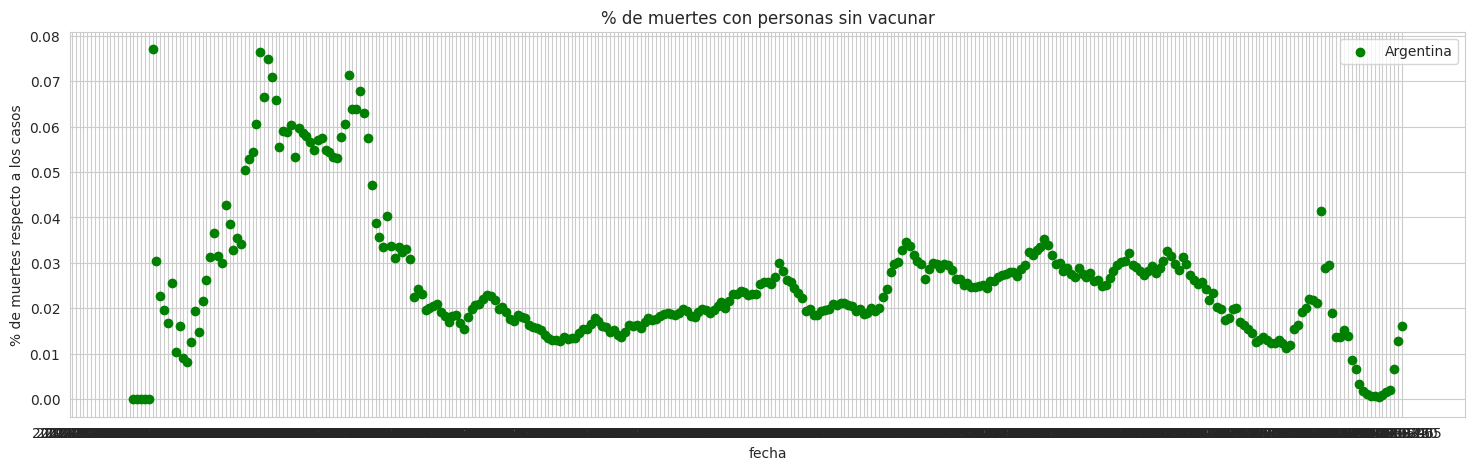

In [ ]:
plt.figure(figsize=(18, 5))
plt.scatter(data=covid_arg_zero, x= 'fecha', y = '% muertes',c='g')
plt.legend(['Argentina'])
plt.xlabel('fecha')
plt.ylabel('% de muertes respecto a los casos')

plt.title('% de muertes con personas sin vacunar')

Text(0.5, 1.0, '% de muertes con personas vacunadas')

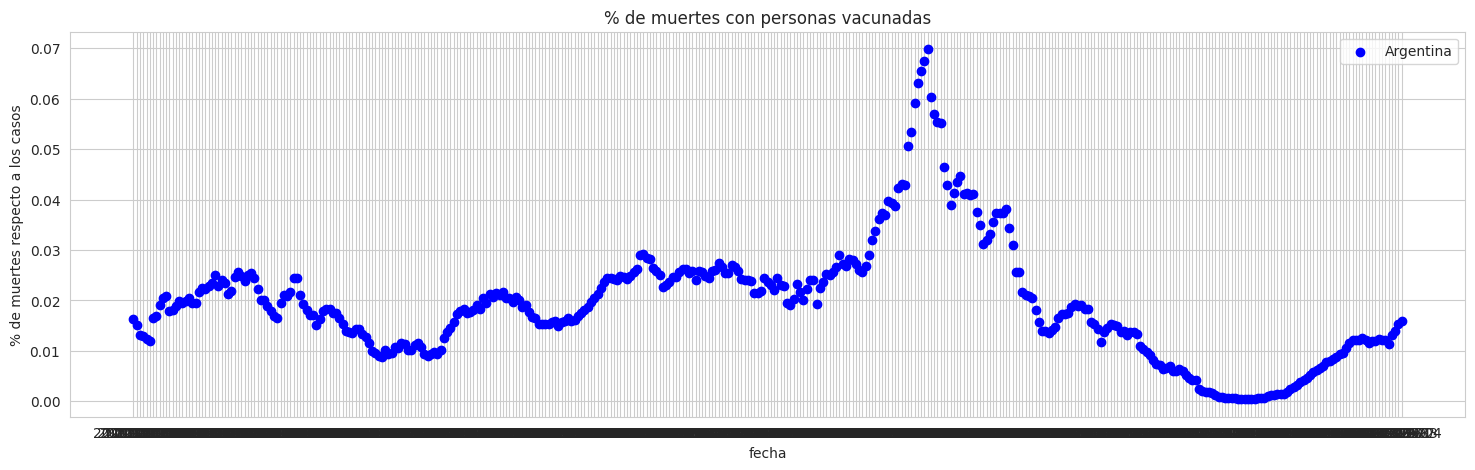

In [ ]:
plt.figure(figsize=(18, 5))
plt.scatter(data=covid_arg_vacc, x= 'fecha', y = '% muertes',c='b')
plt.legend(['Argentina'])
plt.xlabel('fecha')
plt.ylabel('% de muertes respecto a los casos')

plt.title('% de muertes con personas vacunadas')

Text(0.5, 1.0, 'Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

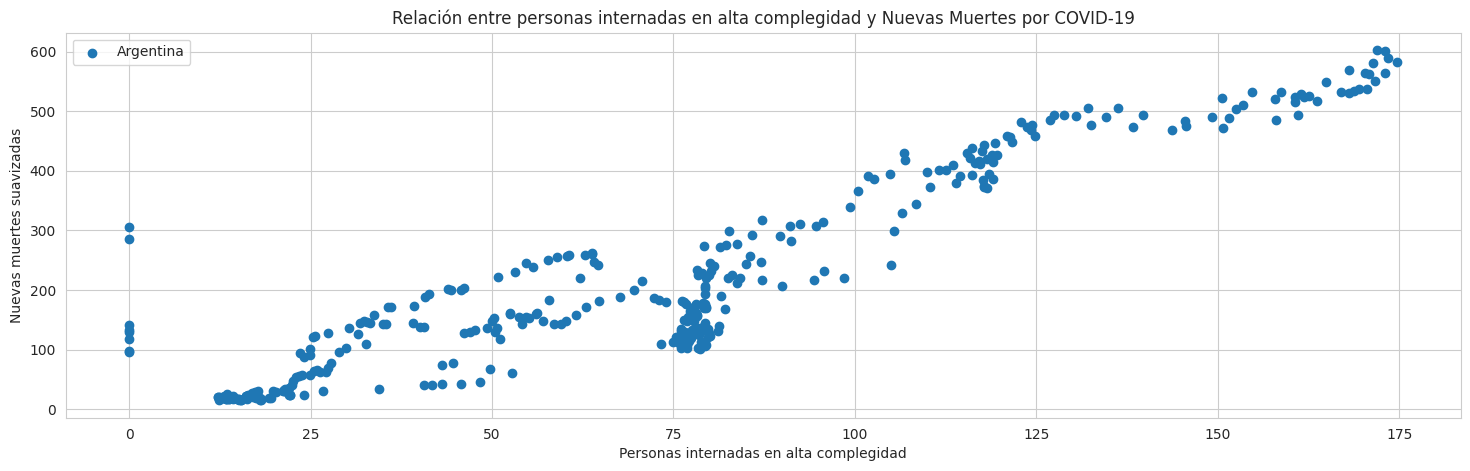

In [ ]:
plt.figure(figsize=(18, 5))
plt.scatter(data=covid_arg_vacc, x= 'Pacientes de UCI por millón', y = 'nuevas muertes suavizadas')
plt.legend(['Argentina'])
plt.xlabel('Personas internadas en alta complegidad')
plt.ylabel('Nuevas muertes suavizadas')

plt.title('Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

Text(0.5, 1.0, 'Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

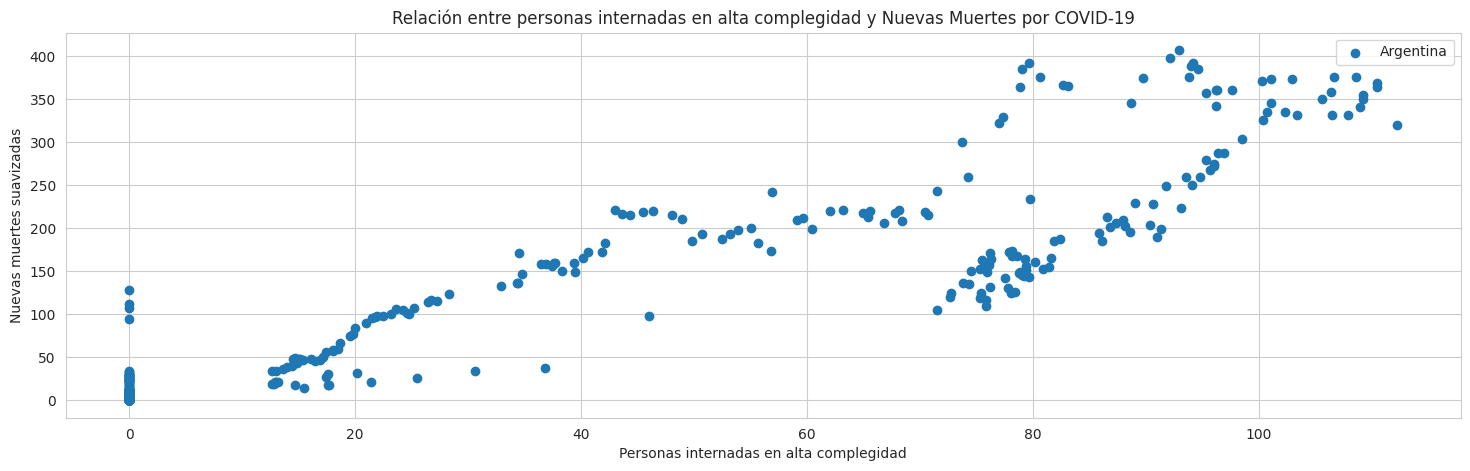

In [ ]:
plt.figure(figsize=(18, 5))
plt.scatter(data=covid_arg_zero, x= 'Pacientes de UCI por millón', y = 'nuevas muertes suavizadas')
plt.legend(['Argentina'])
plt.xlabel('Personas internadas en alta complegidad')
plt.ylabel('Nuevas muertes suavizadas')

plt.title('Relación entre personas internadas en alta complegidad y Nuevas Muertes por COVID-19')

# Preparacion de datos
Vamos a limpiar y procesar los datos, en el caso de valores faltantes ya los completamos con '0', tenemos que tratar el valor atipico del dataset covid_arg y los datos inconsistentes
*   En el tratamiento del dato atipico encontrado, vamos a ubicar el valor maximo (que es el dato atipico) y eliminar esa fila

Metodo IQR

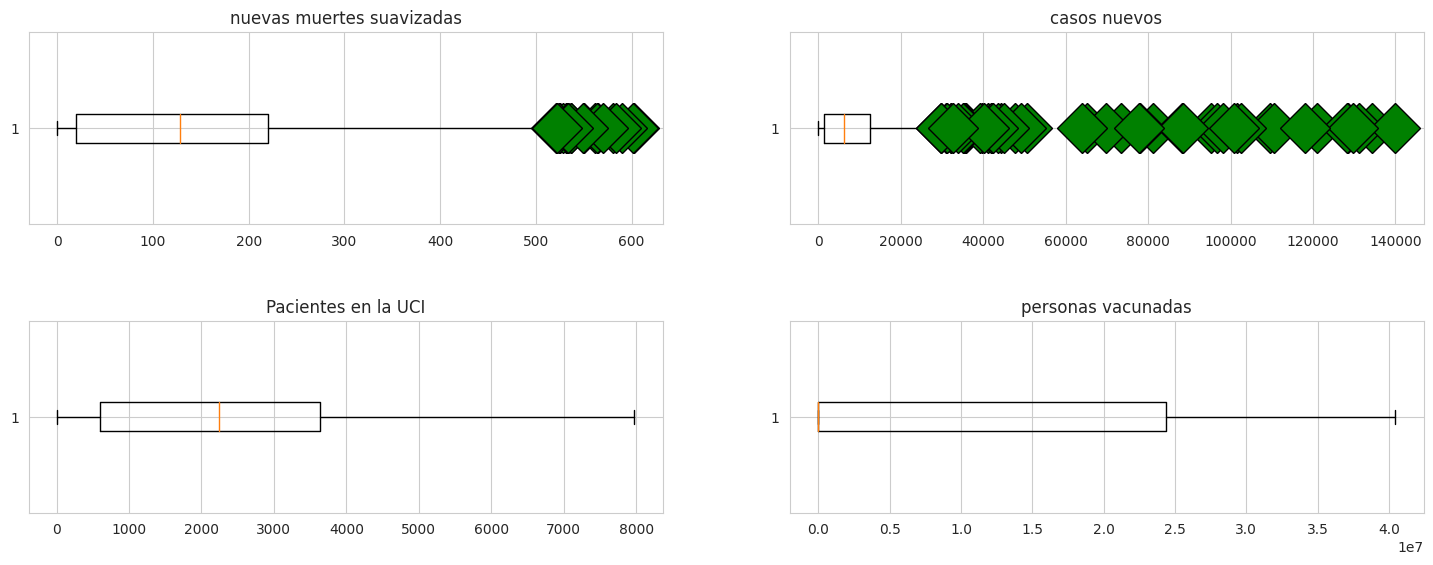

In [ ]:
columnas = ['nuevas muertes suavizadas', 'casos nuevos', 'Pacientes en la UCI', 'personas vacunadas']
plt.figure(figsize=(18, 10))
for x in range(len(columnas)):
  plt.subplot(3,2,x+1)
  plt.boxplot(covid_arg[columnas[x]], vert=False, flierprops=dict(markerfacecolor='g', marker='D', markersize=25))
  plt.xlabel('')
  plt.title(columnas[x])
plt.subplots_adjust(hspace=0.5)

Metodo Objetivo

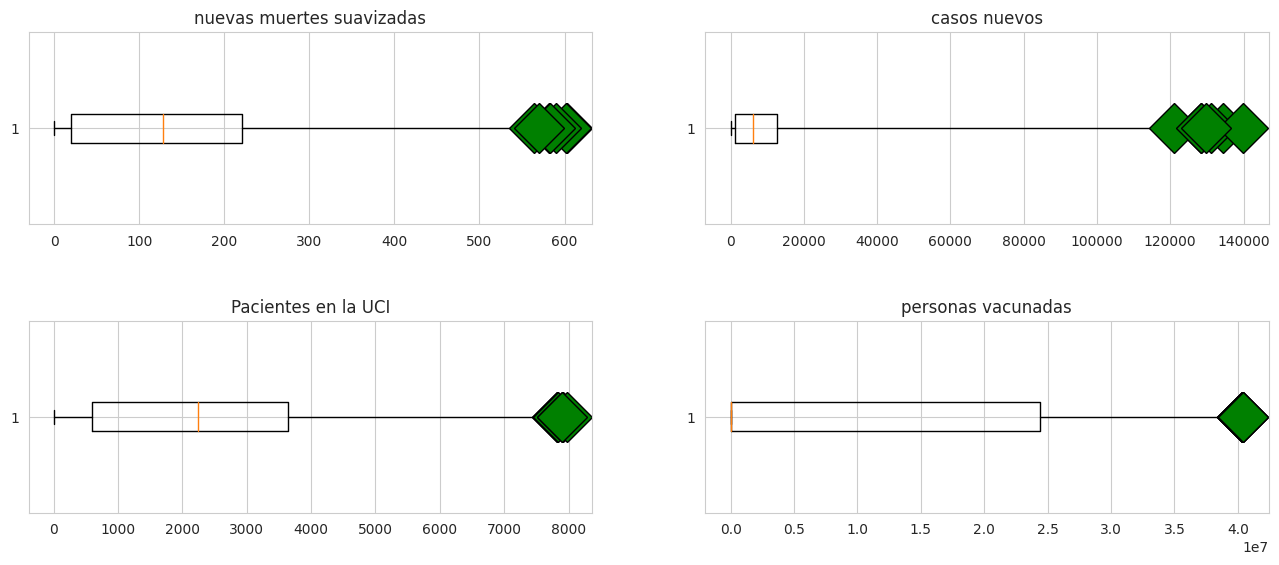

In [ ]:
columnas = ['nuevas muertes suavizadas', 'casos nuevos', 'Pacientes en la UCI', 'personas vacunadas']
plt.figure(figsize=(16, 10))
for x in range(len(columnas)):
  plt.subplot(3,2,x+1)
  plt.boxplot(covid_arg[columnas[x]], vert=False, whis=[1,99.2],flierprops=dict(markerfacecolor='g', marker='D', markersize=25))
  plt.xlabel('')
  plt.title(columnas[x])
plt.subplots_adjust(hspace=0.5)

Metodo Z-score para 'nuevas muertes'

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats

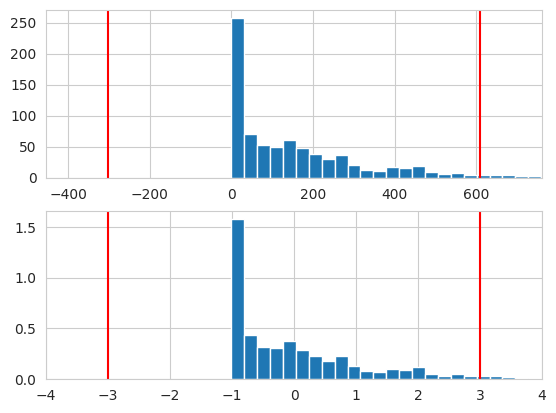

In [ ]:
media = covid_arg['nuevas muertes suavizadas'].mean()
desvio = covid_arg['nuevas muertes suavizadas'].std()
var_normalizada = (covid_arg['nuevas muertes']-media)/desvio
percentile1 = stats.percentileofscore(var_normalizada, -3.5)
percentile2 = stats.percentileofscore(var_normalizada, 3.5)

plt.figure()
plt.subplot(2,1,1)
plt.hist(covid_arg['nuevas muertes'], 25)
plt.xlim(media-4*desvio, media+4*desvio)
plt.axvline(media-3*desvio, color='r')
plt.axvline(media+3*desvio, color='r')
plt.subplot(2,1,2)
plt.hist(var_normalizada, 25, density=True)
plt.xlim(-4,4)
plt.axvline(-3, color='r')
plt.axvline(3, color='r')

Los valores del dataset son descripcion de un problema y son valores consecuentes de condiciones

(0.0, 1000.0)

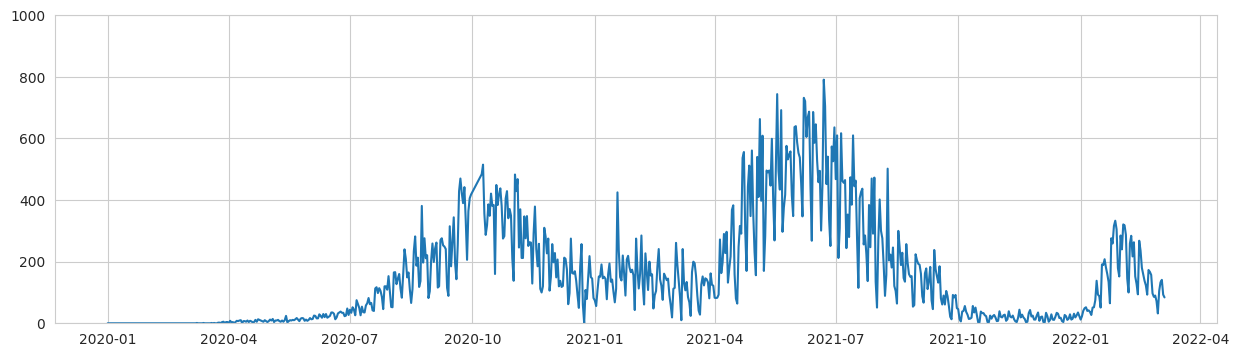

In [ ]:
x3=pd.to_datetime(covid_arg['fecha'])
y3=covid_arg['nuevas muertes']
fig3, ax3=plt.subplots(figsize=(15,4))
ax3.plot(x3,y3)
plt.ylim(0,1000)

Vemos la desaparicion del outlier, este valor es definido como outlier ya que no sigue la linea consecuente del resto de los datos.

Vamos a crear algunas columnas que nos pueden servir
Importante crear una nueva columna que indique la relacion entre las muertes diarias respecto a los pacientes de UCI

In [ ]:
covid_arg['Muertes vs casos'] = covid_arg['nuevas muertes suavizadas']/covid_arg['casos nuevos']
covid_arg['Muertes vs pacientes UCI'] = covid_arg['nuevas muertes suavizadas']/covid_arg['Pacientes en la UCI']
covid_arg['Muertes vs casos'].fillna(0)
covid_arg['Muertes vs pacientes UCI'].fillna(0)

5854    0.000000
5855    0.000000
5856    0.000000
5857    0.000000
5858    0.000000
          ...   
6644    0.080357
6645    0.079797
6646    0.087493
6647    0.088423
6648    0.087626
Name: Muertes vs pacientes UCI, Length: 788, dtype: float64

Text(0.5, 1.0, 'Relacion entre los casos y las muertes x covid')

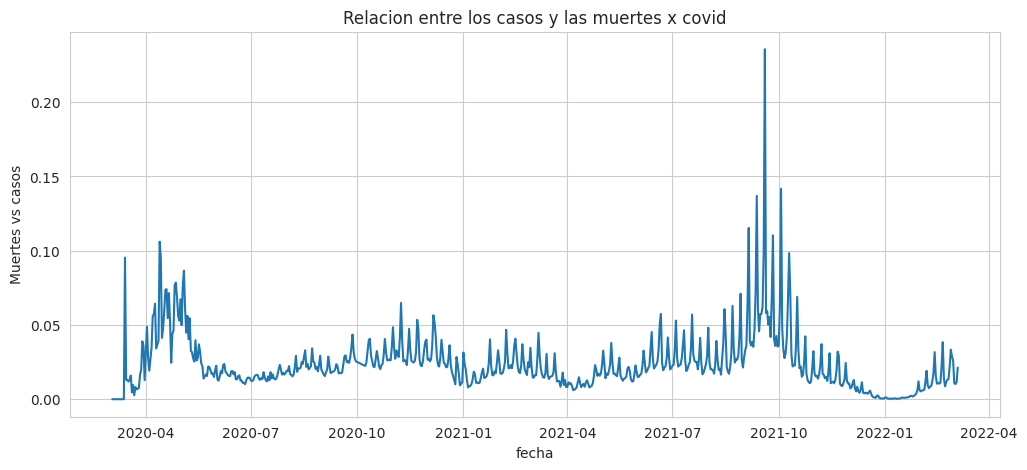

In [ ]:
plt.subplots(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x3, y='Muertes vs casos')
plt.title('Relacion entre los casos y las muertes x covid')

In [ ]:
covid_arg['Muertes vs casos'].fillna(0, inplace = True)
covid_arg['Muertes vs casos'].describe()

count    788.000000
mean            inf
std             NaN
min        0.000000
25%        0.011336
50%        0.018791
75%        0.027631
max             inf
Name: Muertes vs casos, dtype: float64

<Axes: xlabel='fecha', ylabel='Muertes vs pacientes UCI'>

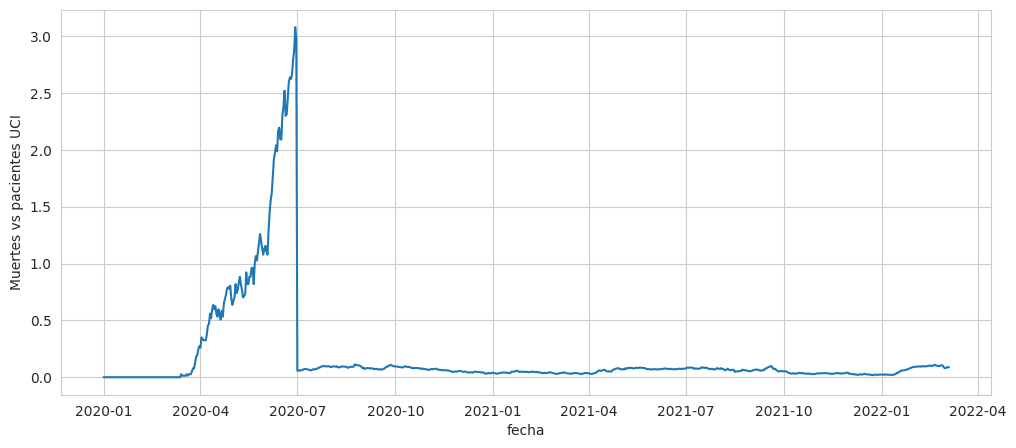

In [ ]:
plt.subplots(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x3, y='Muertes vs pacientes UCI')

Que paso en Julio del 2020?

<Axes: xlabel='fecha', ylabel='Pacientes en la UCI'>

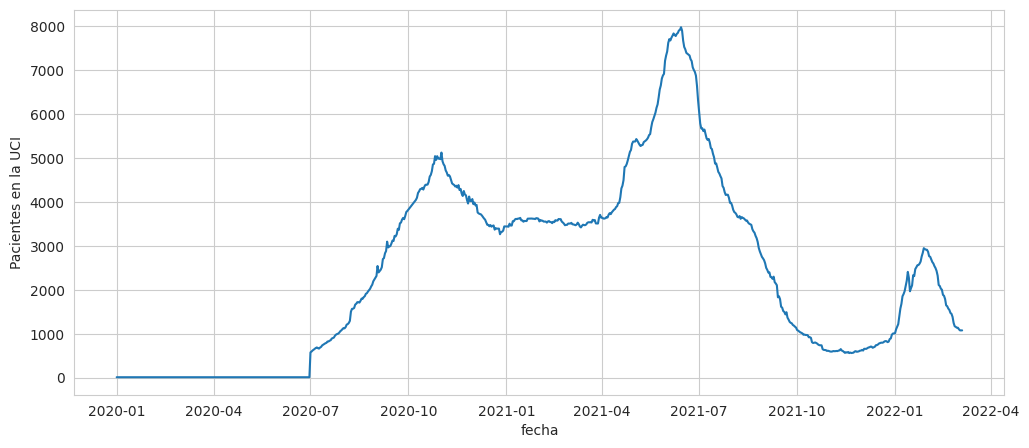

In [ ]:
plt.subplots(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x3, y='Pacientes en la UCI')

Observemos el comportamiento mas a detalle luego de julio del 2020

(0.0, 0.2)

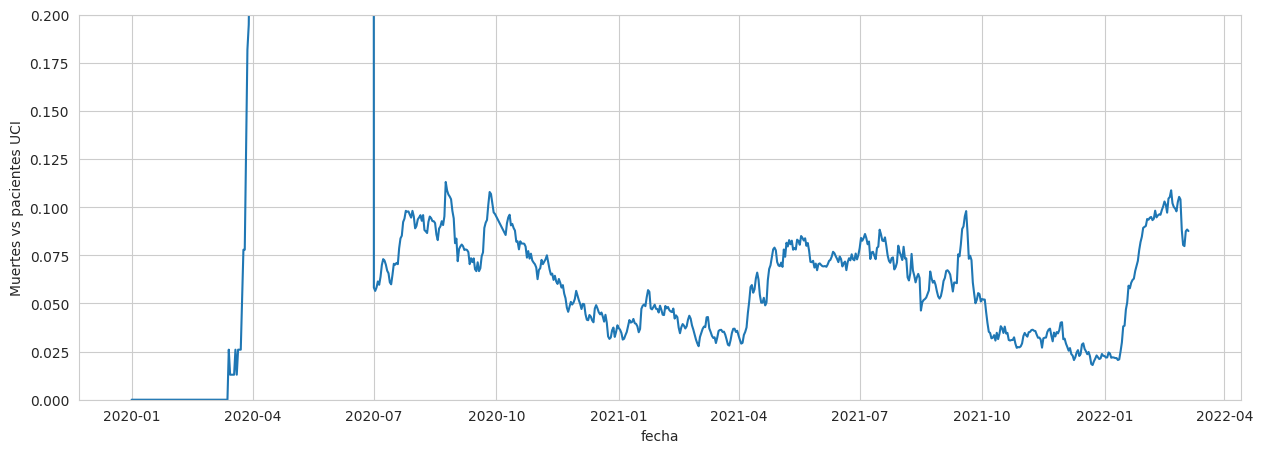

In [ ]:
plt.subplots(figsize=(15,5))
sns.lineplot(data=covid_arg, x=x3, y='Muertes vs pacientes UCI')
plt.ylim(0,0.2)

In [ ]:
covid_arg['Muertes vs vacunados'] = covid_arg['nuevas muertes suavizadas']/covid_arg['nuevas  vacunas']
covid_arg['Muertes vs vacunados'].fillna(0)

5854    0.000000
5855    0.000000
5856    0.000000
5857    0.000000
5858    0.000000
          ...   
6644    0.001716
6645    0.000455
6646    0.000661
6647    0.000662
6648         inf
Name: Muertes vs vacunados, Length: 788, dtype: float64

(0.0, 0.015)

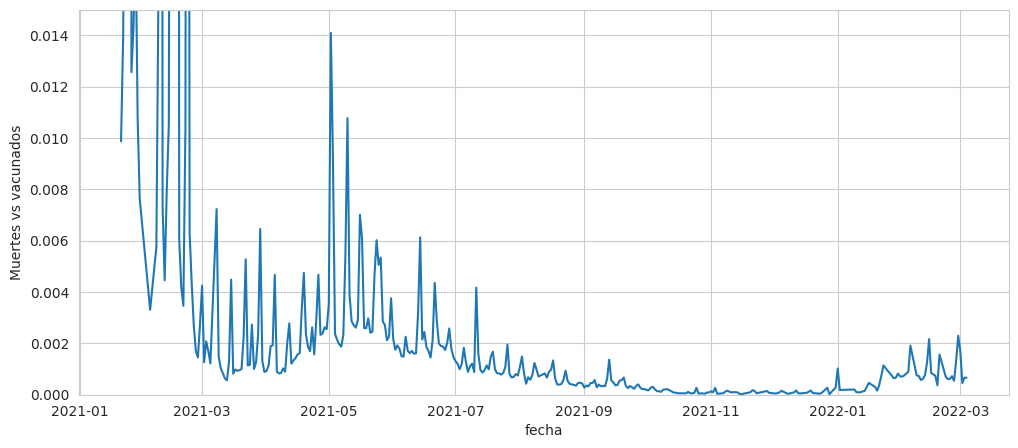

In [ ]:
plt.subplots(figsize=(12,5))
sns.lineplot(data=covid_arg, x=x3, y='Muertes vs vacunados')
plt.ylim(0,0.015)

Busquemos valores duplicados

In [ ]:
covid.shape

(166326, 67)

In [ ]:
covid.drop_duplicates()
covid.shape

(166326, 67)

In [ ]:
extra.shape

(202760, 56)

In [ ]:
extra.drop_duplicates()
extra.shape

(202760, 56)

No se encontraron valores duplicandos en ninguna de los dataset

In [ ]:
extra['Fecha'].dtype

dtype('int64')

In [ ]:
print(extra['Fecha'])

0         20200101
1         20200102
2         20200103
3         20200104
4         20200105
            ...   
202755    20221227
202756    20221228
202757    20221229
202758    20221230
202759    20221231
Name: Fecha, Length: 202760, dtype: int64


In [ ]:
extra['Fecha'] = extra['Fecha'] = pd.to_datetime(extra['Fecha'], format='%Y/%m/%d')

In [ ]:
extra_arg = extra[extra['NombrePaís']=='Argentina']
extra_arg

NombrePaís CódigoPaís  NombreRegión  CódigoRegión Jurisdicción  \
6576  Argentina        ARG           0.0           0.0    NAT_TOTAL   
6577  Argentina        ARG           0.0           0.0    NAT_TOTAL   
6578  Argentina        ARG           0.0           0.0    NAT_TOTAL   
6579  Argentina        ARG           0.0           0.0    NAT_TOTAL   
6580  Argentina        ARG           0.0           0.0    NAT_TOTAL   
...         ...        ...           ...           ...          ...   
7667  Argentina        ARG           0.0           0.0    NAT_TOTAL   
7668  Argentina        ARG           0.0           0.0    NAT_TOTAL   
7669  Argentina        ARG           0.0           0.0    NAT_TOTAL   
7670  Argentina        ARG           0.0           0.0    NAT_TOTAL   
7671  Argentina        ARG           0.0           0.0    NAT_TOTAL   

                             Fecha  C1M_Cierre de la escuela  C1M_Flag  \
6576 1970-01-01 00:00:00.020200101                       0.0       1.0   
6577 1970-01-01 00:00:00.020200102                       0.0       1.0   
6578 1970-01-01 00:00:00.020200103                       0.0       1.0   
6579 1970-01-01 00:00:00.020200104                       0.0       1.0   
6580 1970-01-01 00:00:00.020200105                       0.0       1.0   
...                            ...                       ...       ...   
7667 1970-01-01 00:00:00.020221227                       0.0       1.0   
7668 1970-01-01 00:00:00.020221228                       0.0       1.0   
7669 1970-01-01 00:00:00.020221229                       0.0       1.0   
7670 1970-01-01 00:00:00.020221230                       0.0       1.0   
7671 1970-01-01 00:00:00.020221231                       0.0       1.0   

      C2M_Cierre del lugar de trabajo  C2M_Flag  ...  \
6576                              0.0       1.0  ...   
6577                              0.0       1.0  ...   
6578                              0.0       1.0  ...   
6579                              0.0       1.0  ...   
6580                              0.0       1.0  ...   
...                               ...       ...  ...   
7667                              0.0       1.0  ...   
7668                              0.0       1.0  ...   
7669                              0.0       1.0  ...   
7670                              0.0       1.0  ...   
7671                              0.0       1.0  ...   

      V3_Apoyo financiero para vacunas (resumen)  \
6576                                           0   
6577                                           0   
6578                                           0   
6579                                           0   
6580                                           0   
...                                          ...   
7667                                           5   
7668                                           5   
7669                                           5   
7670                                           5   
7671                                           5   

      V4_Vacunación Obligatoria (resumen)  CasosConfirmados  \
6576                                  0.0               0.0   
6577                                  0.0               0.0   
6578                                  0.0               0.0   
6579                                  0.0               0.0   
6580                                  0.0               0.0   
...                                   ...               ...   
7667                                  0.0         9891139.0   
7668                                  0.0         9891139.0   
7669                                  0.0         9891139.0   
7670                                  0.0         9891139.0   
7671                                  0.0         9891139.0   

      Muertes confirmadas  Mayoridad vacunada  Población vacunada  \
6576                  0.0                  NV                0.00   
6577                  0.0                  NV                0.00   
6

In [ ]:
extra_arg['Fecha']=pd.to_datetime(extra_arg['Fecha'])
covid_arg['Fecha']=pd.to_datetime(covid_arg['fecha'])

<ipython-input-69-1693b772052c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  extra_arg['Fecha']=pd.to_datetime(extra_arg['Fecha'])


In [ ]:
big_covid_arg=pd.merge(covid_arg,extra_arg, on=['Fecha'])
big_covid_arg.describe()

casos totales  casos nuevos  nuevos casos suavizados  muertes totales  \
count            0.0           0.0                      0.0              0.0   
mean             NaN           NaN                      NaN              NaN   
std              NaN           NaN                      NaN              NaN   
min              NaN           NaN                      NaN              NaN   
25%              NaN           NaN                      NaN              NaN   
50%              NaN           NaN                      NaN              NaN   
75%              NaN           NaN                      NaN              NaN   
max              NaN           NaN                      NaN              NaN   

       nuevas muertes  nuevas muertes suavizadas  casos totales por millón  \
count             0.0                        0.0                       0.0   
mean              NaN                        NaN                       NaN   
std               NaN                        NaN                       NaN   
min               NaN                        NaN                       NaN   
25%               NaN                        NaN                       NaN   
50%               NaN                        NaN                       NaN   
75%               NaN                        NaN                       NaN   
max               NaN                        NaN                       NaN   

       nuevos casos por millón  nuevos casos suavizados por millón  \
count                      0.0                                 0.0   
mean                       NaN                                 NaN   
std                        NaN                                 NaN   
min                        NaN                                 NaN   
25%                        NaN                                 NaN   
50%                        NaN                                 NaN   
75%                        NaN                                 NaN   
max                        NaN                                 NaN   

       muertes totales por millón  ...  \
count                         0.0  ...   
mean                          NaN  ...   
std                           NaN  ...   
min                           NaN  ...   
25%                           NaN  ...   
50%                           NaN  ...   
75%                           NaN  ...   
max                           NaN  ...   

       V2G_Trabajadores de primera línea (atención sanitaria)  \
count                                                0.0        
mean                                                 NaN        
std                                                  NaN        
min                                                  NaN        
25%                                                  NaN        
50%                                                  NaN        
75%                                                  NaN        
max                                                  NaN        

       V3_Apoyo financiero para vacunas (resumen)  \
count                                         0.0   
mean                                          NaN   
std                                           NaN   
min                                           NaN   
25%                                           NaN   
50%                                           NaN   
75%                                           NaN   
max                                           NaN   

       V4_Vacunación Obligatoria (resumen)  CasosConfirmados  \
count                                  0.0               0.0   
mean                                   NaN               NaN   
std                                    NaN               NaN   
min                                    NaN               NaN   
25%                                    NaN               NaN   
50%                                    NaN               NaN   
75%                                    NaN               NaN 

Con la union de estos dataset estamos comenzando el intento de responder la 2ª y 3º pregunta

*   ¿Podremos crear un modelo que prediga contagios y muertes?
*   `¿Existen medidas eficaces para disminuir la velocidad de contagios?¿Cuales fueron?`
*   `¿Mediante el analisis de datos, es posible encontrar cuales son las medidas mas efectivas para evitar muertes?`
*   ¿Es posible utilizar la experiencia de paises que sufrieron inicialmente la enfermedad para predecir el comportamiento en Argentina?

Repasemos cuales son las columnas que refierena a las diferentes tipos de medidas
* índice general de respuesta del gobierno (todos los indicadores)
* índice de contención y salud (todos los indicadores C y H)
* índice de rigor (todos los indicadores C, más el H1 que registra las campañas de información pública)
* índice de apoyo económico (todos los indicadores E)

# Resumen de Modelos analiticos
Los modelos analiticos que vimos en clase como
- Arbol de desicion
- KNN
- Regresion logistica
- Aprendizaje supervisado - Regresion

In [ ]:
import scipy
import sklearn

In [ ]:
CorrelacionArg = covid_arg.corr()

<ipython-input-72-befdd2f43132>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CorrelacionArg = covid_arg.corr()


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


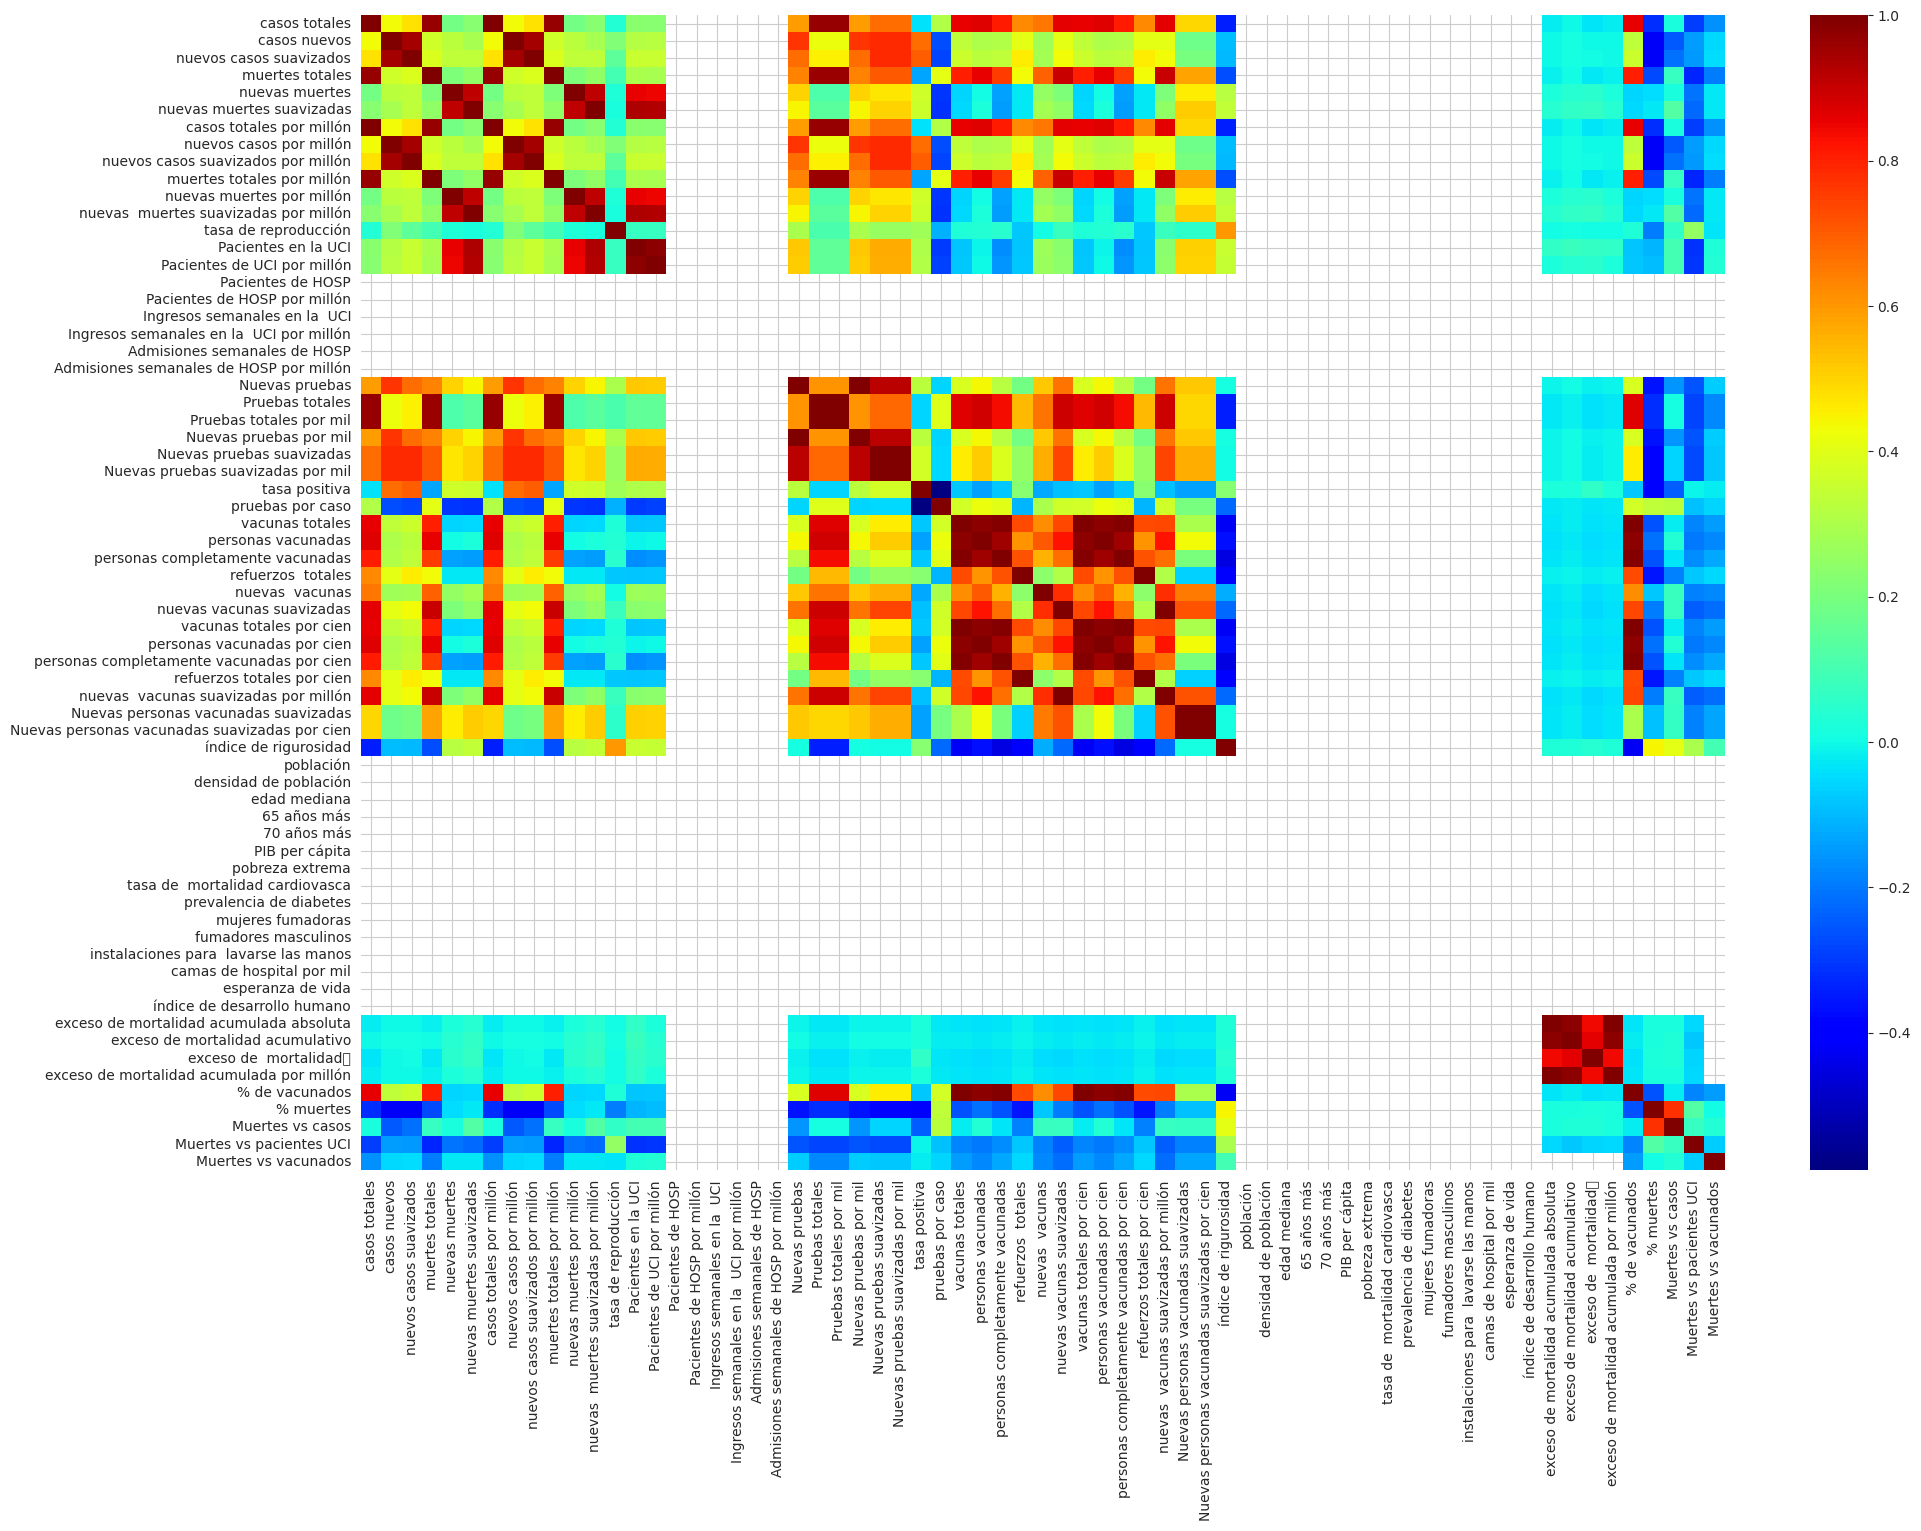

In [ ]:
plt.figure(figsize=(22, 15))
sns.heatmap(CorrelacionArg, cmap='jet')

In [ ]:
def parejas(df):
    '''Obtiene diagonal inferior de parejas en matriz de correlacion'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def correlaciones(data, n=5):
    numeric_data = data.select_dtypes(include='number')
    au_corr = numeric_data.corr().abs().unstack()
    labels_to_drop = parejas(numeric_data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    au_corr = au_corr[au_corr < 1]
    return au_corr[0:n]

print("Correlaciones mas grandes")
print(correlaciones(covid_arg, 10)) # Saquemos el top 10

Correlaciones mas grandes
exceso de mortalidad acumulada absoluta  exceso de mortalidad acumulada por millón    1.0
casos totales                            casos totales por millón                     1.0
muertes totales                          muertes totales por millón                   1.0
casos nuevos                             nuevos casos por millón                      1.0
nuevos casos suavizados                  nuevos casos suavizados por millón           1.0
Pruebas totales                          Pruebas totales por mil                      1.0
vacunas totales por cien                 % de vacunados                               1.0
vacunas totales                          vacunas totales por cien                     1.0
personas vacunadas                       personas vacunadas por cien                  1.0
nuevas vacunas suavizadas                nuevas  vacunas suavizadas por millón        1.0
dtype: float64


Quiero eliminar las columnas que no tienen relacion ni esta generando algo en el cuadro de correlaciones. Vamos a sacar "'Pacientes de HOSP','Pacientes de HOSP por millón','Ingresos semanales en la  UCI','Ingresos semanales en la  UCI por millón','Admisiones semanales de HOSP','Admisiones semanales de HOSP por millón','tasa positiva','Nuevas personas vacunadas suavizadas por cien','población','densidad de población','edad mediana','65 años más','70 años más','PIB per cápita','pobreza extrema','tasa de  mortalidad cardiovasca','prevalencia de diabetes','mujeres fumadoras','fumadores masculinos','instalaciones para  lavarse las manos','camas de hospital por mil','esperanza de vida','índice de desarrollo humano','exceso de mortalidad acumulada absoluta','exceso de mortalidad acumulativo','exceso de  mortalidad	','exceso de mortalidad acumulada por millón'].
Todas las columnas que tengan algun valor relativo ya sea por millon, suavizadas o algo por el estilo se eliminan y quedan las siguientes


In [ ]:
col_a_usar = ['Código ISO','Continente','ubicación','fecha','casos nuevos','nuevas muertes','tasa de reproducción','Pacientes en la UCI','Nuevas pruebas','pruebas por caso','personas vacunadas','personas completamente vacunadas','refuerzos  totales','nuevas  vacunas','índice de rigurosidad']


In [ ]:
Argentina_datos1 = covid_arg[col_a_usar]
Argentina_datos1.head()

Código ISO     Continente  ubicación       fecha  casos nuevos  \
5854        ARG  South America  Argentina  2020-01-01           0.0   
5855        ARG  South America  Argentina  2020-01-02           0.0   
5856        ARG  South America  Argentina  2020-01-03           0.0   
5857        ARG  South America  Argentina  2020-01-04           0.0   
5858        ARG  South America  Argentina  2020-01-05           0.0   

      nuevas muertes  tasa de reproducción  Pacientes en la UCI  \
5854             0.0                   0.0                 11.0   
5855             0.0                   0.0                 11.0   
5856             0.0                   0.0                 11.0   
5857             0.0                   0.0                 11.0   
5858             0.0                   0.0                 11.0   

      Nuevas pruebas  pruebas por caso  personas vacunadas  \
5854             4.0               0.0                 0.0   
5855            95.0               0.0                 0.0   
5856             5.0               0.0                 0.0   
5857            76.0               0.0                 0.0   
5858            14.0               0.0                 0.0   

      personas completamente vacunadas  refuerzos  totales  nuevas  vacunas  \
5854                               0.0                 0.0              0.0   
5855                               0.0                 0.0              0.0   
5856                               0.0                 0.0              0.0   
5857                               0.0                 0.0              0.0   
5858                               0.0                 0.0              0.0   

      índice de rigurosidad  
5854                    0.0  
5855                    0.0  
5856                    0.0  
5857                    0.0  
5858                    0.0

<ipython-input-77-cbb7e2664700>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  CorrelacionArg1 = Argentina_datos1.corr()


<Axes: >

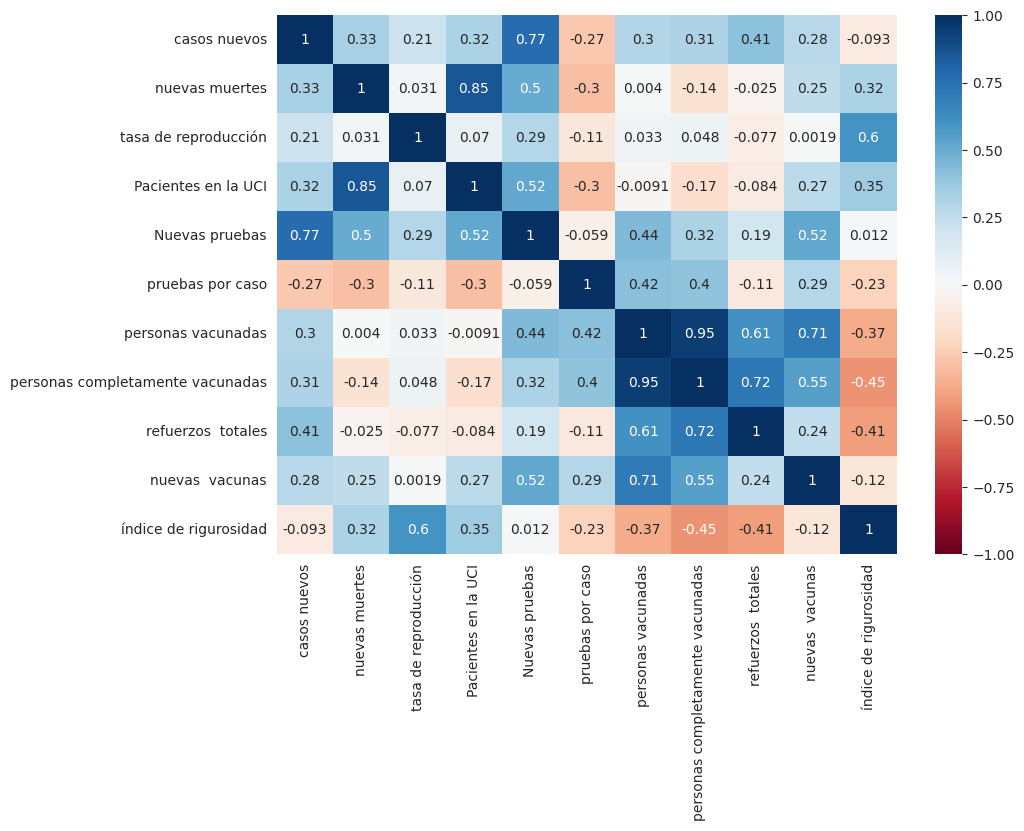

In [ ]:
CorrelacionArg1 = Argentina_datos1.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(CorrelacionArg1,annot=True , cmap='RdBu' , vmin=-1 , vmax=1)

Conclusiones que se pueden sacar del grafico anterior:

 - 0.95 "nuevas vacunas" con "personas totalmente vacunadas", estamos hablando de lo mismo
 - 0.77 "refuerzos totales" con "personas completamente vacunadas", hablamos de lo mismo
 - 0.77 "Casos nuevos" tienen correlacion con "Nuevas pruebas" pero siendo que mas casos se detectan con mas pruebas, tiene sentido que asi suceda

- 0.85 "Pacientes en la UCI" vs "Nuevas muertes" es el gran ganador para predecir la cantidad de muertes

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
import statsmodels.api as sm

Antes de aplicar stepwise selection tengo que dejar solo las columnas numericas

In [ ]:
x=covid_arg.drop('nuevas muertes',axis=1)
y=covid_arg['nuevas muertes']


In [ ]:
x.describe()

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4527: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


casos totales   casos nuevos  nuevos casos suavizados  muertes totales  \
count   7.880000e+02     788.000000               788.000000       788.000000   
mean    2.654303e+06   11223.875635             11201.053298     54724.720812   
std     2.545830e+06   19071.272808             18296.301863     46910.611490   
min     0.000000e+00       0.000000                 0.000000         0.000000   
25%     1.138738e+05    1269.250000              1205.678500      2096.500000   
50%     1.965822e+06    6173.500000              6455.786000     48842.500000   
75%     5.126435e+06   12579.250000             12600.429000    110106.750000   
max     8.934328e+06  139853.000000            114018.143000    126708.000000   

       nuevas muertes suavizadas  casos totales por millón  \
count                 788.000000                788.000000   
mean                  153.623815              58200.966895   
std                   152.028747              55822.469600   
min                     0.000000                  0.000000   
25%                    19.714000               2496.912750   
50%                   128.071500              43104.627500   
75%                   220.214500             112407.471250   
max                   602.429000             195903.229000   

       nuevos casos por millón  nuevos casos suavizados por millón  \
count               788.000000                          788.000000   
mean                246.106212                          245.605775   
std                 418.176248                          401.183471   
min                   0.000000                            0.000000   
25%                  27.830750                           26.437000   
50%                 135.366500                          141.556500   
75%                 275.825500                          276.289500   
max                3066.560000                         2500.079000   

       muertes totales por millón  nuevas muertes por millón  ...  \
count                  788.000000                 788.000000  ...   
mean                  1199.950297                   3.378610  ...   
std                   1028.610113                   3.648805  ...   
min                      0.000000                   0.000000  ...   
25%                     45.970000                   0.395000  ...   
50%                   1070.970500                   2.313000  ...   
75%                   2414.313750                   5.229750  ...   
max                   2778.329000                  17.344000  ...   

       índice de desarrollo humano  exceso de mortalidad acumulada absoluta  \
count                      788.000                               788.000000   
mean                         0.845                               117.059391   
std                          0.000                              2198.533604   
min                          0.845                             -7413.600000   
25%                          0.845                                 0.000000   
50%                          0.845                                 0.000000   
75%                          0.845                                 0.000000   
max                          0.845                             41948.200000   

       exceso de mortalidad acumulativo  exceso de  mortalidad\t  \
count                        788.000000               788.000000   
mean                           0.026015                 0.196739   
std                            0.728077                 2.979719   
min                           -4.510000               -12.660000   
25%                            0.000000                 0.000000   
50%                            0.000000                 0.000000   
75%                            0.000000                 0.000000   
max                           12.450000                51.960000   

       exceso de mortalidad acumulada por millón  % de vacunados   % muertes  \
count                                 788.000000      788.00

In [ ]:
y

5854      0.0
5855      0.0
5856      0.0
5857      0.0
5858      0.0
        ...  
6644    105.0
6645    133.0
6646    141.0
6647     93.0
6648     84.0
Name: nuevas muertes, Length: 788, dtype: float64

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error,confusion_matrix,ConfusionMatrixDisplay,accuracy_score, recall_score,precision_score
from sklearn.feature_selection import SequentialFeatureSelector
from mlxtend.feature_selection import SequentialFeatureSelector as SequentialFeatureSelector2

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

# Prediccion de Muertes
el dataset Argentina_datos lo vamos a dividir en 2 partes, uno que contenga la informacion sin personas vacunadas, y otra que tenga la informacion pero con personas vacunadas y comparar la tendencia

In [ ]:
Argentina_sin_vacunas = covid_arg[covid_arg['vacunas totales']==0]
Outlier = Argentina_sin_vacunas['nuevas muertes'].idxmax()
Argentina_sin_vacunas = Argentina_sin_vacunas.drop(Outlier)
Argentina_con_vacunas = covid_arg[covid_arg['vacunas totales']>0]

In [ ]:
Sinvacunas=Argentina_sin_vacunas.corr()
Convacunas=Argentina_con_vacunas.corr()


<Axes: >

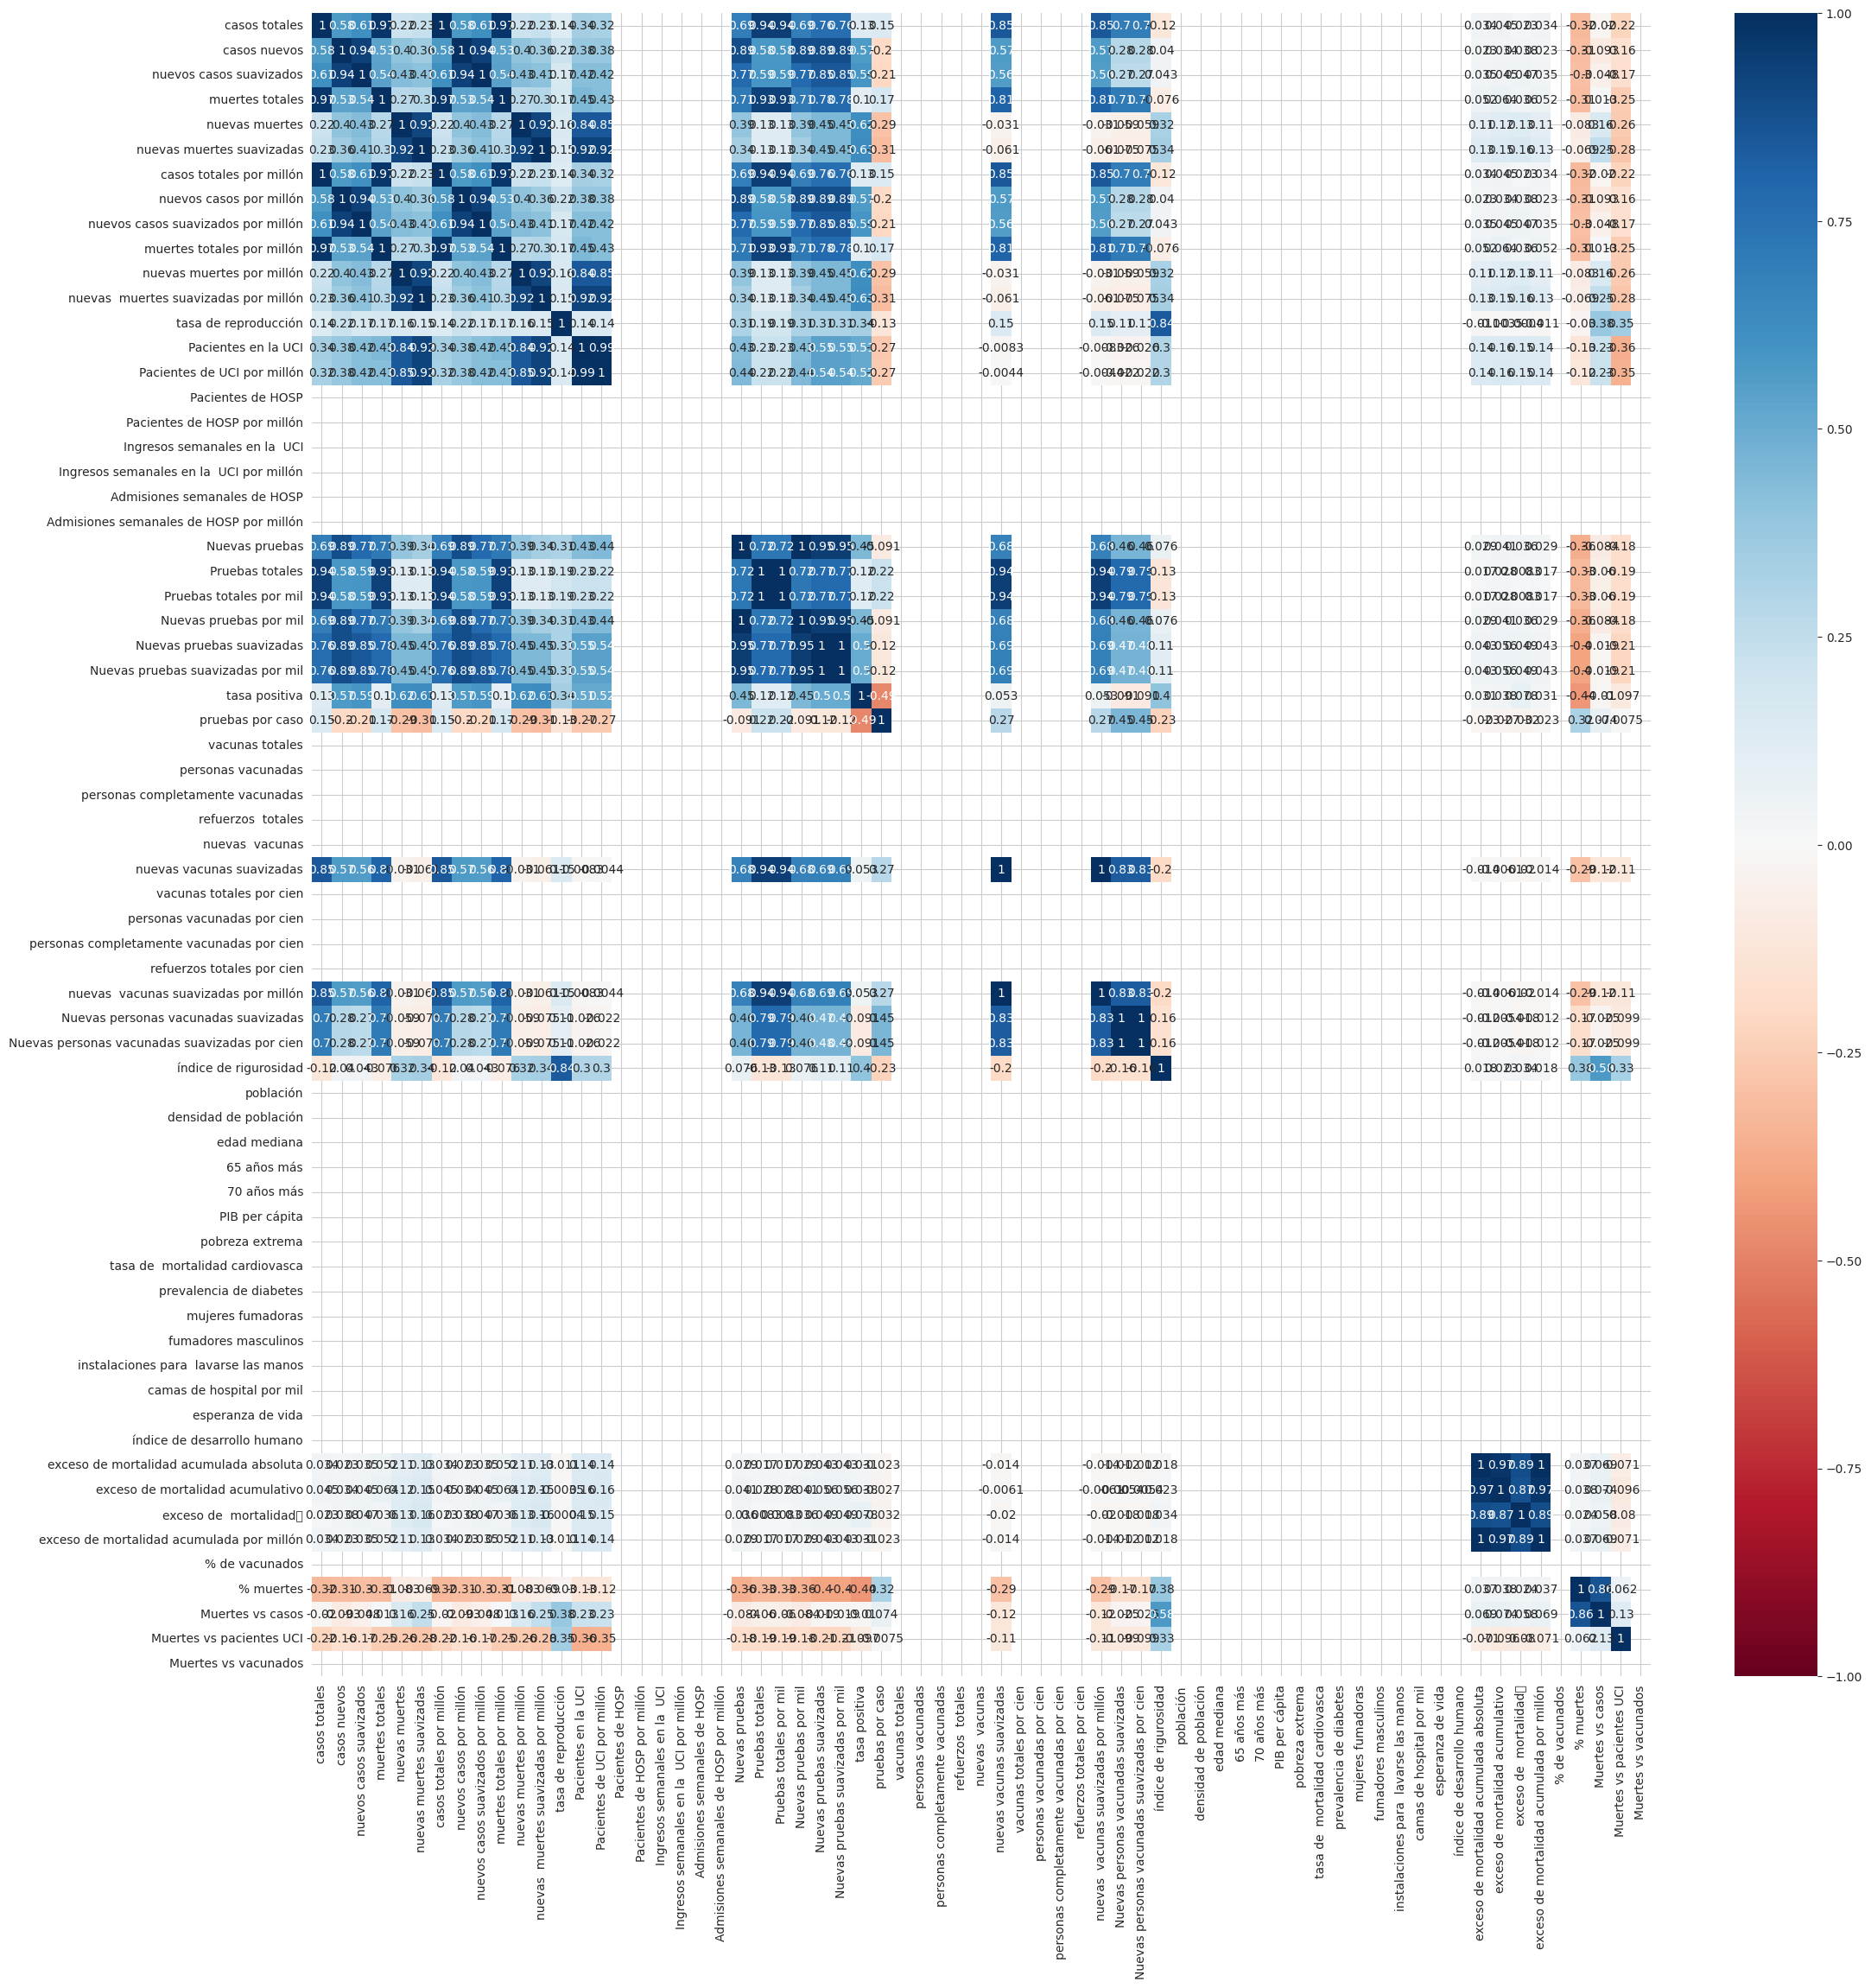

In [ ]:
plt.figure(figsize=(25, 25))
sns.heatmap(Sinvacunas,annot=True , cmap='RdBu' , vmin=-1 , vmax=1)

In [ ]:
from sklearn.model_selection import train_test_split

train_set1, test_set1 = train_test_split(covid_arg, test_size=0.15)

print(len(train_set1), len(test_set1))

669 119


In [ ]:
predictor1 = train_set1['Pacientes en la UCI'].values.reshape(train_set1.shape[0],1)
predictando1 = train_set1['nuevas muertes suavizadas'].values.reshape(train_set1.shape[0],1)
predictor_test1 = test_set1['Pacientes en la UCI'].values.reshape(test_set1.shape[0],1)
predictando_test_real1=test_set1['nuevas muertes suavizadas'].values.reshape(test_set1.shape[0],1)

Hago la regresion lineal de los dos dataset mas pequeños, el sin vacunas y con vacunas. luego a graficarlos

In [ ]:
lin_reg_1 = LinearRegression()

In [ ]:
lin_reg_1.fit(predictor1, predictando1)
predictando_test1 = lin_reg_1.predict(predictor_test1)

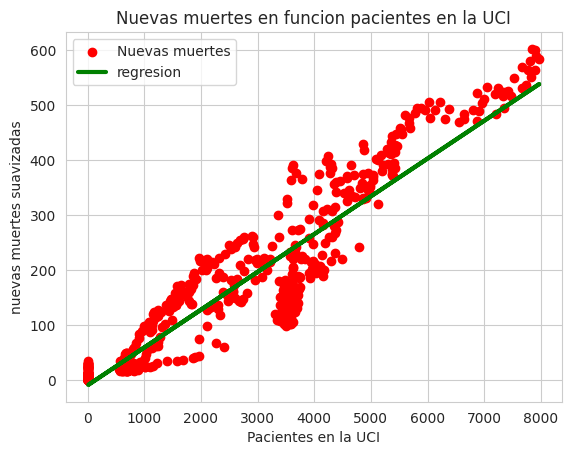

In [ ]:
plt.scatter(predictor1, predictando1, color="red", label='Nuevas muertes')
plt.plot(predictor1, lin_reg_1.predict(predictor1), color="green", linewidth=3, label='regresion')
plt.title('Nuevas muertes en funcion pacientes en la UCI')
plt.ylabel('nuevas muertes suavizadas')
plt.xlabel('Pacientes en la UCI')
plt.legend()
plt.show()

In [ ]:
r2 = lin_reg_1.score(predictor1, predictando1)
print("Coeficiente de Determinación (R^2):", r2)
coeficientes = lin_reg_1.coef_
intercepto = lin_reg_1.intercept_
print("Coeficientes (Pendiente):", coeficientes)
print("Intercepto:", intercepto)

Coeficiente de Determinación (R^2): 0.873691904719135
Coeficientes (Pendiente): [[0.06879983]]
Intercepto: [-9.92970862]


# Conclusion inicial:
  En la primer etapa de eventos, en el caso del dataset sin vacunas podemos lograr predecir aproximadamente las muertes cuando logre hacer bien la regresion lineal ya que graficamente se ve una tendencia pero la linea de regresion me esta mostrando otra cosa.
  Respecto a la segunda etapa (con vacunas) tenemos que revisar si existe algun evento que pueda subdividir nuevamente este dataset con vacunacion para predecir las muertes siguientes y en este segundo caso voy a investigar fechas de apertura de cuarentena para la argentinas y armar dataset tenga condiciones similares de movimiento de personas o estaciones de años.


Con los valores de "Argentina sin vacunas" vamos a utilizar el metodo stepwise

In [ ]:
import scipy
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sbn

In [ ]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)
import statsmodels.api as sm

In [ ]:
Argentina_sin_vacunas_num = Argentina_sin_vacunas.select_dtypes(include=['number'])


In [ ]:
x2=Argentina_sin_vacunas_num.drop('nuevas muertes',1)
y2=Argentina_sin_vacunas_num['nuevas muertes']
y2 = y2.loc[x2.index]

In [ ]:
infinite_values = np.isinf(x2).sum()
infinite_values

casos totales                  0
casos nuevos                   0
nuevos casos suavizados        0
muertes totales                0
nuevas muertes suavizadas      0
                            ... 
% de vacunados                 0
% muertes                      0
Muertes vs casos               5
Muertes vs pacientes UCI       0
Muertes vs vacunados         325
Length: 66, dtype: int64

In [ ]:
x2 = x2.replace([np.inf, -np.inf], 0)
x2 = x2.fillna(0)

In [ ]:
x2.describe()

casos totales   casos nuevos  nuevos casos suavizados  muertes totales  \
count   3.980000e+02     398.000000               398.000000       398.000000   
mean    7.899367e+05    5778.020101              5659.642126     17882.969849   
std     1.491792e+06   11516.768003             10926.564397     29305.574962   
min     0.000000e+00       0.000000                 0.000000         0.000000   
25%     1.840000e+03      92.000000                97.106750        74.500000   
50%     1.209125e+05    2865.500000              2766.357500      2199.000000   
75%     1.180732e+06    8294.000000              8734.821750     31502.250000   
max     8.934328e+06  110533.000000            114018.143000    126708.000000   

       nuevas muertes suavizadas  casos totales por millón  \
count                 398.000000                398.000000   
mean                  103.411693              17320.962143   
std                   118.680174              32710.564556   
min                     0.000000                  0.000000   
25%                     5.250000                 40.345750   
50%                    35.000000               2651.251500   
75%                   183.035750              25889.928250   
max                   407.143000             195903.229000   

       nuevos casos por millón  nuevos casos suavizados por millón  \
count               398.000000                          398.000000   
mean                126.694807                          124.099123   
std                 252.528451                          239.587083   
min                   0.000000                            0.000000   
25%                   2.017000                            2.129750   
50%                  62.831500                           60.658000   
75%                 181.862750                          191.528750   
max                2423.660000                         2500.079000   

       muertes totales por millón  nuevas muertes por millón  ...  \
count                  398.000000                 398.000000  ...   
mean                   392.120332                   2.306721  ...   
std                    642.584039                   2.803438  ...   
min                      0.000000                   0.000000  ...   
25%                      1.633750                   0.088000  ...   
50%                     48.217500                   0.910000  ...   
75%                    690.750500                   3.996500  ...   
max                   2778.329000                  10.613000  ...   

       índice de desarrollo humano  exceso de mortalidad acumulada absoluta  \
count                      398.000                               398.000000   
mean                         0.845                               126.368342   
std                          0.000                              2271.715591   
min                          0.845                             -7413.600000   
25%                          0.845                                 0.000000   
50%                          0.845                                 0.000000   
75%                          0.845                                 0.000000   
max                          0.845                             35026.500000   

       exceso de mortalidad acumulativo  exceso de  mortalidad\t  \
count                        398.000000               398.000000   
mean                           0.020226                 0.317714   
std                            0.813231                 3.939424   
min                           -4.510000               -12.660000   
25%                            0.000000                 0.000000   
50%                            0.000000                 0.000000   
75%                            0.000000                 0.000000   
max                           11.200000                51.960000   

       exceso de mortalidad acumulada por millón  % de vacunados   % muertes  \
count                                 398.000000           3

In [ ]:
y2 = y2.fillna(0)

In [ ]:
def stepwise_selection(data, target, SL_in=0.25, SL_out=0.25):
    initial_features = data.columns.tolist()
    best_features = []

    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features)

        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]

        min_p_value = new_pval.min()

        if min_p_value < SL_in:
            best_features.append(new_pval.idxmin())

            while len(best_features) > 0:
                best_features_with_constant = sm.add_constant(data[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()

                if max_p_value >= SL_out:
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break

    return best_features

selected_features = stepwise_selection(x2 , y2)
print(selected_features)

['nuevas muertes por millón', '% muertes', 'nuevas  muertes suavizadas por millón', 'Pacientes de UCI por millón', 'Nuevas personas vacunadas suavizadas', 'nuevas muertes suavizadas']


Con los selected_features tengo que ver cuales tienen correlacion marcada

In [ ]:
selected_features

['nuevas muertes por millón',
 '% muertes',
 'nuevas  muertes suavizadas por millón',
 'Pacientes de UCI por millón',
 'Nuevas personas vacunadas suavizadas',
 'nuevas muertes suavizadas']

In [ ]:
correlacion_sin_vacunas_arg = Argentina_sin_vacunas_num[selected_features]
correlacion_sin_vacunas_arg.head()

nuevas muertes por millón  % muertes  \
5854                        0.0        NaN   
5855                        0.0        NaN   
5856                        0.0        NaN   
5857                        0.0        NaN   
5858                        0.0        NaN   

      nuevas  muertes suavizadas por millón  Pacientes de UCI por millón  \
5854                                    0.0                          0.0   
5855                                    0.0                          0.0   
5856                                    0.0                          0.0   
5857                                    0.0                          0.0   
5858                                    0.0                          0.0   

      Nuevas personas vacunadas suavizadas  nuevas muertes suavizadas  
5854                                   0.0                        0.0  
5855                                   0.0                        0.0  
5856                                   0.0                        0.0  
5857                                   0.0                        0.0  
5858                                   0.0                        0.0

In [ ]:
Grafico=correlacion_sin_vacunas_arg.corr()


<Axes: >

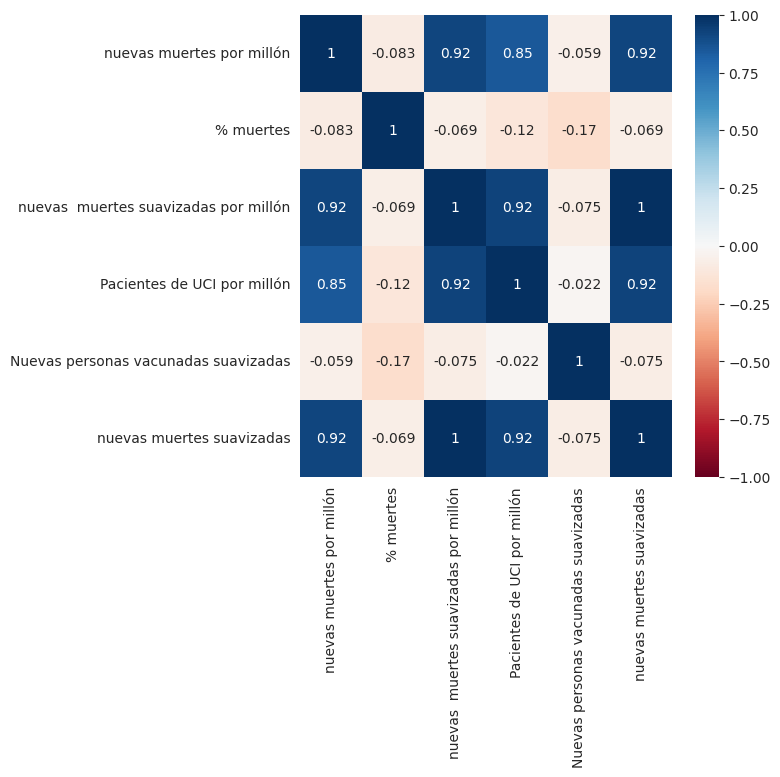

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(Grafico,annot=True , cmap='RdBu' , vmin=-1 , vmax=1)

Al correr la funcion stepwise se puede observar que las columnas con mas relacion son columnas que representan datos similares, por ejemplo: "nuevas muertes por millon", "nuevas muertes suavizadas por millon", "nuevas muertes suavizadas". Si se puede observar que los pacientes de alta complegidad "UCI" son proporcionales a la cantidad de muertes.

In [ ]:
correlacion_sin_vacunas_arg['nuevas muertes']=Argentina_sin_vacunas_num['nuevas muertes']
correlacion_sin_vacunas_arg['casos nuevos']=Argentina_sin_vacunas_num['casos nuevos']

correlacion_sin_vacunas_arg.fillna(0)

nuevas muertes por millón  % muertes  \
5854                      0.000   0.000000   
5855                      0.000   0.000000   
5856                      0.000   0.000000   
5857                      0.000   0.000000   
5858                      0.000   0.000000   
...                         ...        ...   
6608                      6.052   0.001632   
6610                      6.929   0.002035   
6621                      2.193   0.006659   
6635                      2.039   0.012877   
6648                      1.842   0.016192   

      nuevas  muertes suavizadas por millón  Pacientes de UCI por millón  \
5854                                  0.000                        0.000   
5855                                  0.000                        0.000   
5856                                  0.000                        0.000   
5857                                  0.000                        0.000   
5858                                  0.000                        0.000   
...                                     ...                          ...   
6608                                  3.800                       56.835   
6610                                  4.357                       60.409   
6621                                  5.313                       56.944   
6635                                  3.750                       34.469   
6648                                  2.067                        0.000   

      Nuevas personas vacunadas suavizadas  nuevas muertes suavizadas  \
5854                                   0.0                      0.000   
5855                                   0.0                      0.000   
5856                                   0.0                      0.000   
5857                                   0.0                      0.000   
5858                                   0.0                      0.000   
...                                    ...                        ...   
6608                               49830.0                    173.286   
6610                               50323.0                    198.714   
6621                               30598.0                    242.286   
6635                               23447.0                    171.000   
6648                                   0.0                     94.286   

      nuevas muertes  casos nuevos  
5854             0.0           0.0  
5855             0.0           0.0  
5856             0.0           0.0  
5857             0.0           0.0  
5858             0.0           0.0  
...              ...           ...  
6608           276.0       78121.0  
6610           316.0       88503.0  
6621           100.0       12664.0  
6635            93.0        4450.0  
6648            84.0        4430.0  

[398 rows x 8 columns]

<Axes: >

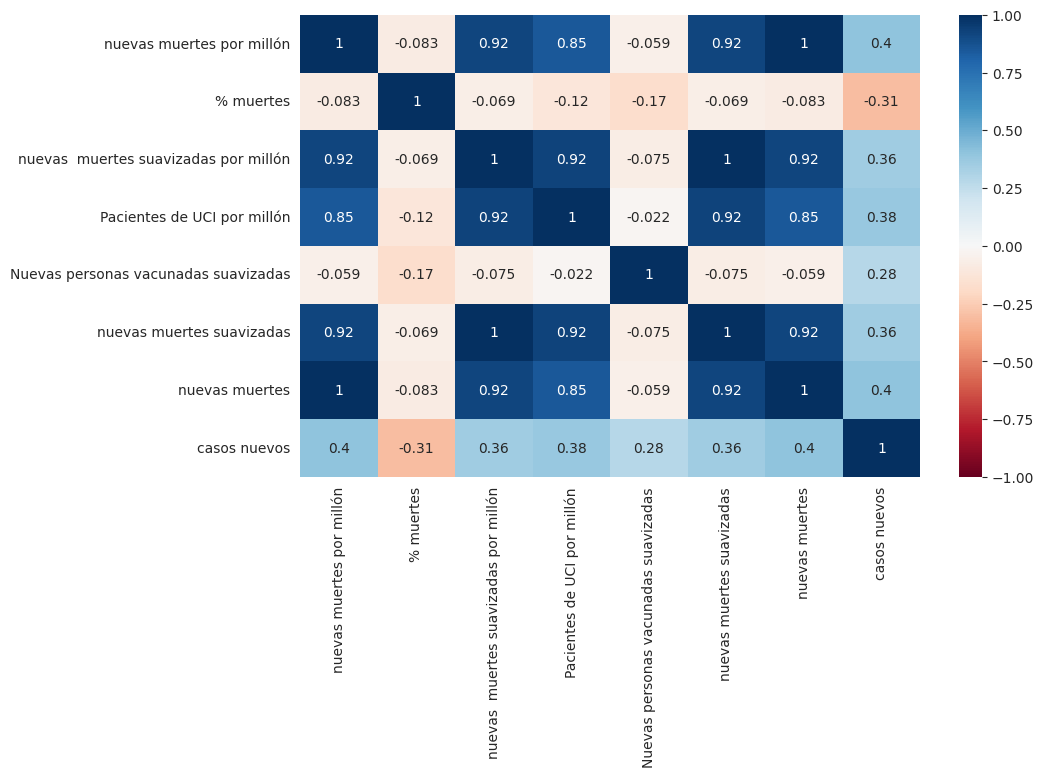

In [ ]:
Grafico1=correlacion_sin_vacunas_arg.corr()
plt.figure(figsize=(10, 6))
sbn.heatmap(Grafico1,annot=True , cmap='RdBu' , vmin=-1 , vmax=1)

Conclusion: Las nuevas muertes suavizadas por millon son las que mas se correlacionan con los pacientes en la UCI. Tienen un valor de R2 de 0.92 el resto de los features son dependientes uno del otro como por ejemplo "nuevas muertes", "nuevas muertes suavizadas" y "nuevas muertes suavizadas por millon".

# Algoritmo de regresion e Hypertuning

Conociendo los valores que son mas correlacionables entre si vamos a generar los subset necesarios para trabajar en el algoritmo, lo realizaremos tanto para argentina como para algunos paises mas.

In [ ]:
covid['ubicación'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Asia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethi

In [ ]:
Paises_a_graficar = ['France', 'Germany', 'Italy', 'Spain', 'Argentina','United States']

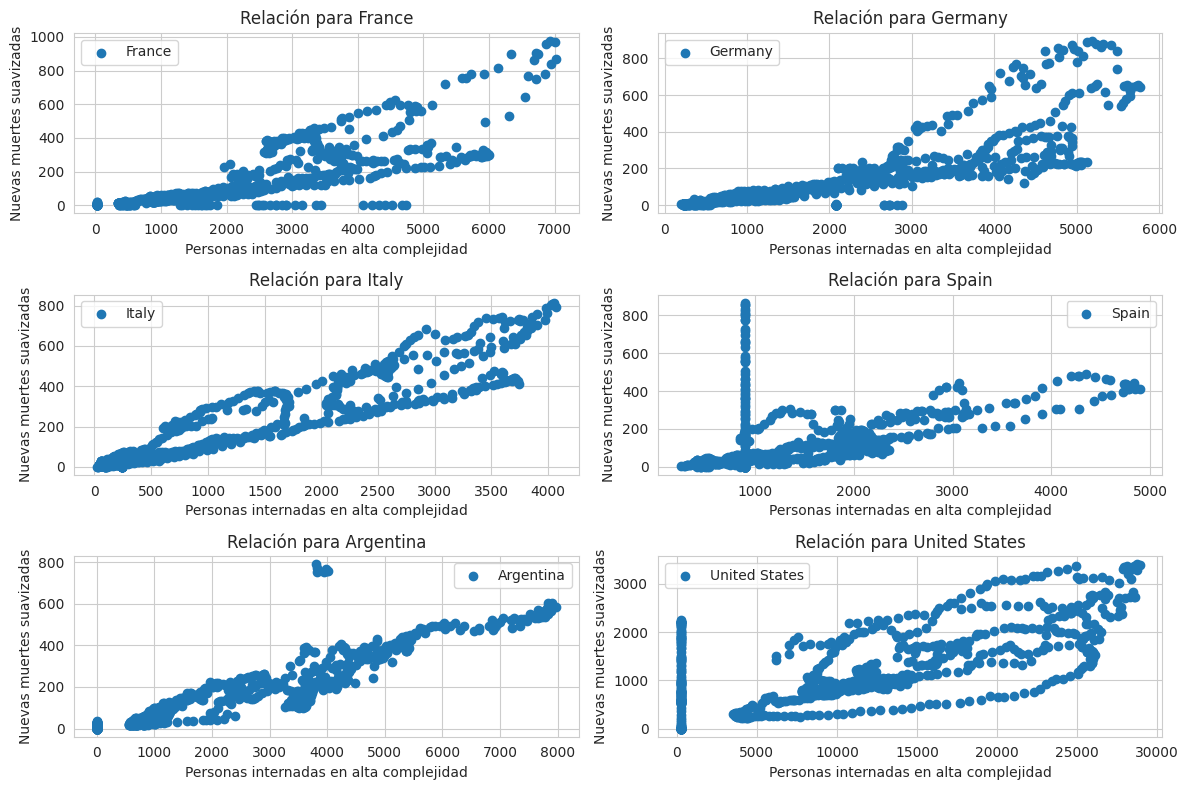

In [ ]:
num_paises = len(Paises_a_graficar)
num_filas = (num_paises + 1) // 2

fig, axs = plt.subplots(num_filas, 2, figsize=(12, 8))

for i, pais in enumerate(Paises_a_graficar):
    row = i // 2
    col = i % 2
    data_pais = covid[covid['ubicación'] == pais]

    axs[row, col].scatter(x=data_pais['Pacientes en la UCI'], y=data_pais['nuevas muertes suavizadas'], label=pais)
    axs[row, col].set_title(f'Relación para {pais}')
    axs[row, col].set_xlabel('Personas internadas en alta complejidad')
    axs[row, col].set_ylabel('Nuevas muertes suavizadas')
    axs[row, col].legend()


plt.tight_layout()
plt.show()


Vamos a graficar lo mismo pero por continente

In [ ]:
covid['Continente'].unique()

array(['Asia', 0, 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
Continentes_a_graficar = ['Asia', 'Europe', 'Africa', 'North America', 'South America','Oceania']

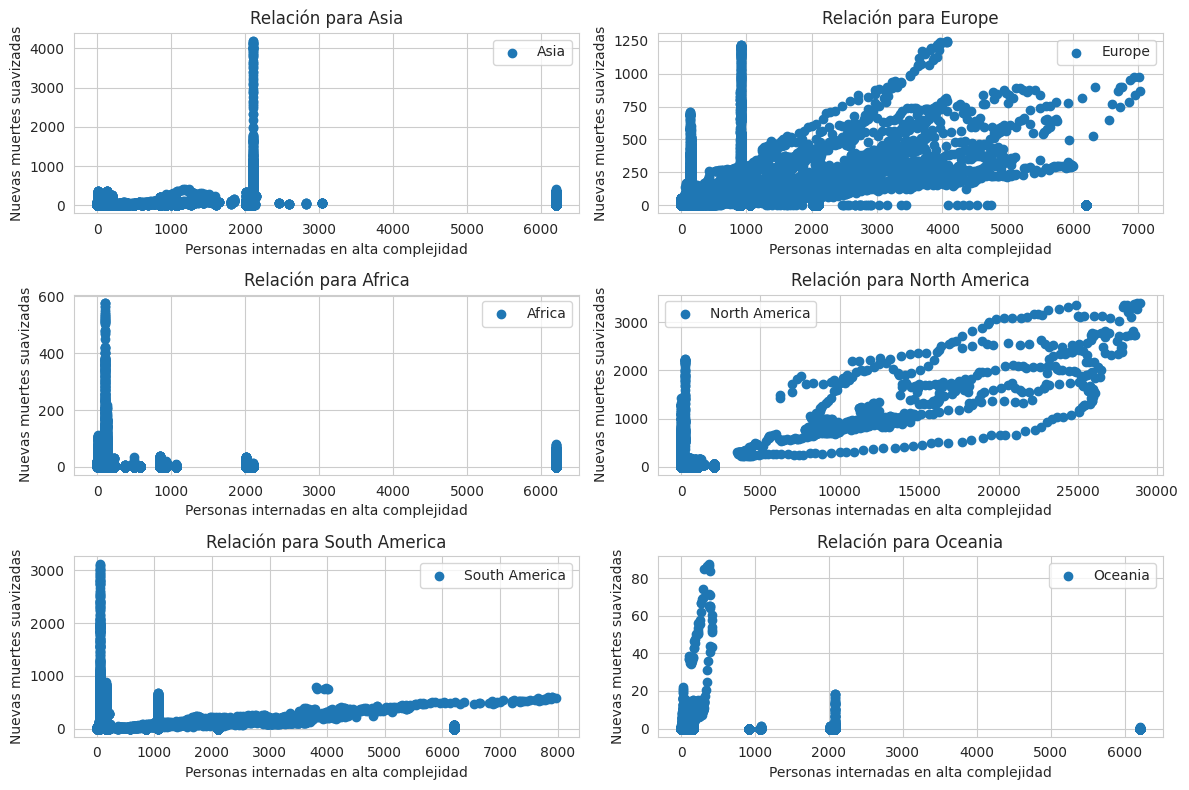

In [ ]:
import matplotlib.pyplot as plt

num_continentes = len(Continentes_a_graficar)
num_filas = (num_continentes + 1) // 2

fig, axs = plt.subplots(num_filas, 2, figsize=(12, 8))

for i, cont in enumerate(Continentes_a_graficar):
    row = i // 2
    col = i % 2
    data_cont = covid[covid['Continente'] == cont]


    axs[row, col].scatter(x=data_cont['Pacientes en la UCI'], y=data_cont['nuevas muertes suavizadas'], label=cont)
    axs[row, col].set_title(f'Relación para {cont}')
    axs[row, col].set_xlabel('Personas internadas en alta complejidad')
    axs[row, col].set_ylabel('Nuevas muertes suavizadas')
    axs[row, col].legend()


plt.tight_layout()
plt.show()


In [ ]:
resumendedatos=covid.groupby(covid['Continente']).count()
print(resumendedatos['Código ISO'])

Continente
0                 9956
Africa           39417
Asia             36200
Europe           37088
North America    24931
Oceania           9217
South America     9517
Name: Código ISO, dtype: int64


In [ ]:
covid_arg.shape

(788, 73)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()

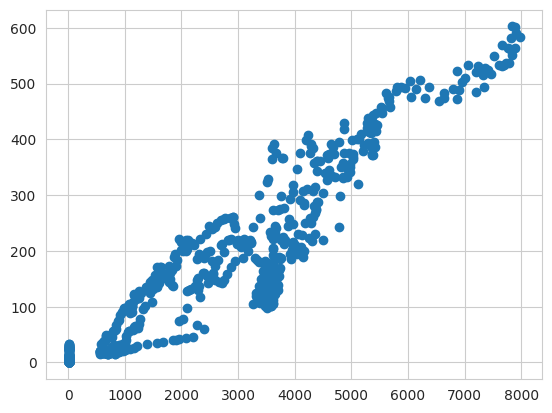

In [ ]:
X = covid_arg['Pacientes en la UCI'].values.reshape(-1,1)
Y = covid_arg['nuevas muertes suavizadas'].values
plt.scatter(x=X, y=Y)

In [ ]:
data_scaler = covid_arg[['Pacientes en la UCI','nuevas muertes suavizadas']]

In [ ]:
scaler1=StandardScaler()

In [ ]:
scaled_data = scaler1.fit_transform(data_scaler)

In [ ]:
covid_arg_scaler = pd.DataFrame(scaled_data, columns=["scaled_muertes", "scaled_uci_pacientes"])
covid_arg_scaler

scaled_muertes  scaled_uci_pacientes
0         -1.148929             -1.011134
1         -1.148929             -1.011134
2         -1.148929             -1.011134
3         -1.148929             -1.011134
4         -1.148929             -1.011134
..              ...                   ...
783       -0.605467             -0.410300
784       -0.622375             -0.432869
785       -0.634452             -0.391496
786       -0.634452             -0.384914
787       -0.634452             -0.390554

[788 rows x 2 columns]

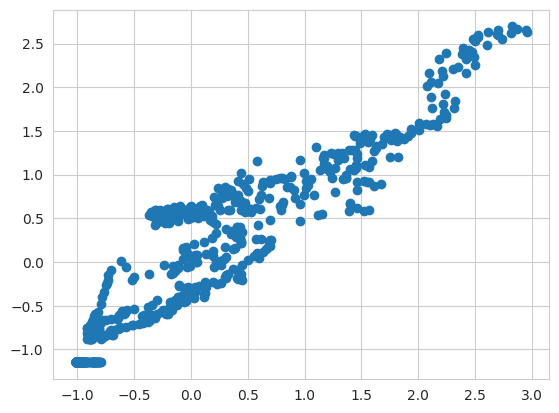

In [ ]:
plt.scatter(x=covid_arg_scaler['scaled_uci_pacientes'], y=covid_arg_scaler['scaled_muertes'], )

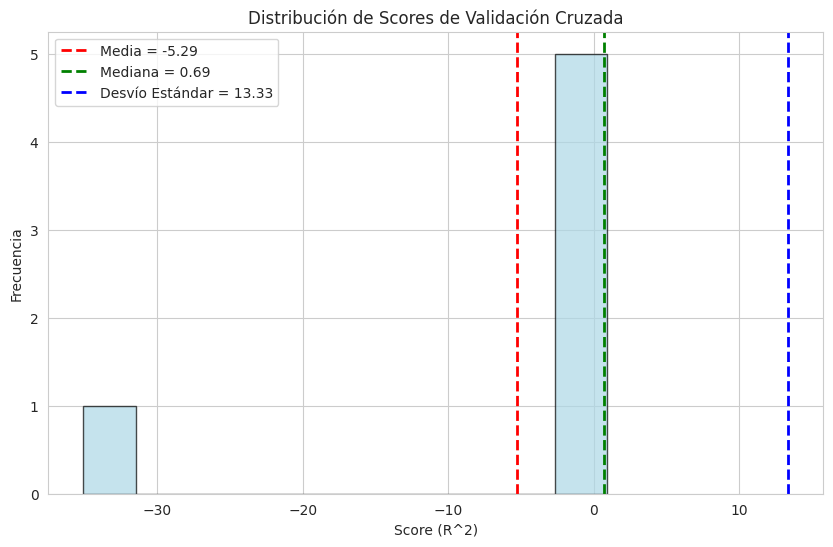

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score

lasso_model = Lasso()

num_regressors = 6
cross_val_scores = cross_val_score(lasso_model, X, Y, cv=num_regressors, scoring='r2')

plt.figure(figsize=(10, 6))
plt.hist(cross_val_scores, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Score (R^2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Scores de Validación Cruzada')
plt.axvline(np.mean(cross_val_scores), color='r', linestyle='dashed', linewidth=2, label=f'Media = {np.mean(cross_val_scores):.2f}')
plt.axvline(np.median(cross_val_scores), color='g', linestyle='dashed', linewidth=2, label=f'Mediana = {np.median(cross_val_scores):.2f}')
plt.axvline(np.std(cross_val_scores), color='b', linestyle='dashed', linewidth=2, label=f'Desvío Estándar = {np.std(cross_val_scores):.2f}')
plt.legend()
plt.show()

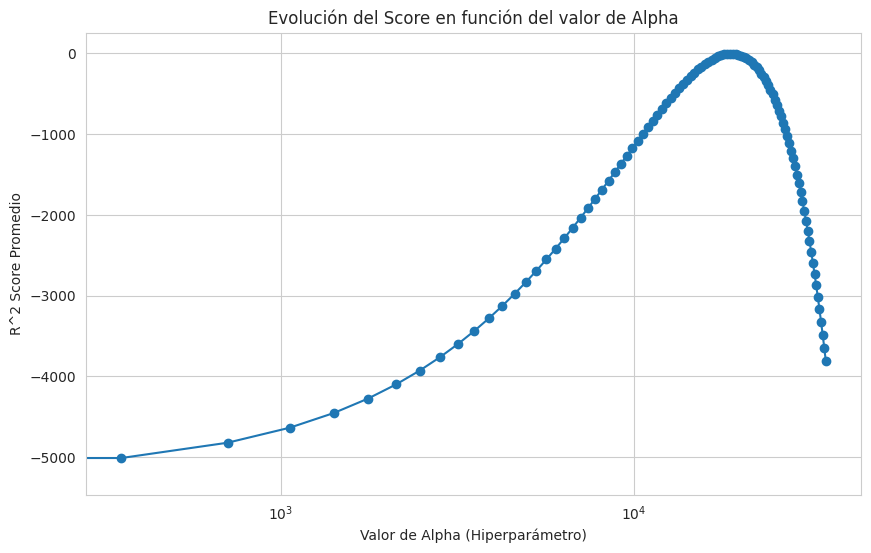

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': np.linspace(0, 35000, 100)}

grid_search = GridSearchCV(lasso_model, parameters, cv=10, scoring='r2')

grid_search.fit(X, Y)

results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
plt.semilogx(parameters['alpha'], results_df['mean_test_score'], marker='o')
plt.xlabel('Valor de Alpha (Hiperparámetro)')
plt.ylabel('R^2 Score Promedio')
plt.title('Evolución del Score en función del valor de Alpha')
plt.grid(True)
plt.show()


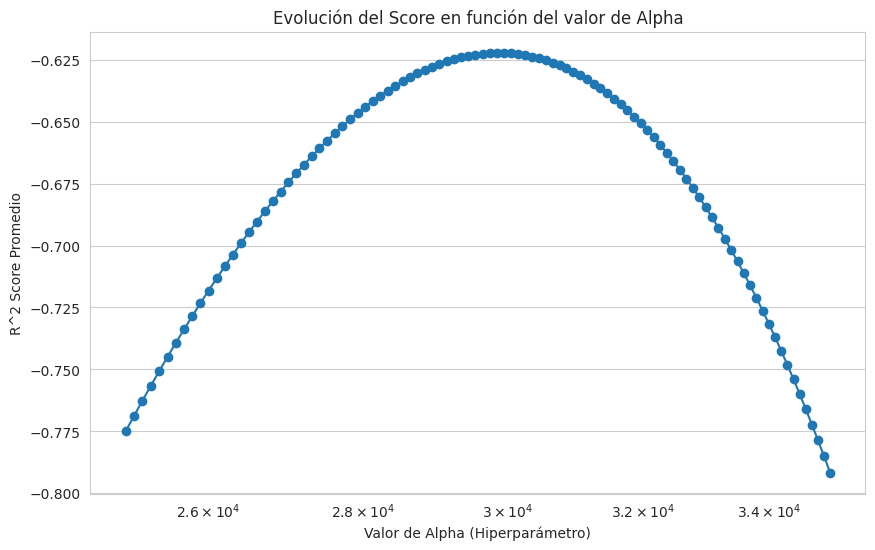

In [ ]:
parameters = {'alpha': np.linspace(25000, 35000, 100)}

grid_search = GridSearchCV(lasso_model, parameters, cv=5, scoring='r2')

grid_search.fit(X, Y)

results_df = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(10, 6))
plt.semilogx(parameters['alpha'], results_df['mean_test_score'], marker='o')
plt.xlabel('Valor de Alpha (Hiperparámetro)')
plt.ylabel('R^2 Score Promedio')
plt.title('Evolución del Score en función del valor de Alpha')
plt.grid(True)
plt.show()


In [ ]:
best_params = grid_search.best_params_
best_params

{'alpha': 29848.484848484848}

In [ ]:
best_score = grid_search.best_score_
best_score

-0.6221259139069766

Vamos a utilizar el mejor valor de alpha para el "lasso model"

In [ ]:
lasso_model = Lasso(alpha=29848)

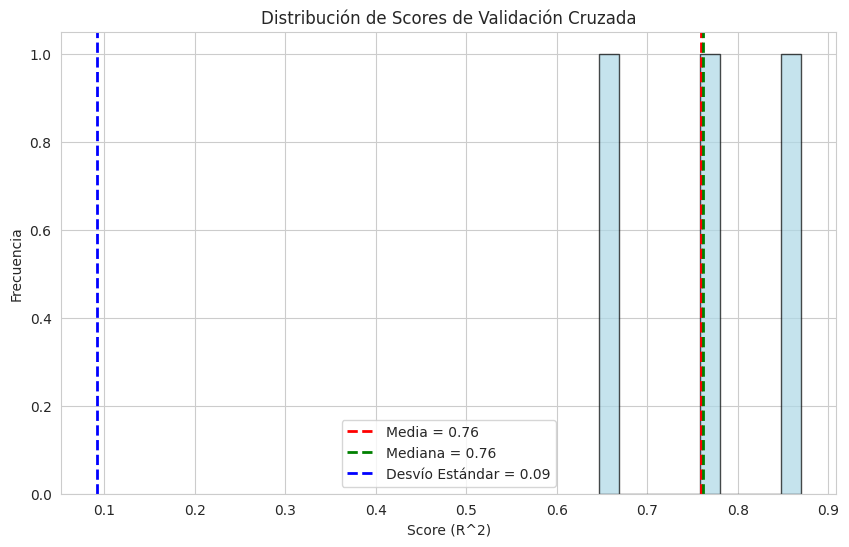

In [ ]:
num_regressors = 3
cross_val_scores = cross_val_score(lasso_model, X, Y, cv=num_regressors, scoring='r2')

plt.figure(figsize=(10, 6))
plt.hist(cross_val_scores, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Score (R^2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Scores de Validación Cruzada')
plt.axvline(np.mean(cross_val_scores), color='r', linestyle='dashed', linewidth=2, label=f'Media = {np.mean(cross_val_scores):.2f}')
plt.axvline(np.median(cross_val_scores), color='g', linestyle='dashed', linewidth=2, label=f'Mediana = {np.median(cross_val_scores):.2f}')
plt.axvline(np.std(cross_val_scores), color='b', linestyle='dashed', linewidth=2, label=f'Desvío Estándar = {np.std(cross_val_scores):.2f}')
plt.legend()
plt.show()

In [ ]:
cv_results = grid_search.cv_results_
results_df = pd.DataFrame(cv_results)
results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.001567      0.000807         0.001117        0.000721   
1        0.001227      0.000056         0.000803        0.000094   
2        0.001235      0.000070         0.000760        0.000050   
3        0.001202      0.000018         0.000728        0.000023   
4        0.001162      0.000009         0.000706        0.000012   
..            ...           ...              ...             ...   
95       0.000999      0.000075         0.000624        0.000065   
96       0.000954      0.000018         0.000589        0.000002   
97       0.000941      0.000009         0.000595        0.000013   
98       0.000962      0.000025         0.000597        0.000022   
99       0.000981      0.000054         0.000606        0.000030   

     param_alpha                         params  split0_test_score  \
0        25000.0             {'alpha': 25000.0}          -0.680604   
1   25101.010101  {'alpha': 25101.010101010103}          -0.651074   
2   25202.020202    {'alpha': 25202.0202020202}          -0.622199   
3   25303.030303  {'alpha': 25303.030303030304}          -0.593978   
4   25404.040404  {'alpha': 25404.040404040403}          -0.566413   
..           ...                            ...                ...   
95  34595.959596    {'alpha': 34595.9595959596}          -0.799437   
96  34696.969697  {'alpha': 34696.969696969696}          -0.832124   
97  34797.979798    {'alpha': 34797.9797979798}          -0.865465   
98  34898.989899    {'alpha': 34898.9898989899}          -0.899462   
99       35000.0             {'alpha': 35000.0}          -0.934114   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.761163          -5.013681           0.387627   
1            0.761106          -5.010247           0.386350   
2            0.761049          -5.006815           0.385072   
3            0.760992          -5.003384           0.383791   
4            0.760934          -4.999954           0.382510   
..                ...                ...                ...   
95           0.754979          -4.692687           0.259844   
96           0.754905          -4.689364           0.258429   
97           0.754832          -4.686042           0.257014   
98           0.754758          -4.682721           0.255596   
99           0.754685          -4.679401           0.254178   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
0            0.670068        -0.775085        2.180598               97  
1            0.669836        -0.768806        2.179376               95  
2            0.669605        -0.762658        2.178208               93  
3            0.669372        -0.756641        2.177090               91  
4            0.669140        -0.750757        2.176018               89  
..                ...              ...             ...              ...  
95           0.646405        -0.766179        2.038657               94  
96           0.646138        -0.772403        2.037336               96  
97           0.645870        -0.778758        2.036108               98  
98           0.645602        -0.785245        2.034977               99  
99           0.645334        -0.791864        2.033949              100  

[100 rows x 14 columns]

Haciendo lo mismo para una "Linear Regression"

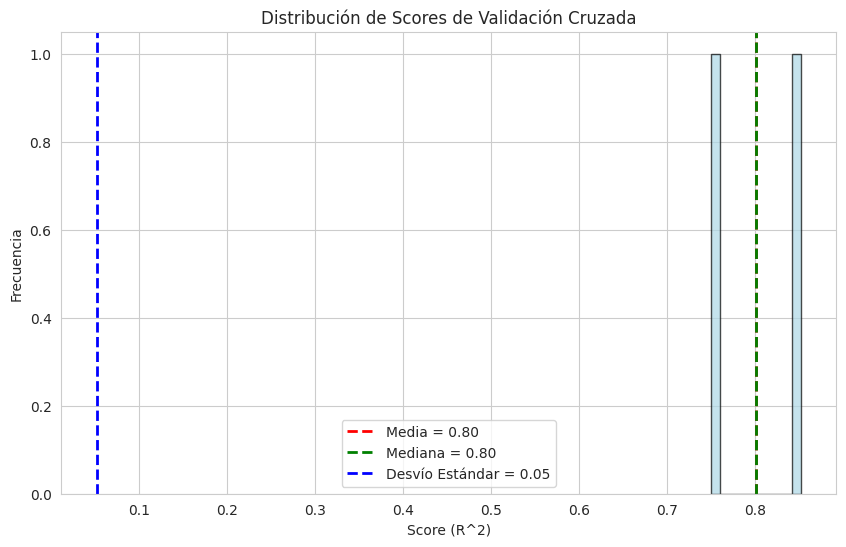

In [ ]:
regresion_lineal = LinearRegression()

num_regressors = 2
cross_val_scores = cross_val_score(regresion_lineal, X, Y, cv=num_regressors, scoring='r2')

plt.figure(figsize=(10, 6))
plt.hist(cross_val_scores, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Score (R^2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Scores de Validación Cruzada')
plt.axvline(np.mean(cross_val_scores), color='r', linestyle='dashed', linewidth=2, label=f'Media = {np.mean(cross_val_scores):.2f}')
plt.axvline(np.median(cross_val_scores), color='g', linestyle='dashed', linewidth=2, label=f'Mediana = {np.median(cross_val_scores):.2f}')
plt.axvline(np.std(cross_val_scores), color='b', linestyle='dashed', linewidth=2, label=f'Desvío Estándar = {np.std(cross_val_scores):.2f}')
plt.legend()
plt.show()

como linea regression no tiene hiperparametros a definir (salvo uno que varia entre dos valores) no le vamos a hacer gridsearch

Y utilizando Random Forest regresor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

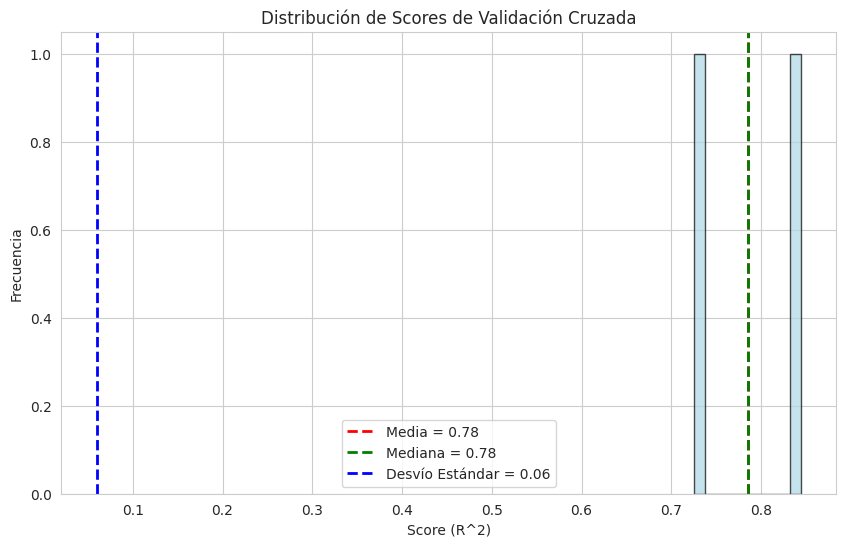

In [ ]:
Random_forest = RandomForestRegressor()

num_regressors = 2
cross_val_scores = cross_val_score(Random_forest, X, Y, cv=num_regressors, scoring='r2')

plt.figure(figsize=(10, 6))
plt.hist(cross_val_scores, bins=10, color='lightblue', edgecolor='black', alpha=0.7)
plt.xlabel('Score (R^2)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Scores de Validación Cruzada')
plt.axvline(np.mean(cross_val_scores), color='r', linestyle='dashed', linewidth=2, label=f'Media = {np.mean(cross_val_scores):.2f}')
plt.axvline(np.median(cross_val_scores), color='g', linestyle='dashed', linewidth=2, label=f'Mediana = {np.median(cross_val_scores):.2f}')
plt.axvline(np.std(cross_val_scores), color='b', linestyle='dashed', linewidth=2, label=f'Desvío Estándar = {np.std(cross_val_scores):.2f}')
plt.legend()
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto','log2']}

In [ ]:
grid_search1 = GridSearchCV(Random_forest, param_grid, cv=5, scoring='r2')
grid_search1.fit(X, Y)
results_df = pd.DataFrame(grid_search1.cv_results_)

In [ ]:
results_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0         0.090978      0.009687         0.001940        0.000227   
1         0.157845      0.102040         0.004675        0.002766   
2         0.176244      0.006535         0.006347        0.001444   
3         0.016468      0.000641         0.001230        0.000067   
4         0.082341      0.001785         0.002907        0.000129   
..             ...           ...              ...             ...   
211       0.076039      0.003562         0.002834        0.000216   
212       0.168314      0.036697         0.005952        0.001381   
213       0.025403      0.001835         0.001746        0.000115   
214       0.121540      0.003971         0.004257        0.000101   
215       0.238921      0.007900         0.008669        0.002427   

    param_max_depth param_max_features param_min_samples_leaf  \
0              None               auto                      1   
1              None               auto                      1   
2              None               auto                      1   
3              None               auto                      1   
4              None               auto                      1   
..              ...                ...                    ...   
211              30               log2                      4   
212              30               log2                      4   
213              30               log2                      4   
214              30               log2                      4   
215              30               log2                      4   

    param_min_samples_split param_n_estimators  \
0                         2                 10   
1                         2                 50   
2                         2                100   
3                         5                 10   
4                         5                 50   
..                      ...                ...   
211                       5                 50   
212                       5                100   
213                      10                 10   
214                      10                 50   
215                      10                100   

                                                params  split0_test_score  \
0    {'max_depth': None, 'max_features': 'auto', 'm...         -21.801969   
1    {'max_depth': None, 'max_features': 'auto', 'm...         -22.455940   
2    {'max_depth': None, 'max_features': 'auto', 'm...         -22.912008   
3    {'max_depth': None, 'max_features': 'auto', 'm...         -22.748114   
4    {'max_depth': None, 'max_features': 'auto', 'm...         -22.990783   
..                                                 ...                ...   
211  {'max_depth': 30, 'max_features': 'log2', 'min...         -22.655627   
212  {'max_depth': 30, 'max_features': 'log2', 'min...         -22.799824   
213  {'max_depth': 30, 'max_features': 'log2', 'min...         -22.883621   
214  {'max_depth': 30, 'max_features': 'log2', 'min...         -22.601730   
215  {'max_depth': 30, 'max_features': 'log2', 'min...         -23.015760   

     split1_test_score  split2_test_score  split3_test_score  \
0             0.686220          -4.558355           0.382436   
1             0.694545          -5.119327           0.426458   
2             0.695968          -4.916771           0.447852   
3             0.710431          -5.809334           0.425845   
4             0.712721          -5.765357           0.444081   
..                 ...                ...                ...   
211           0.720275          -5.463112           0.527104   
212           0.717641          -5.666813           0.536786   
213           0.718484          -4.622138           0.554795   
214           0.715326          -5.707797           0.540199   
215           0.720933          -5.308223           0.537739   

     split4_test_score  mean_test_score  std_test_score  rank_test_score  
0             0.540552   

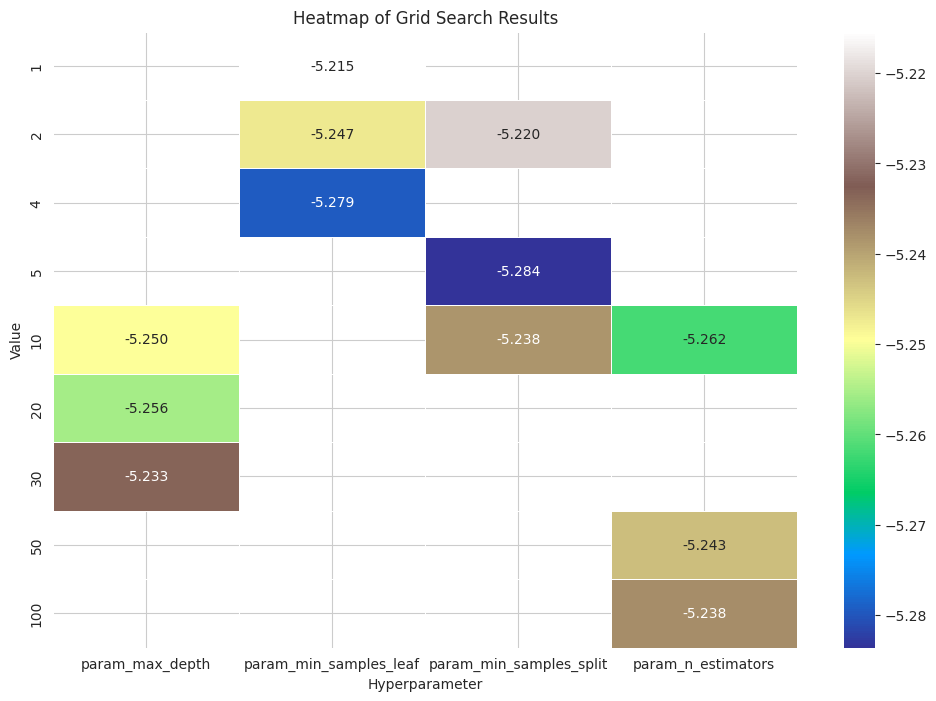

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# defino los parametros que quiero graficar en una variable
param_cols = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf']

#creo una copia que tenga las columnas param_cols y le sumo el mean_test_score
param_results = results_df[param_cols + ['mean_test_score']]

#utilizo melt para convertir las columnas en filas
param_results = param_results.melt(id_vars='mean_test_score', var_name='Hyperparameter', value_name='Value')
plt.figure(figsize=(12, 8))
sns.heatmap(data=param_results.pivot_table(index='Value', columns='Hyperparameter', values='mean_test_score'),
            annot=True, cmap='terrain', fmt=".3f", linewidths=.5)
plt.title('Heatmap of Grid Search Results')
plt.show()


In [ ]:
param_results

mean_test_score          Hyperparameter Value
0          -4.950223      param_n_estimators    10
1          -5.183026      param_n_estimators    50
2          -5.228444      param_n_estimators   100
3          -5.374487      param_n_estimators    10
4          -5.410139      param_n_estimators    50
..               ...                     ...   ...
859        -5.256460  param_min_samples_leaf     4
860        -5.325100  param_min_samples_leaf     4
861        -5.127626  param_min_samples_leaf     4
862        -5.293856  param_min_samples_leaf     4
863        -5.295709  param_min_samples_leaf     4

[864 rows x 3 columns]

Vamos a intentar conseguir mayor cantidad de datos teniendo en cuentas los valores de sudamerica totales y eliminando los outlier

In [ ]:
covid_sudamerica = covid[covid['Continente'] == 'South America']

In [ ]:
covid_sudamerica.shape

(9517, 67)

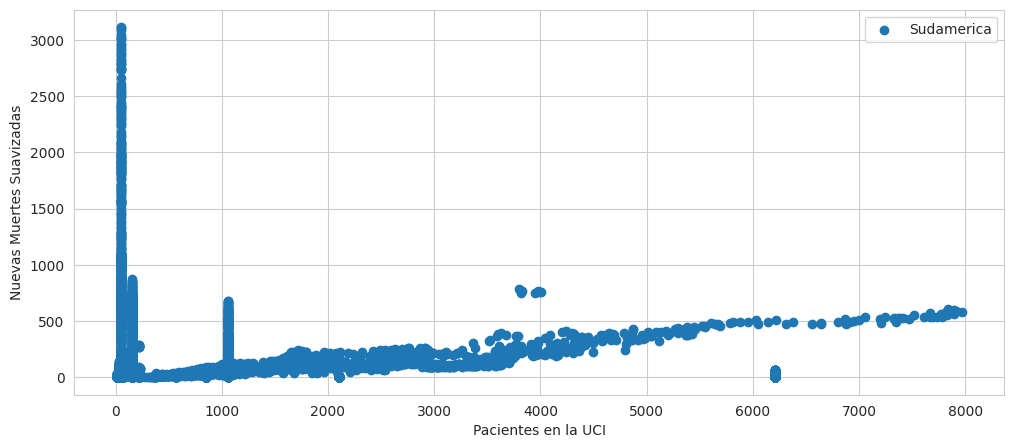

In [ ]:

x_sud = covid_sudamerica['Pacientes en la UCI']
y_sud = covid_sudamerica['nuevas muertes suavizadas']

plt.figure(figsize=(12,5))
plt.scatter(x_sud, y_sud, label='Sudamerica')

plt.xlabel('Pacientes en la UCI')
plt.ylabel('Nuevas Muertes Suavizadas')
plt.legend()

plt.show()

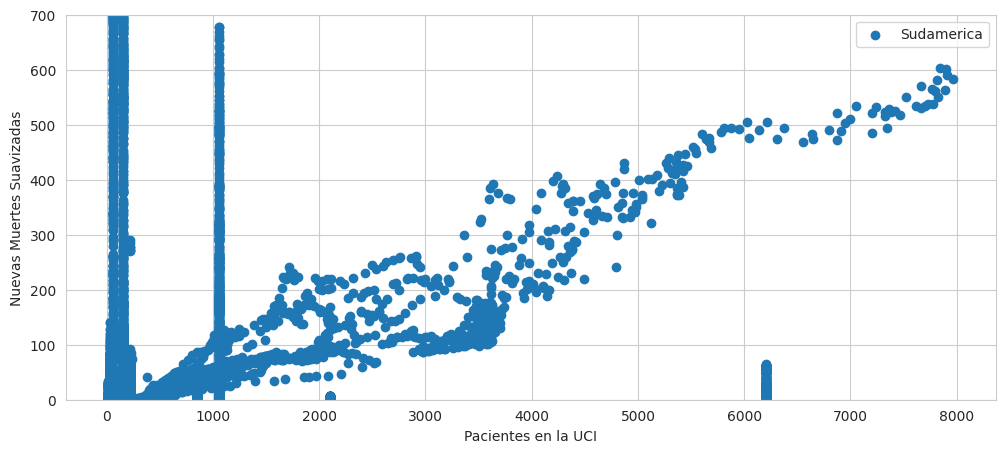

In [ ]:
x_sud = covid_sudamerica['Pacientes en la UCI']
y_sud = covid_sudamerica['nuevas muertes suavizadas']

plt.figure(figsize=(12,5))
plt.scatter(x_sud, y_sud, label='Sudamerica')

plt.xlabel('Pacientes en la UCI')
plt.ylabel('Nuevas Muertes Suavizadas')
plt.ylim(0,700)
plt.legend()

plt.show()

In [ ]:
paises_sudamerica = covid_sudamerica['ubicación'].unique()
paises_sudamerica

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Ecuador',
       'Falkland Islands', 'Guyana', 'Paraguay', 'Peru', 'Suriname',
       'Uruguay', 'Venezuela'], dtype=object)

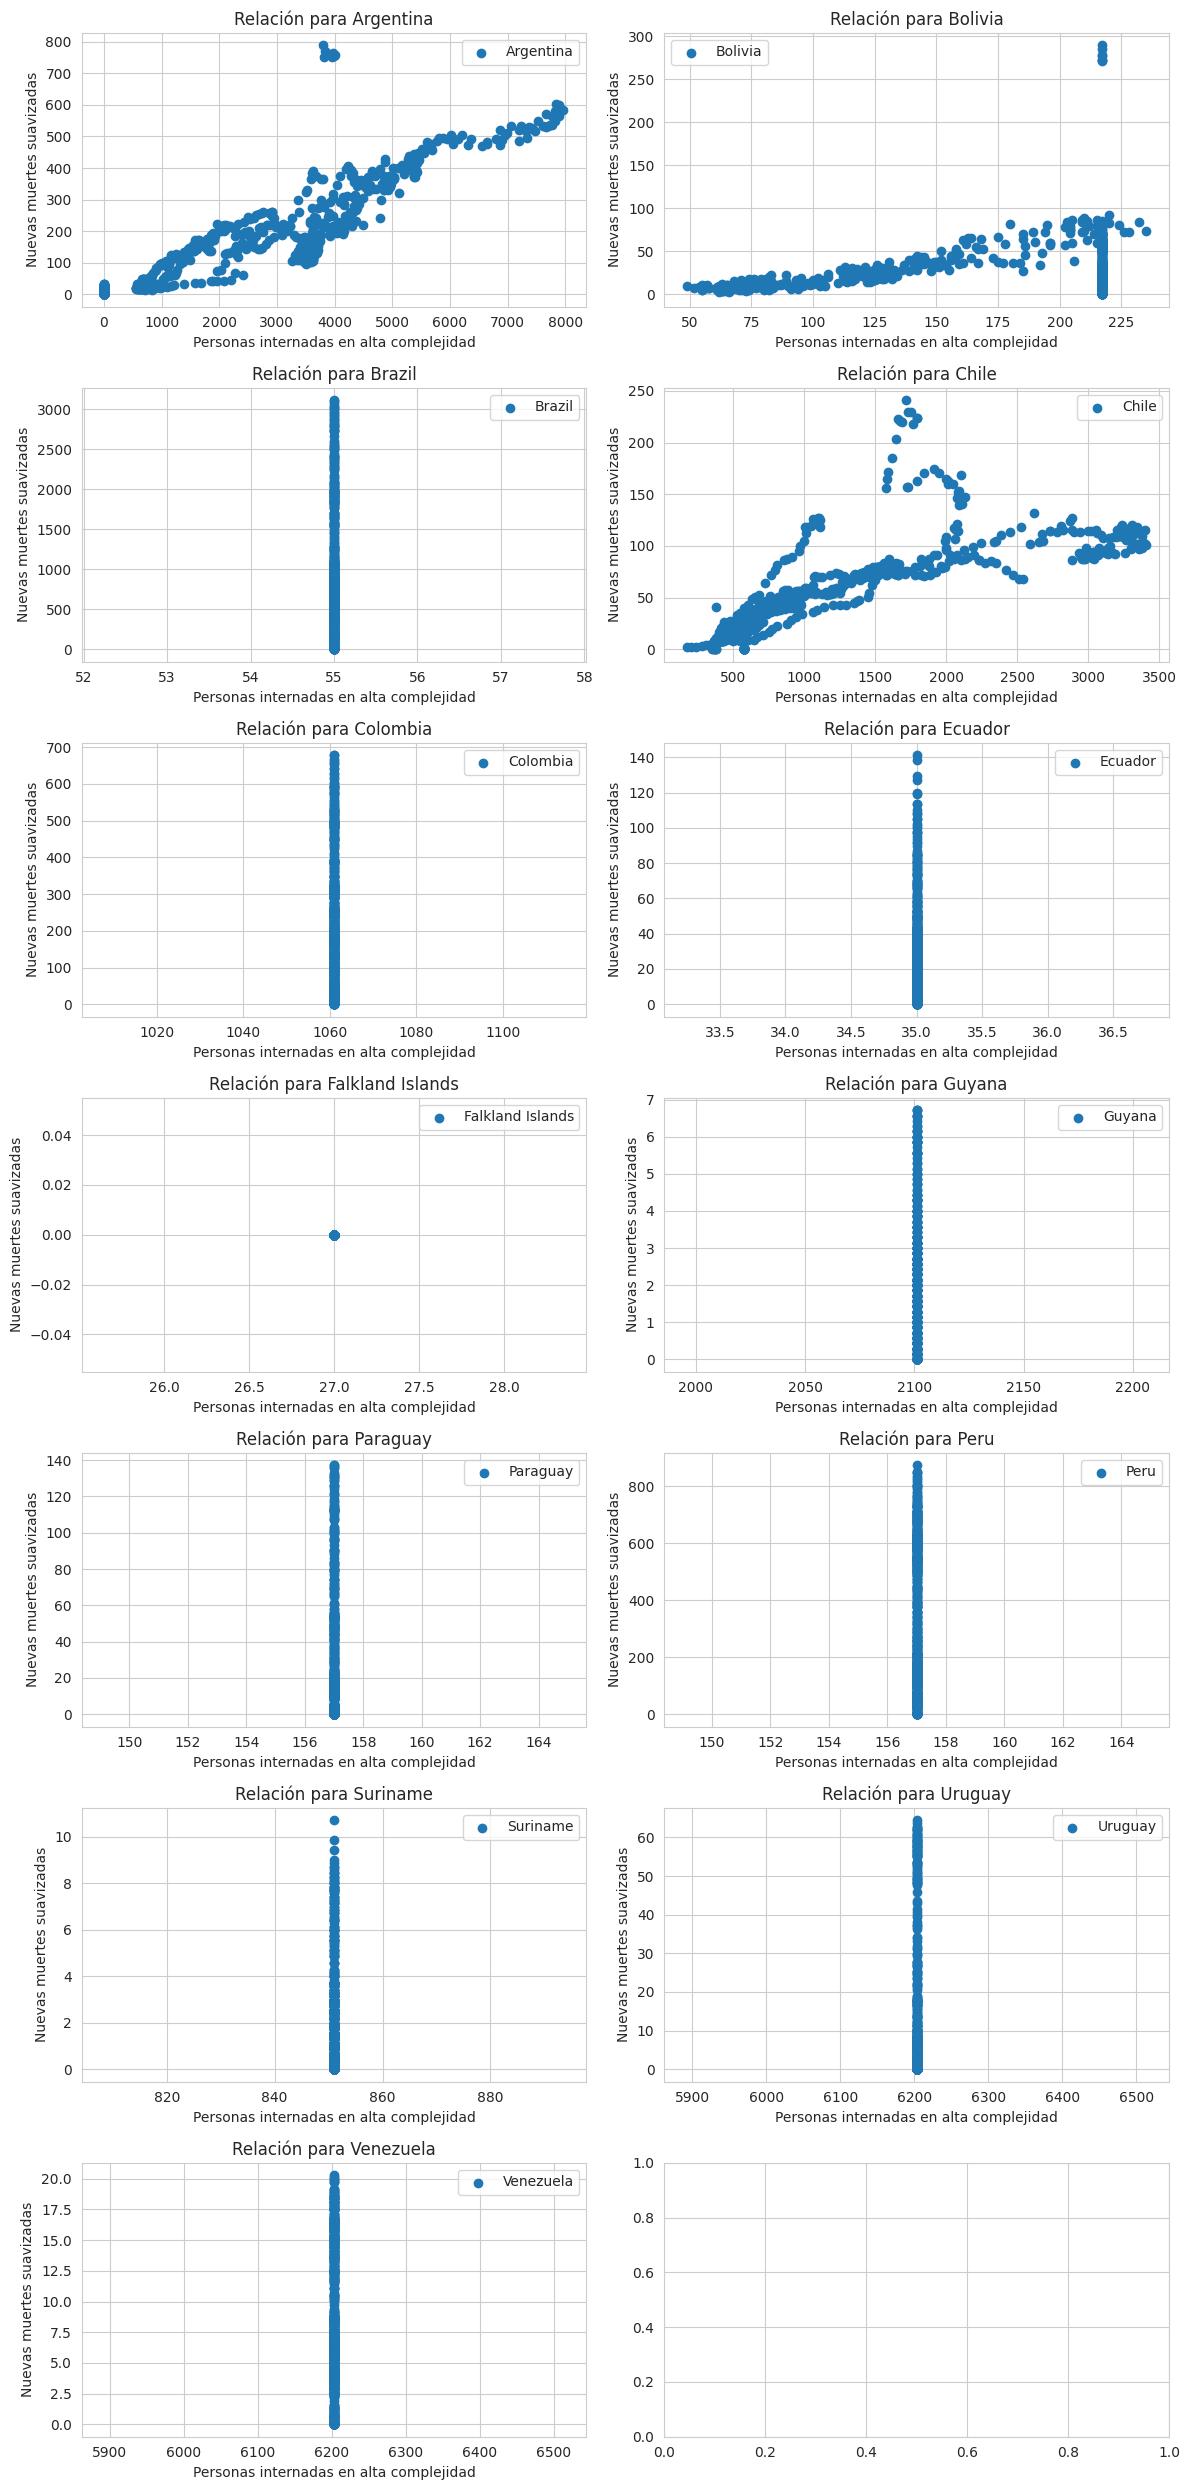

In [ ]:
num_paises = len(paises_sudamerica)
num_filas = (num_paises + 1) // 2

fig, axs = plt.subplots(num_filas, 2, figsize=(12, 25))

for i, cont in enumerate(paises_sudamerica):
    row = i // 2
    col = i % 2
    data_cont = covid_sudamerica[covid_sudamerica['ubicación'] == cont]


    axs[row, col].scatter(x=data_cont['Pacientes en la UCI'], y=data_cont['nuevas muertes suavizadas'], label=cont)
    axs[row, col].set_title(f'Relación para {cont}')
    axs[row, col].set_xlabel('Personas internadas en alta complejidad')
    axs[row, col].set_ylabel('Nuevas muertes suavizadas')
    axs[row, col].legend()


plt.tight_layout()
plt.show()


Se obseva que en sudamerica las mejores estadisticas respecto a estas dos variables son "Chile, Bolivia y Argentina" en las cuales podriamos aumentar la cantidad de valores para utilizar en Machine Learning

In [ ]:
paises_sudamerica_=['Argentina', 'Chile', 'Bolivia']

In [ ]:
covid_sudamerica_ = covid[covid['ubicación'].isin(paises_sudamerica_)]
covid_sudamerica_

Código ISO     Continente  ubicación       fecha  casos totales  \
5854         ARG  South America  Argentina  2020-01-01            0.0   
5855         ARG  South America  Argentina  2020-01-02            0.0   
5856         ARG  South America  Argentina  2020-01-03            0.0   
5857         ARG  South America  Argentina  2020-01-04            0.0   
5858         ARG  South America  Argentina  2020-01-05            0.0   
...          ...            ...        ...         ...            ...   
31528        CHL  South America      Chile  2022-03-01      3061019.0   
31529        CHL  South America      Chile  2022-03-02      3098110.0   
31530        CHL  South America      Chile  2022-03-03      3122802.0   
31531        CHL  South America      Chile  2022-03-04      3147434.0   
31532        CHL  South America      Chile  2022-03-05      3168335.0   

       casos nuevos  nuevos casos suavizados  muertes totales  nuevas muertes  \
5854            0.0                    0.000              0.0             0.0   
5855            0.0                    0.000              0.0             0.0   
5856            0.0                    0.000              0.0             0.0   
5857            0.0                    0.000              0.0             0.0   
5858            0.0                    0.000              0.0             0.0   
...             ...                      ...              ...             ...   
31528           0.0                23584.000          42353.0             0.0   
31529       37091.0                25282.714          42411.0            58.0   
31530       24692.0                24129.571          42683.0           272.0   
31531       24632.0                23080.143          42809.0           126.0   
31532       20901.0                21815.000          42955.0           146.0   

       nuevas muertes suavizadas  ...  mujeres fumadoras  \
5854                       0.000  ...               16.2   
5855                       0.000  ...               16.2   
5856                       0.000  ...               16.2   
5857                       0.000  ...               16.2   
5858                       0.000  ...               16.2   
...                          ...  ...                ...   
31528                    118.143  ...               34.2   
31529                    120.000  ...               34.2   
31530                    126.857  ...               34.2   
31531                    127.143  ...               34.2   
31532                    126.429  ...               34.2   

       fumadores masculinos  instalaciones para  lavarse las manos  \
5854                   27.7                                    0.0   
5855                   27.7                                    0.0   
5856                   27.7                                    0.0   
5857                   27.7                                    0.0   
5858                   27.7                                    0.0   
...                     ...                                    ...   
31528                  41.5                                    0.0   
31529                  41.5                                    0.0   
31530                  41.5                                    0.0   
31531                  41.5                                    0.0   
31532                  41.5                                    0.0   

       camas de hospital por mil  esperanza de vida  \
5854                        5.00              76.67   
5855                        5.00              76.67   
5856                        5.00              76.67   
5857                        5.00              76.67   
5858                        5.00              76.67   
...                          ...                ...   
31528                       2.11              80.18   
31529                       2.11              80.18   
31530                       2.11              80.18   
31531                       2.11            

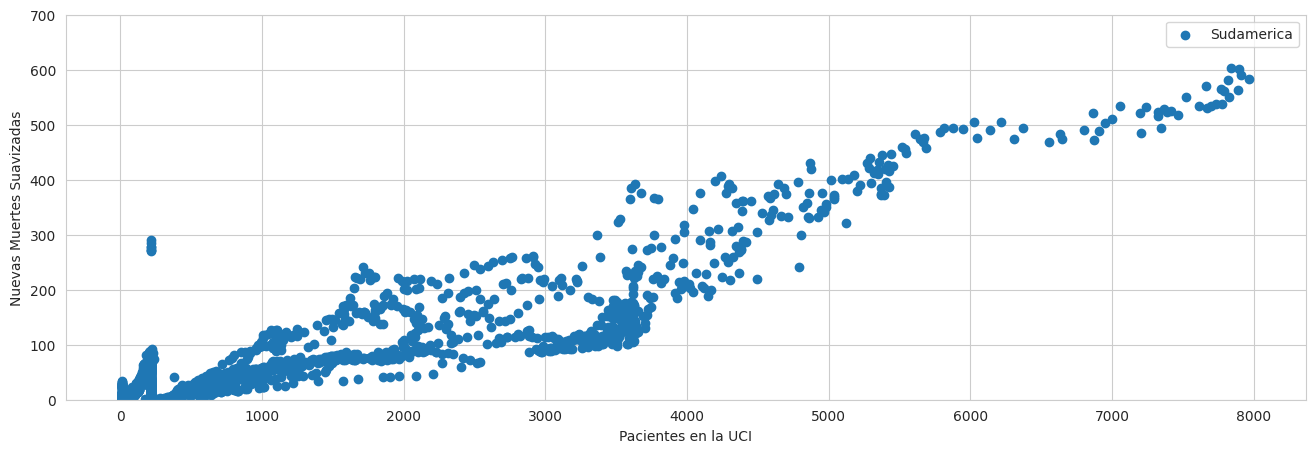

In [ ]:
x_sud_ = covid_sudamerica_['Pacientes en la UCI']
y_sud_ = covid_sudamerica_['nuevas muertes suavizadas']

plt.figure(figsize=(16,5))
plt.scatter(x_sud_, y_sud_, label='Sudamerica')

plt.xlabel('Pacientes en la UCI')
plt.ylabel('Nuevas Muertes Suavizadas')
plt.ylim(0,700)
plt.legend()

plt.show()

In [ ]:
covid_sudamerica_.shape

(2262, 67)

Conviene seguir usando argentina para estimar

# Reduccion de dimensionalidad
Reduciremos la dimensionalidad de los dataset en uso

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
covid.dtypes

Código ISO                                    object
Continente                                    object
ubicación                                     object
fecha                                         object
casos totales                                float64
                                              ...   
índice de desarrollo humano                  float64
exceso de mortalidad acumulada absoluta      float64
exceso de mortalidad acumulativo             float64
exceso de  mortalidad\t                      float64
exceso de mortalidad acumulada por millón    float64
Length: 67, dtype: object

In [ ]:
columnas_numericas = covid.select_dtypes(include=['number']).columns
columnas_numericas
len(columnas_numericas)

62

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
covid_arg[columnas_numericas] = scaler.fit_transform(covid_arg[columnas_numericas])
covid_arg.head()

Código ISO     Continente  ubicación       fecha  casos totales  \
5854        ARG  South America  Argentina  2020-01-01       -1.04327   
5855        ARG  South America  Argentina  2020-01-02       -1.04327   
5856        ARG  South America  Argentina  2020-01-03       -1.04327   
5857        ARG  South America  Argentina  2020-01-04       -1.04327   
5858        ARG  South America  Argentina  2020-01-05       -1.04327   

      casos nuevos  nuevos casos suavizados  muertes totales  nuevas muertes  \
5854     -0.588896                -0.612592        -1.167315       -0.926545   
5855     -0.588896                -0.612592        -1.167315       -0.926545   
5856     -0.588896                -0.612592        -1.167315       -0.926545   
5857     -0.588896                -0.612592        -1.167315       -0.926545   
5858     -0.588896                -0.612592        -1.167315       -0.926545   

      nuevas muertes suavizadas  ...  exceso de mortalidad acumulada absoluta  \
5854                  -1.011134  ...                                -0.053278   
5855                  -1.011134  ...                                -0.053278   
5856                  -1.011134  ...                                -0.053278   
5857                  -1.011134  ...                                -0.053278   
5858                  -1.011134  ...                                -0.053278   

      exceso de mortalidad acumulativo  exceso de  mortalidad\t  \
5854                         -0.035754                -0.066068   
5855                         -0.035754                -0.066068   
5856                         -0.035754                -0.066068   
5857                         -0.035754                -0.066068   
5858                         -0.035754                -0.066068   

      exceso de mortalidad acumulada por millón  % de vacunados  % muertes  \
5854                                  -0.053278             0.0        NaN   
5855                                  -0.053278             0.0        NaN   
5856                                  -0.053278             0.0        NaN   
5857                                  -0.053278             0.0        NaN   
5858                                  -0.053278             0.0        NaN   

      Muertes vs casos  Muertes vs pacientes UCI  Muertes vs vacunados  \
5854               0.0                       0.0                   NaN   
5855               0.0                       0.0                   NaN   
5856               0.0                       0.0                   NaN   
5857               0.0                       0.0                   NaN   
5858               0.0                       0.0                   NaN   

          Fecha  
5854 2020-01-01  
5855 2020-01-02  
5856 2020-01-03  
5857 2020-01-04  
5858 2020-01-05  

[5 rows x 73 columns]

In [ ]:
covid_arg.fillna(0, inplace=True)

In [ ]:
covid_arg_num = covid_arg[columnas_numericas]

In [ ]:
pca = PCA().fit(covid_arg_num)

In [ ]:
pca.components_.shape

(62, 62)

In [ ]:
componentes = pd.DataFrame(data = pca.components_, columns = covid_arg_num.columns, index = range(1,pca.components_.shape[0]+1))
componentes.head()

casos totales  casos nuevos  nuevos casos suavizados  muertes totales  \
1       0.222390      0.147523                 0.152121         0.219252   
2      -0.068639      0.129365                 0.125590        -0.052842   
3      -0.033730      0.299367                 0.294166        -0.112895   
4       0.018455     -0.041292                -0.037430         0.025401   
5      -0.071198      0.136867                 0.063292         0.022163   

   nuevas muertes  nuevas muertes suavizadas  casos totales por millón  \
1        0.078815                   0.083347                  0.222390   
2        0.278572                   0.281465                 -0.068639   
3       -0.094007                  -0.121279                 -0.033730   
4        0.003655                   0.016657                  0.018455   
5       -0.229682                  -0.248319                 -0.071198   

   nuevos casos por millón  nuevos casos suavizados por millón  \
1                 0.147523                            0.152121   
2                 0.129365                            0.125590   
3                 0.299367                            0.294166   
4                -0.041292                           -0.037430   
5                 0.136867                            0.063292   

   muertes totales por millón  ...  mujeres fumadoras  fumadores masculinos  \
1                    0.219252  ...                0.0                   0.0   
2                   -0.052842  ...               -0.0                  -0.0   
3                   -0.112895  ...               -0.0                  -0.0   
4                    0.025401  ...                0.0                   0.0   
5                    0.022163  ...                0.0                   0.0   

   instalaciones para  lavarse las manos  camas de hospital por mil  \
1                                    0.0                        0.0   
2                                   -0.0                       -0.0   
3                                   -0.0                       -0.0   
4                                    0.0                        0.0   
5                                    0.0                        0.0   

   esperanza de vida  índice de desarrollo humano  \
1                0.0                          0.0   
2               -0.0                         -0.0   
3               -0.0                         -0.0   
4                0.0                          0.0   
5                0.0                          0.0   

   exceso de mortalidad acumulada absoluta  exceso de mortalidad acumulativo  \
1                                -0.006901                         -0.002731   
2                                 0.027598                          0.030490   
3                                 0.042423                          0.039260   
4                                 0.505536                          0.504874   
5                                 0.038602                          0.035062   

   exceso de  mortalidad\t  exceso de mortalidad acumulada por millón  
1                -0.008730                                  -0.006901  
2                 0.034006                                   0.027598  
3                 0.042570                                   0.042423  
4                 0.465892                                   0.505536  
5                 0.016772                                   0.038602  

[5 rows x 62 columns]

<Axes: >

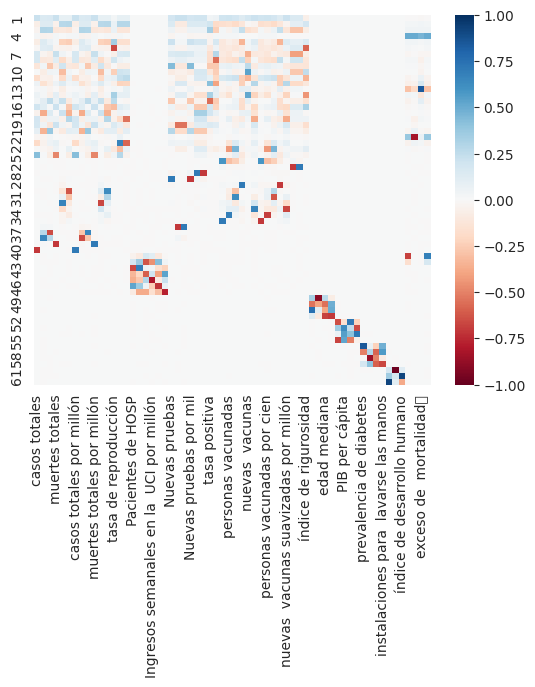

In [ ]:
sns.heatmap(componentes, vmin=-1, vmax=1, cmap='RdBu')

In [ ]:
var_explicada=pca.explained_variance_ratio_
var_explicada

array([4.35417183e-01, 1.99517308e-01, 1.01782158e-01, 9.13707529e-02,
       5.15713816e-02, 3.35712214e-02, 1.84048063e-02, 1.38182258e-02,
       1.13450752e-02, 8.72131158e-03, 6.89043770e-03, 6.41400312e-03,
       5.23737714e-03, 4.38268461e-03, 3.20493821e-03, 2.00185465e-03,
       1.87135754e-03, 1.30629902e-03, 1.06839581e-03, 7.16929958e-04,
       6.72849679e-04, 3.74342923e-04, 2.37199108e-04, 1.01864355e-04,
       2.20862143e-08, 1.76116885e-08, 1.35920981e-09, 1.13221256e-09,
       1.88523302e-10, 8.28151394e-11, 7.24212203e-11, 6.66139964e-11,
       5.34102688e-11, 4.70190460e-11, 1.18677753e-11, 1.61917260e-14,
       5.61349472e-15, 4.61932893e-15, 8.50364780e-16, 2.60808917e-19,
       8.58708982e-32, 3.69066509e-33, 3.69066509e-33, 3.69066509e-33,
       3.69066509e-33, 3.69066509e-33, 3.69066509e-33, 3.69066509e-33,
       3.69066509e-33, 3.69066509e-33, 3.69066509e-33, 3.69066509e-33,
       3.69066509e-33, 3.69066509e-33, 3.69066509e-33, 3.69066509e-33,
      

(0.0, 105.0)

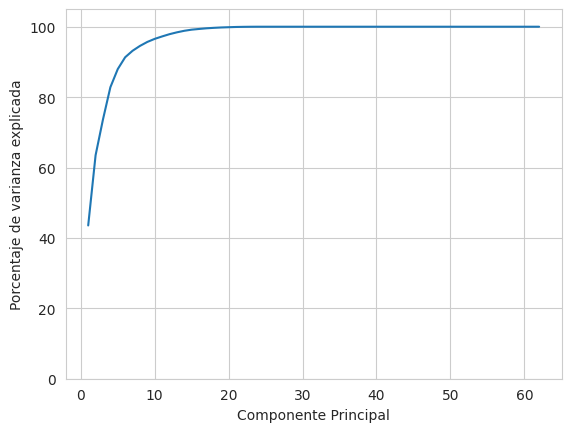

In [ ]:
plt.plot(componentes.index,var_explicada.cumsum()*100)
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')
plt.ylim(0,105)

Text(0.5, 0, 'Componente Principal')

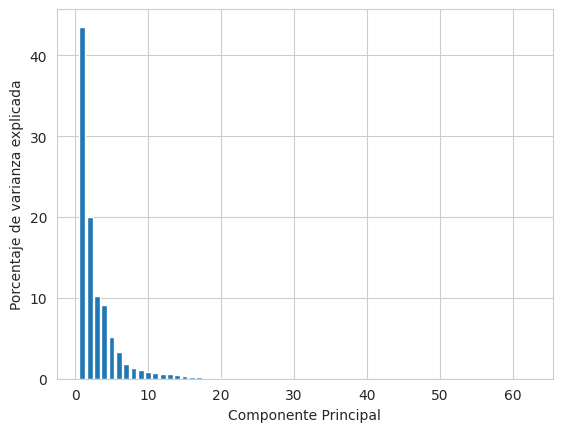

In [ ]:
plt.bar(x=componentes.index, height = var_explicada*100)
plt.ylabel('Porcentaje de varianza explicada')
plt.xlabel('Componente Principal')

In [ ]:
componentes.index

RangeIndex(start=1, stop=63, step=1)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
compo=componentes.iloc[:10].abs().sum().sort_values()[::-1]
print(compo)

pruebas por caso                                 2.072244e+00
nuevas  vacunas                                  1.808406e+00
Nuevas personas vacunadas suavizadas por cien    1.731316e+00
Nuevas personas vacunadas suavizadas             1.731145e+00
tasa de reproducción                             1.667788e+00
índice de rigurosidad                            1.616421e+00
nuevas muertes                                   1.472354e+00
nuevas muertes por millón                        1.472346e+00
tasa positiva                                    1.459087e+00
Nuevas pruebas                                   1.372010e+00
Nuevas pruebas por mil                           1.371957e+00
refuerzos totales por cien                       1.315150e+00
refuerzos  totales                               1.315141e+00
nuevos casos suavizados                          1.275277e+00
nuevos casos suavizados por millón               1.275277e+00
Pacientes en la UCI                              1.192415e+00
Paciente

In [ ]:
covid_arg_reducido=pca.transform(covid_arg_num)
covid_arg_reducido=pd.DataFrame(covid_arg_reducido[:,:17], columns=range(1,18))
covid_arg_reducido.head()

1         2         3         4         5         6         7   \
0 -4.623446 -2.289520  0.399634 -0.090020 -0.820769  3.057854 -0.301118   
1 -4.622635 -2.288870  0.399849 -0.090136 -0.819804  3.058059 -0.300464   
2 -4.623437 -2.289518  0.399635 -0.090021 -0.820764  3.057855 -0.301111   
3 -4.622716 -2.288939  0.399826 -0.090123 -0.819904  3.058037 -0.300529   
4 -4.623394 -2.289487  0.399645 -0.090026 -0.820716  3.057864 -0.301076   

         8         9         10        11        12        13        14  \
0  0.508324  0.804554  0.141087  0.483291  0.168611 -0.108995 -0.142611   
1  0.508541  0.806466  0.140730  0.483230  0.168474 -0.108765 -0.142733   
2  0.508327  0.804563  0.141084  0.483289  0.168613 -0.108994 -0.142610   
3  0.508520  0.806265  0.140766  0.483235  0.168491 -0.108789 -0.142718   
4  0.508339  0.804655  0.141066  0.483285  0.168608 -0.108983 -0.142614   

         15        16        17  
0  0.706024 -0.247022 -0.195336  
1  0.704816 -0.246777 -0.195531  
2  0.706017 -0.247022 -0.195337  
3  0.704942 -0.246804 -0.195511  
4  0.705957 -0.247011 -0.195346

In [ ]:
x_train=covid_arg_reducido
x_train.shape

(788, 17)

In [ ]:
y_train = y
y.shape

(788,)

probar con linear regresion

In [ ]:
linear_model2 = LinearRegression()

In [ ]:
linear_model2.fit(x_train,y)

LinearRegression()

In [ ]:
y_pred = linear_model2.predict(x_train)


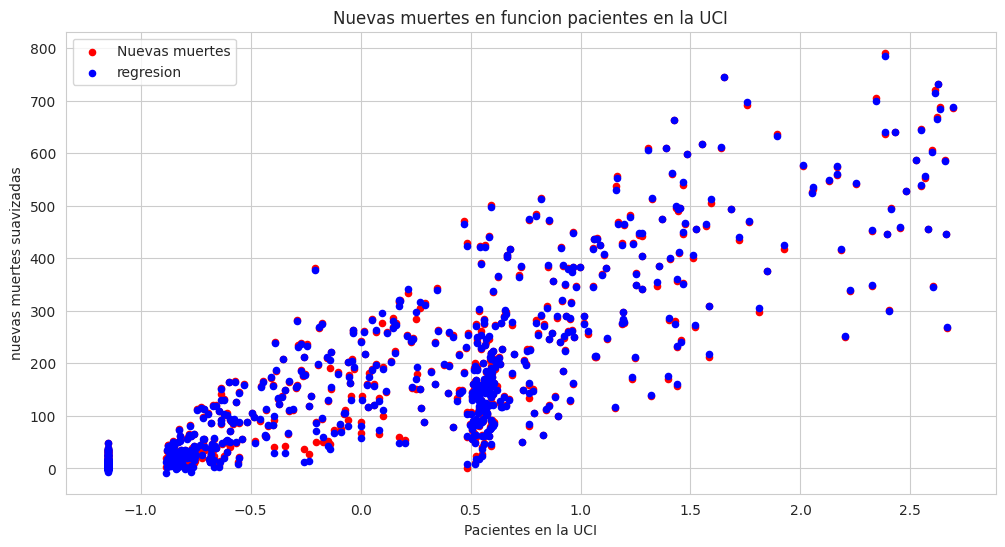

In [ ]:
plt.subplots(figsize=(12,6))
plt.scatter(covid_arg['Pacientes en la UCI'], y, color="red", label='Nuevas muertes', s=20)
plt.scatter(covid_arg['Pacientes en la UCI'], y_pred, color="blue",  label='regresion', s=20)
plt.title('Nuevas muertes en funcion pacientes en la UCI')
plt.ylabel('nuevas muertes suavizadas')
plt.xlabel('Pacientes en la UCI')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
print('El r2 da un valor de:', r2_score(y,y_pred))
print('El MSE da un valor de:', mean_squared_error(y,y_pred))

El r2 da un valor de: 0.9995323051734686
El MSE da un valor de: 12.934517853251322


Me quedo con el r2 que es un muy buen valor para una regresion lineal pero creo que tengo overfiting

# Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(linear_model2, x_train, y, cv=kfold, scoring='neg_mean_squared_error')


In [ ]:
scores

array([-698.63918071, -859.55956165, -847.46277875, -895.64444943,
       -776.72710955])

In [ ]:
from sklearn.model_selection import StratifiedKFold

strat_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores_strat = cross_val_score(linear_model2, x_train, y, cv=strat_kfold, scoring='neg_mean_squared_error')


In [ ]:
scores_strat

array([ -799.7047907 ,  -777.97839357, -1085.64752948,  -824.02758376,
        -705.0379762 ])

In [ ]:
from sklearn.model_selection import ShuffleSplit

RCV = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
scores_RCV = cross_val_score(linear_model2, x_train, y, cv=RCV, scoring='neg_mean_squared_error')


In [ ]:
scores_RCV

array([ -698.63918071,  -809.27193571,  -841.31648356,  -759.91720369,
       -1107.55983017])

In [ ]:
from sklearn.metrics import r2_score
scores = cross_val_score(linear_model2, x_train, y, cv=kfold, scoring='r2')
scores

array([0.97382746, 0.97506011, 0.9671178 , 0.96055278, 0.97277352])

In [ ]:
from sklearn.metrics import explained_variance_score
scores2 = cross_val_score(linear_model2, x_train, y, cv=kfold, scoring='explained_variance')
scores2

array([0.97393311, 0.97510214, 0.96731975, 0.96074648, 0.97300605])